In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
%config IPCpmpleter.greedy=True

In [ ]:
train = pd.read_csv('Data Mining VU data/training_set_VU_DM_2014.csv')

In [4]:
test = pd.read_csv('Data Mining VU data/test_set_VU_DM_2014.csv')

In [5]:
# smaller samples for faster exploration
train_sample = train.sample(frac=0.5, random_state=0)
test_sample = train.drop(train_sample.index)

In [38]:
train_sample.booking_bool.sum()/train_sample.shape[0]

0.027797161473942532

In [39]:
train.booking_bool.sum()/train.shape[0]

0.027910511305481445

In [4]:
train.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [63]:
len(train.position.unique())

40

In [34]:
# number of different users
len(test.srch_id.unique())

199549

In [35]:
# numbers of different hotels
len(test.prop_id.unique())

129438

In [14]:
# check if test set contains other hotels than the training set
test_ids = set(test.prop_id.unique())
train_ids = set(train.prop_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)
print(intersection_count, ' of ',len(test_ids),' hotels in the test set overlap with the training set')

121665  of  129438  hotels in the test set overlap with the training set


In [13]:
# check if test set contains other users than the training set
test_ids = set(test.srch_id.unique())
train_ids = set(train.srch_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)
print(intersection_count, ' of ',len(test_ids),' users in the test set overlap with the training set')

119914  of  199549  users in the test set overlap with the training set


In [3]:
numerical_features = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','gross_bookings_usd']

In [5]:
train.isna().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [6]:
train.isna().sum()/train.shape[0]

srch_id                        0.000000
date_time                      0.000000
site_id                        0.000000
visitor_location_country_id    0.000000
visitor_hist_starrating        0.949204
visitor_hist_adr_usd           0.948977
prop_country_id                0.000000
prop_id                        0.000000
prop_starrating                0.000000
prop_review_score              0.001485
prop_brand_bool                0.000000
prop_location_score1           0.000000
prop_location_score2           0.219902
prop_log_historical_price      0.000000
position                       0.000000
price_usd                      0.000000
promotion_flag                 0.000000
srch_destination_id            0.000000
srch_length_of_stay            0.000000
srch_booking_window            0.000000
srch_adults_count              0.000000
srch_children_count            0.000000
srch_room_count                0.000000
srch_saturday_night_bool       0.000000
srch_query_affinity_score      0.935986


In [6]:
# for booked hotels the ratio of missing values for hotel properties (prop_review_score, prop_location_score2) is significantly lower
# --> replace missing hotel properties by 'bad' values
train[train.booking_bool==1].isna().sum()/train[train.booking_bool==1].shape[0]

srch_id                        0.000000
date_time                      0.000000
site_id                        0.000000
visitor_location_country_id    0.000000
visitor_hist_starrating        0.934331
visitor_hist_adr_usd           0.933998
prop_country_id                0.000000
prop_id                        0.000000
prop_starrating                0.000000
prop_review_score              0.000838
prop_brand_bool                0.000000
prop_location_score1           0.000000
prop_location_score2           0.104588
prop_log_historical_price      0.000000
position                       0.000000
price_usd                      0.000000
promotion_flag                 0.000000
srch_destination_id            0.000000
srch_length_of_stay            0.000000
srch_booking_window            0.000000
srch_adults_count              0.000000
srch_children_count            0.000000
srch_room_count                0.000000
srch_saturday_night_bool       0.000000
srch_query_affinity_score      0.921345


# Distributions

In [ ]:
# average numerical features over srch_id
groups = train.groupby(['prop_country_id','site_id'])

/home/fiona/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


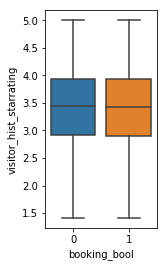

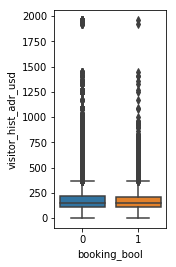

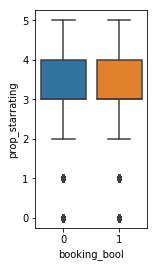

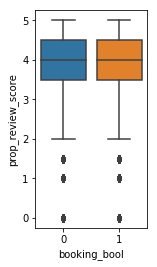

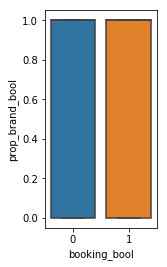

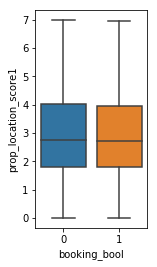

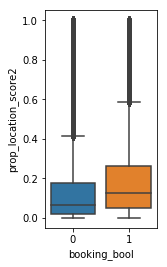

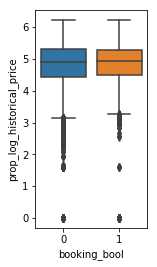

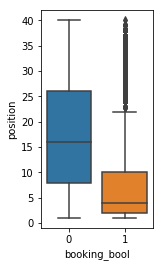

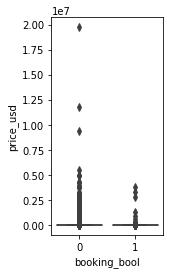

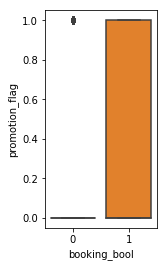

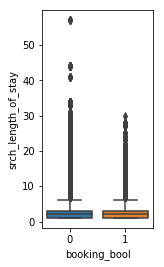

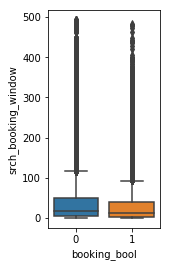

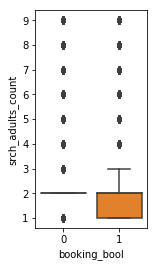

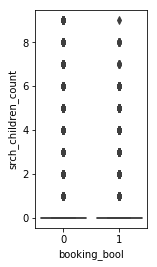

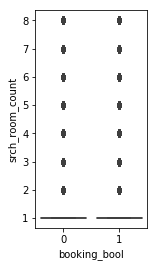

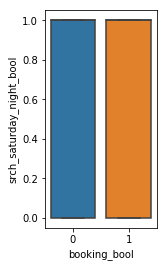

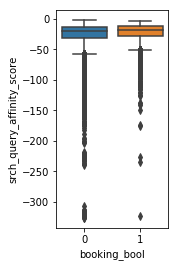

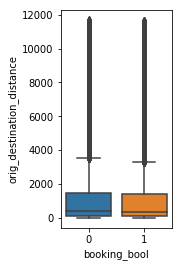

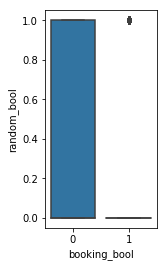

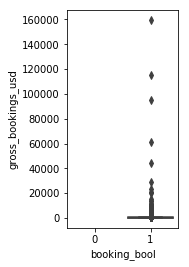

In [4]:
for feature in numerical_features:
    plt.figure(figsize=(2,4))
    sns.boxplot(x='booking_bool', y=feature, data=train)
    plt.show()

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


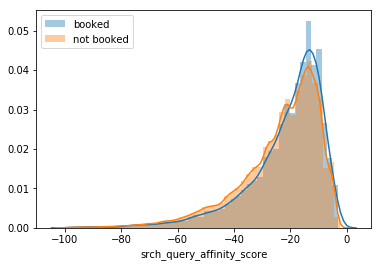

In [58]:
#sns.boxplot(x=train_sample.booking_bool[train_sample.srch_query_affinity_score <0], y=train_sample.srch_query_affinity_score[train_sample.srch_query_affinity_score <0])
sns.distplot(train.srch_query_affinity_score[train.booking_bool==1][train.srch_query_affinity_score>-100].dropna(), label='booked')
sns.distplot(train.srch_query_affinity_score[train.booking_bool==0][train.srch_query_affinity_score>-100].dropna(), label='not booked')
plt.legend()
plt.show()

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


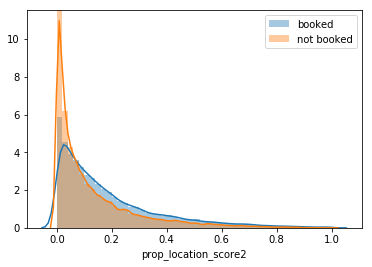

In [59]:
sns.distplot(train.prop_location_score2[train.booking_bool==1].dropna(), label='booked')
sns.distplot(train.prop_location_score2[train.booking_bool==0].dropna(), label='not booked')
plt.legend()
plt.show()

c:\users\fiona\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


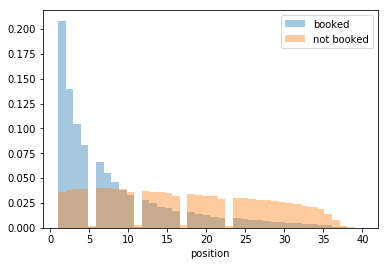

In [67]:
sns.distplot(train.position[train.booking_bool==1].dropna(), label='booked', bins=40, kde=False, norm_hist=True)
sns.distplot(train.position[train.booking_bool==0].dropna(), label='not booked', bins=40, kde=False, norm_hist=True)
plt.legend()
plt.show()

In [5]:
hotels = train.prop_id.unique()
for h in hotels:
    all_hotel_pos = train.position[train.prop_id==h]
    print('mean=',all_hotel_pos.mean(),' std=',all_hotel_pos.std())

mean= 25.24019607843137  std= 8.640453250112653
mean= 22.72384219554031  std= 7.320655073861229
mean= 23.58802177858439  std= 7.728516374586529
mean= 24.06304347826087  std= 9.375856880419743
mean= 12.846616541353383  std= 8.632939412647167
mean= 11.304821150855366  std= 9.143904482296323
mean= 24.89099526066351  std= 7.744273734276572
mean= 26.923076923076923  std= 10.706764314727058
mean= 7.988650693568727  std= 9.414480696681283
mean= 14.091851851851851  std= 8.147226975874503
mean= 24.4375  std= 7.407275064461762
mean= 14.375354107648725  std= 8.16978789636506
mean= 18.910958904109588  std= 9.416908432737106
mean= 14.611821086261982  std= 10.913527204269876
mean= 19.92733564013841  std= 6.407175907854166
mean= 27.521052631578947  std= 9.10206212449349
mean= 13.55378486055777  std= 8.471170737336148
mean= 30.230215827338128  std= 8.690588401522374
mean= 9.542817679558011  std= 8.299183636628753
mean= 12.672985781990521  std= 8.735504091668496
mean= 19.485342019543975  std= 7.7023934

mean= 19.81111111111111  std= 9.354316968254379
mean= 18.14516129032258  std= 9.569156007447598
mean= 18.66216216216216  std= 9.103003955153383
mean= 19.608695652173914  std= 8.754626106286297
mean= 16.733333333333334  std= 8.189424074174365
mean= 13.530303030303031  std= 10.306412786326023
mean= 17.75609756097561  std= 10.145887067686289
mean= 12.870967741935484  std= 7.843221852801186
mean= 14.26923076923077  std= 9.501821687687862
mean= 15.092307692307692  std= 9.05318154870685
mean= 17.88888888888889  std= 9.955456348712053
mean= 20.317073170731707  std= 8.527716647468546
mean= 15.159090909090908  std= 11.645826045009136
mean= 11.913793103448276  std= 9.721173279052026
mean= 15.446808510638299  std= 10.051624378002181
mean= 11.431372549019608  std= 6.664097544186412
mean= 15.583333333333334  std= 6.859300255857007
mean= 14.933333333333334  std= 7.4645522457736915
mean= 12.5  std= 9.484437013051721
mean= 10.081632653061224  std= 8.969477722378539
mean= 16.257575757575758  std= 8.828

mean= 16.63809523809524  std= 7.941037291190192
mean= 11.697247706422019  std= 9.082446019001345
mean= 16.486238532110093  std= 7.3378959024988175
mean= 18.03030303030303  std= 6.859307017795492
mean= 16.194690265486727  std= 6.976821839746598
mean= 6.93  std= 7.949658527702351
mean= 7.8061224489795915  std= 7.615310356111773
mean= 22.768421052631577  std= 9.358637643601387
mean= 13.173913043478262  std= 9.271963624978024
mean= 12.52127659574468  std= 7.957857715996718
mean= 23.102941176470587  std= 8.13795807655541
mean= 21.128712871287128  std= 8.080424947162907
mean= 13.828282828282829  std= 7.6865113819804085
mean= 15.925531914893616  std= 7.82914236325613
mean= 18.007194244604317  std= 8.855111029572333
mean= 19.523489932885905  std= 7.9937339418239475
mean= 12.435643564356436  std= 7.732290529441012
mean= 16.223300970873787  std= 7.3176285117502
mean= 13.89795918367347  std= 6.691261875225998
mean= 23.681818181818183  std= 12.184680281666548
mean= 18.20754716981132  std= 7.355874

mean= 13.6  std= 10.454229244229776
mean= 18.435897435897434  std= 8.071375255526135
mean= 18.517241379310345  std= 11.679104324926305
mean= 17.24074074074074  std= 10.505946537485213
mean= 15.10204081632653  std= 10.120616124935246
mean= 15.796610169491526  std= 9.23408166376052
mean= 16.307692307692307  std= 8.64551555844156
mean= 15.666666666666666  std= 9.073771725877467
mean= 15.088888888888889  std= 10.714947550506302
mean= 20.024390243902438  std= 10.006217579280516
mean= 10.56  std= 10.384761206023105
mean= 10.90625  std= 9.624239817434521
mean= 12.043478260869565  std= 10.090604038167013
mean= 15.153846153846153  std= 9.155206920937516
mean= 10.25  std= 9.464847243000456
mean= 11.790697674418604  std= 10.119660589863777
mean= 15.878048780487806  std= 8.570866706323287
mean= 19.36842105263158  std= 7.312170420423059
mean= 21.235294117647058  std= 7.033031310307434
mean= 16.302325581395348  std= 7.992659977161576
mean= 13.847826086956522  std= 6.636489672189819
mean= 22.22916666

mean= 22.366737739872068  std= 9.573481123950959
mean= 21.753676470588236  std= 10.754986198554828
mean= 14.691489361702128  std= 10.259039125544628
mean= 17.444444444444443  std= 9.494887513229889
mean= 16.697674418604652  std= 9.685732098956157
mean= 20.338461538461537  std= 10.201527035015584
mean= 17.818181818181817  std= 10.841115282306674
mean= 18.27433628318584  std= 9.397233433693795
mean= 18.363636363636363  std= 11.166487081856015
mean= 16.109756097560975  std= 11.355105554859426
mean= 20.434931506849313  std= 10.042480851103331
mean= 17.766519823788546  std= 11.162243872862668
mean= 17.920265780730897  std= 10.979387714977179
mean= 13.465116279069768  std= 12.778979833358973
mean= 20.263157894736842  std= 9.956020403732603
mean= 23.710526315789473  std= 8.689941755805862
mean= 13.578947368421053  std= 7.139438931925401
mean= 20.28205128205128  std= 10.718770348634896
mean= 22.833333333333332  std= 11.555214775405394
mean= 25.094594594594593  std= 9.530296203361468
mean= 20.5

mean= 20.624697336561745  std= 10.019014457370917
mean= 19.033222591362126  std= 10.378771246168206
mean= 19.594381035996488  std= 9.511282914000073
mean= 15.426791277258568  std= 10.289727996637591
mean= 15.81808943089431  std= 9.966497184687334
mean= 17.75897435897436  std= 9.84024927507298
mean= 19.026252983293556  std= 11.069669671854726
mean= 21.487373737373737  std= 9.645543158813725
mean= 19.069858712715856  std= 9.707456280751863
mean= 21.896457765667574  std= 10.48601272305777
mean= 21.928571428571427  std= 10.454287938643306
mean= 12.305084745762711  std= 9.720667760274816
mean= 10.378317334839075  std= 9.502260432403988
mean= 21.98876404494382  std= 9.434943438232342
mean= 20.05952380952381  std= 10.104653013406407
mean= 17.24472891566265  std= 9.97598711112356
mean= 18.107526881720432  std= 10.26298862236671
mean= 20.68603351955307  std= 9.233291058968941
mean= 20.0481444332999  std= 10.013228653108815
mean= 22.06830601092896  std= 9.326761922604693
mean= 18.727513227513228

mean= 18.09433962264151  std= 12.107870955851732
mean= 24.560747663551403  std= 9.813523178327683
mean= 16.706766917293233  std= 8.967772226724561
mean= 19.34351145038168  std= 9.591479385665023
mean= 22.536585365853657  std= 10.405595742879292
mean= 22.385826771653544  std= 9.34017372131573
mean= 18.074380165289256  std= 10.791327759869803
mean= 18.92  std= 10.63836289570304
mean= 19.357723577235774  std= 11.22579734018765
mean= 17.828358208955223  std= 10.458314043028219
mean= 19.882882882882882  std= 10.205826088998682
mean= 19.557377049180328  std= 10.485763020454058
mean= 15.977777777777778  std= 9.433559232919198
mean= 16.644444444444446  std= 9.500562957920597
mean= 24.748148148148147  std= 9.532128326121587
mean= 17.857142857142858  std= 8.051619180548185
mean= 18.82  std= 10.734048536307165
mean= 18.448  std= 9.481268460121948
mean= 16.96078431372549  std= 11.03804472597158
mean= 22.714285714285715  std= 14.314494818356739
mean= 18.407692307692308  std= 10.843278312196654
mean

mean= 25.83991790661878  std= 10.027530235386676
mean= 18.648036253776436  std= 9.12904897481546
mean= 13.410279131590608  std= 11.285622905428852
mean= 25.106382978723403  std= 11.275497932746443
mean= 14.407692307692308  std= 10.626473936445162
mean= 15.0  std= 11.192401050259111
mean= 18.527027027027028  std= 9.604826088536969
mean= 15.170731707317072  std= 10.351602581301334
mean= 16.166666666666668  std= 9.571334377560335
mean= 22.384615384615383  std= 12.359466422803626
mean= 15.92  std= 9.544396796240276
mean= 14.951219512195122  std= 8.463861129644746
mean= 15.298507462686567  std= 9.053736756374759
mean= 17.034682080924856  std= 10.429105044078943
mean= 21.5625  std= 9.106545265174201
mean= 12.2425068119891  std= 10.394331275290035
mean= 16.208333333333332  std= 11.615843357303353
mean= 19.4  std= 11.199137897855012
mean= 15.80952380952381  std= 10.479336450875065
mean= 15.533333333333333  std= 10.024061960194489
mean= 15.11038961038961  std= 10.08238072849866
mean= 15.4222222

mean= 14.201646090534979  std= 8.507925168195767
mean= 19.91304347826087  std= 9.896350460410028
mean= 12.59375  std= 12.553781937921412
mean= 14.265151515151516  std= 11.158031953534843
mean= 9.224199288256228  std= 7.460581039426931
mean= 14.182266009852217  std= 7.74796560894557
mean= 12.891891891891891  std= 9.378739535557205
mean= 24.225806451612904  std= 8.444760416650295
mean= 25.377777777777776  std= 7.299716335985843
mean= 17.011111111111113  std= 10.241460618754198
mean= 19.375  std= 10.64051006979715
mean= 20.6  std= 9.0657727356314
mean= 24.21951219512195  std= 9.371531878839102
mean= 20.315068493150687  std= 8.168157537945016
mean= 22.53846153846154  std= 10.451734843496615
mean= 19.23913043478261  std= 10.191970083384371
mean= 20.26  std= 10.46434178434515
mean= 17.24778761061947  std= 10.296090601231795
mean= 12.871794871794872  std= 9.042983897782733
mean= 24.289473684210527  std= 11.037792314360894
mean= 16.1123595505618  std= 11.698327582731247
mean= 21.45205479452055

mean= 21.875739644970412  std= 10.20106194871735
mean= 19.59189189189189  std= 8.998550873349513
mean= 15.084931506849315  std= 11.44251057894253
mean= 21.410994764397905  std= 9.486068500478638
mean= 18.425925925925927  std= 12.097117679182693
mean= 19.92462311557789  std= 9.88414436519359
mean= 15.313253012048193  std= 9.692143285929633
mean= 17.28448275862069  std= 11.832017016834309
mean= 22.00507614213198  std= 9.522528316045435
mean= 21.183406113537117  std= 10.051249582617462
mean= 21.571428571428573  std= 12.89795111082155
mean= 26.789473684210527  std= 7.7465175950642555
mean= 14.304347826086957  std= 8.760130890077447
mean= 19.977272727272727  std= 9.109774052142388
mean= 25.253424657534246  std= 9.000238804368676
mean= 20.882653061224488  std= 7.76656245789278
mean= 19.433333333333334  std= 8.391615401074338
mean= 16.021834061135372  std= 10.870628952109845
mean= 17.548387096774192  std= 10.685720917361383
mean= 21.34254143646409  std= 9.761250611741199
mean= 17.722222222222

mean= 24.359375  std= 6.766789085216823
mean= 14.981818181818182  std= 8.505779813859997
mean= 17.90909090909091  std= 11.179276531879143
mean= 25.17142857142857  std= 7.97601446354563
mean= 24.833333333333332  std= 6.346779434910458
mean= 11.068376068376068  std= 8.349815706954974
mean= 19.266666666666666  std= 9.978157964455983
mean= 13.142857142857142  std= 8.496010511821252
mean= 16.06711409395973  std= 9.79427882471977
mean= 14.048913043478262  std= 10.780569255080858
mean= 17.310924369747898  std= 9.829987615755245
mean= 11.889980353634577  std= 9.173292166547494
mean= 14.6  std= 9.844943710690613
mean= 16.7752688172043  std= 10.368974961239896
mean= 16.51453488372093  std= 10.433731924971116
mean= 17.977198697068403  std= 10.442859419607343
mean= 17.80827067669173  std= 9.536015427330266
mean= 13.813775510204081  std= 9.11273603741395
mean= 15.030878859857483  std= 10.386414956775882
mean= 15.296903460837887  std= 10.154158899125637
mean= 16.245098039215687  std= 10.392086782512

mean= 12.753623188405797  std= 8.515394013718106
mean= 12.244897959183673  std= 7.428914827227735
mean= 19.814814814814813  std= 8.004859635107774
mean= 18.53846153846154  std= 8.471023654685528
mean= 23.103448275862068  std= 9.51819621111587
mean= 10.27027027027027  std= 8.490602859176414
mean= 17.15068493150685  std= 8.710898717629401
mean= 16.85135135135135  std= 9.048851334705464
mean= 20.73913043478261  std= 8.350153527847194
mean= 22.942857142857143  std= 9.287494653339932
mean= 18.420289855072465  std= 7.910168060052701
mean= 22.9  std= 9.491738694690023
mean= 24.865384615384617  std= 9.118025341250169
mean= 13.044444444444444  std= 8.767075690423585
mean= 22.807692307692307  std= 9.38926893004583
mean= 16.035714285714285  std= 8.121677179723422
mean= 23.696969696969695  std= 8.57360833644504
mean= 22.294117647058822  std= 9.06865821918548
mean= 18.796875  std= 8.41800731896939
mean= 16.76829268292683  std= 8.251148487942103
mean= 22.207792207792206  std= 9.437240986111274
mean=

mean= 11.552238805970148  std= 4.349446436702492
mean= 10.367647058823529  std= 4.868124809118537
mean= 10.835820895522389  std= 4.180028327167221
mean= 10.901960784313726  std= 5.979353592537032
mean= 16.78494623655914  std= 6.165911657911183
mean= 21.90625  std= 8.970774681547674
mean= 6.25  std= 3.9382367549277784
mean= 6.616161616161616  std= 6.467670101747789
mean= 7.7023809523809526  std= 8.272147725814929
mean= 9.913669064748202  std= 7.392203113767606
mean= 6.426229508196721  std= 4.404952195849248
mean= 10.303921568627452  std= 5.654734659822291
mean= 11.669421487603305  std= 7.155869886268272
mean= 20.842767295597483  std= 8.308554834196359
mean= 22.5  std= 7.779009385068706
mean= 5.920454545454546  std= 4.28099674425792
mean= 13.191489361702128  std= 7.350330307074662
mean= 12.590909090909092  std= 6.512412746281672
mean= 15.70873786407767  std= 6.381085819398815
mean= 16.25  std= 6.188285044733459
mean= 9.694029850746269  std= 7.509620508358153
mean= 21.50877192982456  std=

mean= 20.09433962264151  std= 9.519744968593104
mean= 14.116666666666667  std= 9.810218931309636
mean= 14.492957746478874  std= 9.829799067030269
mean= 19.764705882352942  std= 10.700632196826724
mean= 14.064705882352941  std= 10.831765752695492
mean= 20.627450980392158  std= 9.674628229164624
mean= 17.72972972972973  std= 10.600125167310694
mean= 18.303370786516854  std= 9.387376066706459
mean= 16.97029702970297  std= 9.460925372863434
mean= 14.069337442218798  std= 9.24827977123348
mean= 19.76829268292683  std= 11.36737673516652
mean= 20.537974683544302  std= 10.104949960606504
mean= 20.37062937062937  std= 10.046145867157302
mean= 15.366822429906541  std= 10.573541830924174
mean= 16.09795918367347  std= 11.459834540144644
mean= 22.45679012345679  std= 9.333202150462062
mean= 16.887871853546912  std= 10.392691693882355
mean= 21.75  std= 9.876050001714432
mean= 20.975609756097562  std= 10.9634359867677
mean= 19.720812182741117  std= 9.61122979188948
mean= 12.189627228525122  std= 11.2

mean= 12.154103852596315  std= 9.165501268302986
mean= 11.242424242424242  std= 11.07773176249792
mean= 16.62386980108499  std= 9.298177018484619
mean= 9.39563862928349  std= 9.850563736101764
mean= 9.517571884984026  std= 9.399630611030542
mean= 16.362962962962964  std= 10.73952624612256
mean= 11.283667621776504  std= 8.532715422824579
mean= 14.758513931888546  std= 8.357531673463281
mean= 13.252808988764045  std= 8.205388643303538
mean= 18.238244514106583  std= 8.85020880948671
mean= 14.61032028469751  std= 8.015988939932093
mean= 6.81687898089172  std= 8.405013036944098
mean= 16.12213740458015  std= 11.363249061888647
mean= 13.895384615384616  std= 8.003556901585887
mean= 14.767295597484276  std= 11.952011095300895
mean= 14.404255319148936  std= 9.518082503429493
mean= 14.793478260869565  std= 9.72539221331556
mean= 16.90277777777778  std= 9.943728609236432
mean= 14.784615384615385  std= 9.427803689569688
mean= 21.78787878787879  std= 8.395525503793582
mean= 19.054794520547944  std=

mean= 15.586206896551724  std= 9.13594643380637
mean= 20.833333333333332  std= 10.589950841412316
mean= 18.633333333333333  std= 7.457850912285997
mean= 15.758620689655173  std= 8.166373440665923
mean= 24.363636363636363  std= 11.125027360246525
mean= 12.16  std= 8.730597535869657
mean= 22.896551724137932  std= 10.67823162053867
mean= 10.692307692307692  std= 8.47947748753061
mean= 22.17391304347826  std= 8.402662856678468
mean= 22.736842105263158  std= 11.493196563683316
mean= 12.521367521367521  std= 8.586876806276972
mean= 22.808333333333334  std= 10.01704080268105
mean= 24.568181818181817  std= 8.09650434841159
mean= 19.70175438596491  std= 9.84153899165729
mean= 16.054347826086957  std= 10.087925684943375
mean= 22.57758620689655  std= 9.599955490901317
mean= 19.831858407079647  std= 9.380738867171292
mean= 19.227272727272727  std= 9.250942508959573
mean= 24.465346534653467  std= 8.562201067991388
mean= 14.17142857142857  std= 9.900910159072344
mean= 21.40495867768595  std= 9.87047

mean= 8.339506172839506  std= 8.763393355810141
mean= 15.10655737704918  std= 7.68255228019979
mean= 10.743055555555555  std= 7.009231203692889
mean= 6.802547770700637  std= 8.294607060480168
mean= 16.027522935779817  std= 7.360377802798715
mean= 10.703703703703704  std= 8.078970373730371
mean= 10.572413793103449  std= 7.485861513904994
mean= 17.95275590551181  std= 7.336426044513205
mean= 10.808988764044944  std= 8.694925339256242
mean= 17.067164179104477  std= 7.468427541508812
mean= 10.22289156626506  std= 7.350428976163596
mean= 16.514018691588785  std= 6.8986797834342415
mean= 10.013245033112582  std= 8.919631348859577
mean= 16.26829268292683  std= 8.385832821539552
mean= 14.777777777777779  std= 8.668703331264883
mean= 24.46086956521739  std= 9.504649791458712
mean= 14.391666666666667  std= 9.473799192956298
mean= 14.796992481203008  std= 9.955019594593017
mean= 13.478260869565217  std= 11.260172945544271
mean= 24.563106796116504  std= 10.364598403079118
mean= 18.431192660550458 

mean= 11.576923076923077  std= 4.3282613315101655
mean= 8.67741935483871  std= 4.237822528722296
mean= 11.75  std= 4.99351431210377
mean= 8.451612903225806  std= 2.9646664756474643
mean= 13.555555555555555  std= 6.185583069403944
mean= 15.055555555555555  std= 4.4519952198883255
mean= 10.035714285714286  std= 3.94857820503404
mean= 6.517241379310345  std= 3.491015914920269
mean= 2.8636363636363638  std= 2.4552267773341283
mean= 4.0  std= 3.900549411850299
mean= 8.75  std= 5.006517491361071
mean= 5.5625  std= 2.448639077800837
mean= 17.724137931034484  std= 4.651394197474083
mean= 6.6521739130434785  std= 4.206150211861564
mean= 17.51851851851852  std= 4.388537257362556
mean= 2.7037037037037037  std= 2.7985547755777143
mean= 8.178571428571429  std= 3.0313616477011514
mean= 6.9  std= 3.5673962198603175
mean= 13.318181818181818  std= 5.158316111700126
mean= 22.584615384615386  std= 8.09492956210149
mean= 12.804878048780488  std= 7.868352788846983
mean= 22.154929577464788  std= 8.056315867

mean= 17.444444444444443  std= 6.691619966628244
mean= 25.529411764705884  std= 7.080939618606625
mean= 19.1  std= 10.790474662142692
mean= 17.86522911051213  std= 9.159732891114004
mean= 15.436363636363636  std= 11.058369775312368
mean= 17.48  std= 11.126801619769909
mean= 18.38888888888889  std= 9.617012431341408
mean= 14.227272727272727  std= 10.295314783604555
mean= 14.2  std= 7.627019638851638
mean= 16.6953125  std= 10.092921503137926
mean= 14.984126984126984  std= 10.925690446170917
mean= 15.571428571428571  std= 10.469177935059882
mean= 17.980392156862745  std= 10.507309575969405
mean= 16.09090909090909  std= 10.327038649715961
mean= 17.64  std= 9.822932352408827
mean= 15.928571428571429  std= 10.689390356895503
mean= 19.422764227642276  std= 9.667427252038877
mean= 19.483870967741936  std= 10.266031260884724
mean= 13.931034482758621  std= 10.27803147662444
mean= 11.361702127659575  std= 10.053331148223963
mean= 17.427480916030536  std= 8.030144866694135
mean= 22.318181818181817

mean= 16.9  std= 8.414756916946079
mean= 14.081632653061224  std= 11.178814481267578
mean= 18.93793103448276  std= 10.797518162403478
mean= 23.958579881656803  std= 8.883743198075614
mean= 22.071428571428573  std= 10.59590467474527
mean= 23.234375  std= 11.100896842790933
mean= 16.949152542372882  std= 9.076237197434772
mean= 16.964285714285715  std= 10.247180337827688
mean= 20.380681818181817  std= 9.767436955277708
mean= 20.02247191011236  std= 9.557412041373178
mean= 22.640287769784173  std= 10.52533671480712
mean= 8.383495145631068  std= 11.548984515277638
mean= 21.760563380281692  std= 10.70621850019738
mean= 15.25925925925926  std= 8.891726600181043
mean= 19.52  std= 10.954367207627294
mean= 8.488095238095237  std= 10.072781903342916
mean= 18.82089552238806  std= 10.931674847958273
mean= 17.74  std= 10.403593007934687
mean= 16.75438596491228  std= 10.024360949780425
mean= 20.35185185185185  std= 11.127320461678243
mean= 24.666666666666668  std= 9.69241234899017
mean= 21.869565217

mean= 21.300884955752213  std= 10.71454698375082
mean= 23.35483870967742  std= 8.598085177741767
mean= 22.593220338983052  std= 10.91837843850797
mean= 9.73076923076923  std= 8.43455865999156
mean= 15.758620689655173  std= 9.961513751178373
mean= 23.804878048780488  std= 9.429261668325685
mean= 17.67924528301887  std= 9.33515601803135
mean= 19.85135135135135  std= 8.377534263768462
mean= 12.722222222222221  std= 9.23236585474737
mean= 27.05  std= 8.545354113380961
mean= 22.47222222222222  std= 8.348015235518977
mean= 28.35483870967742  std= 10.416488170513688
mean= 20.3  std= 10.276397609380778
mean= 18.17808219178082  std= 10.698169312619509
mean= 6.625  std= 3.3779748793788102
mean= 18.09090909090909  std= 5.204892803018049
mean= 15.727272727272727  std= 5.763521650708168
mean= 8.692307692307692  std= 4.819830830098628
mean= 3.6666666666666665  std= 3.785938897200183
mean= 10.367088607594937  std= 7.475047749079759
mean= 8.662650602409638  std= 6.340495303484243
mean= 16.835443037974

mean= 14.55497382198953  std= 8.863043547245141
mean= 12.485714285714286  std= 9.28868662665074
mean= 15.698529411764707  std= 11.215280484226389
mean= 8.30188679245283  std= 8.136477819342891
mean= 19.376146788990827  std= 10.165108251072946
mean= 16.019138755980862  std= 9.38747207436594
mean= 26.193069306930692  std= 9.628799643376482
mean= 7.6118143459915615  std= 7.747955310941297
mean= 15.638805970149253  std= 8.377203083616623
mean= 16.639118457300274  std= 11.901033489397605
mean= 13.051660516605166  std= 10.124278987179784
mean= 14.877697841726619  std= 9.649047712429772
mean= 14.583850931677018  std= 8.289210798002538
mean= 22.87769784172662  std= 8.800197266950988
mean= 11.588850174216027  std= 8.570049554849646
mean= 20.56896551724138  std= 6.152022131937114
mean= 19.773333333333333  std= 9.405943192354908
mean= 13.55109489051095  std= 8.008645665169
mean= 13.088339222614842  std= 9.046528960829667
mean= 18.883161512027492  std= 10.336081344328832
mean= 25.61764705882353  s

mean= 22.895833333333332  std= 7.708076955675127
mean= 20.5  std= 10.10888990801729
mean= 17.232558139534884  std= 9.608620160842493
mean= 15.5625  std= 11.592921690985985
mean= 16.85  std= 10.829690826142292
mean= 16.45762711864407  std= 8.200761179764216
mean= 23.182795698924732  std= 10.134176841259844
mean= 25.227272727272727  std= 9.083242010001833
mean= 21.457142857142856  std= 11.986126433955063
mean= 23.25581395348837  std= 9.898527575009062
mean= 24.39080459770115  std= 9.743639931387898
mean= 18.0  std= 10.554970744033705
mean= 16.151515151515152  std= 11.72103134359668
mean= 17.23076923076923  std= 10.717574201335562
mean= 17.64406779661017  std= 9.519060211263989
mean= 12.954545454545455  std= 11.61475774188155
mean= 17.333333333333332  std= 10.19803902718557
mean= 19.510204081632654  std= 10.935843740125257
mean= 15.8125  std= 10.34871167505083
mean= 23.24137931034483  std= 10.052203640473895
mean= 20.38568129330254  std= 8.850689346454894
mean= 15.865992414664982  std= 9.

mean= 13.075949367088608  std= 9.384619375228612
mean= 17.91304347826087  std= 8.638776446813734
mean= 15.076923076923077  std= 8.548504142651103
mean= 16.956043956043956  std= 10.50281664646001
mean= 22.564705882352943  std= 11.778154777892366
mean= 14.170370370370371  std= 8.733654874893007
mean= 7.245762711864407  std= 9.003262884959637
mean= 10.263513513513514  std= 7.335832740256107
mean= 22.6793893129771  std= 8.707439061446712
mean= 21.873949579831933  std= 10.268063555699143
mean= 25.572649572649574  std= 9.012745992927938
mean= 23.95945945945946  std= 9.417906566077997
mean= 19.056962025316455  std= 9.19584763041781
mean= 22.83495145631068  std= 8.02825535631795
mean= 20.75  std= 8.858990197368612
mean= 25.29090909090909  std= 8.780028896470236
mean= 20.048387096774192  std= 9.89526850776712
mean= 7.256198347107438  std= 7.869274559555277
mean= 26.379310344827587  std= 8.825456772050368
mean= 20.768595041322314  std= 10.229663020336586
mean= 19.45679012345679  std= 10.52265339

mean= 20.035714285714285  std= 8.842163899966028
mean= 13.470588235294118  std= 9.926435294054903
mean= 16.285714285714285  std= 8.304255687650755
mean= 10.98360655737705  std= 9.644500683945383
mean= 16.45614035087719  std= 8.47700708521628
mean= 14.807017543859649  std= 8.759563338128602
mean= 14.339285714285714  std= 9.805892079791592
mean= 18.085106382978722  std= 8.921955788790497
mean= 24.692307692307693  std= 6.968794914768447
mean= 14.79245283018868  std= 10.82262319006249
mean= 15.727272727272727  std= 7.650394841197129
mean= 14.156862745098039  std= 10.214445749074411
mean= 17.63888888888889  std= 11.128220953382513
mean= 21.1  std= 9.87937451544006
mean= 13.0  std= 12.30263543756692
mean= 19.55421686746988  std= 10.041685083602683
mean= 25.516129032258064  std= 12.444198026234115
mean= 16.242857142857144  std= 10.315930714241697
mean= 8.416666666666666  std= 9.89473582777475
mean= 15.462962962962964  std= 10.536035133684067
mean= 23.419354838709676  std= 9.75286007127614
mea

mean= 13.797202797202797  std= 8.264602476367903
mean= 19.10576923076923  std= 9.157646568014902
mean= 9.375  std= 10.067871524658877
mean= 14.169014084507042  std= 9.695338961867865
mean= 13.442622950819672  std= 11.151880974150401
mean= 19.00943396226415  std= 9.220572529500972
mean= 14.891304347826088  std= 10.92980250944021
mean= 21.53757225433526  std= 9.645159582614973
mean= 10.71866295264624  std= 9.246860400027144
mean= 10.495145631067961  std= 8.972765922871542
mean= 13.541958041958042  std= 9.296103032519369
mean= 20.221606648199447  std= 10.141536080800476
mean= 9.867986798679867  std= 8.354068579299533
mean= 19.06267029972752  std= 10.54700104775681
mean= 19.9618320610687  std= 9.32298653097525
mean= 16.14840182648402  std= 9.707549007729988
mean= 17.329218106995885  std= 9.382078606198837
mean= 13.082142857142857  std= 9.95385603030262
mean= 19.75874125874126  std= 10.351091670006996
mean= 19.27777777777778  std= 9.133972704379024
mean= 19.94736842105263  std= 10.784437563

mean= 15.44186046511628  std= 9.902626697188781
mean= 12.148936170212766  std= 9.80899924737318
mean= 19.846153846153847  std= 10.824757947196076
mean= 18.323529411764707  std= 9.197234723530482
mean= 11.909090909090908  std= 7.787665071940836
mean= 16.558823529411764  std= 10.042911495241198
mean= 19.766666666666666  std= 6.212797322841994
mean= 19.54054054054054  std= 7.643423442536854
mean= 22.05263157894737  std= 9.264470268543429
mean= 9.604166666666666  std= 9.026532010791518
mean= 19.470588235294116  std= 8.79714191555149
mean= 12.433333333333334  std= 8.954610961469202
mean= 14.695652173913043  std= 10.389832366346944
mean= 18.26923076923077  std= 10.992934793976328
mean= 17.28125  std= 9.281387462325148
mean= 16.17142857142857  std= 9.376082570548743
mean= 17.72222222222222  std= 10.919474375395577
mean= 13.0  std= 9.205261653275434
mean= 15.0  std= 8.610826990679504
mean= 17.071428571428573  std= 9.216615052792369
mean= 16.681818181818183  std= 9.746239145905331
mean= 10.3783

mean= 19.347826086956523  std= 9.589808490135262
mean= 15.460992907801419  std= 8.982139206301465
mean= 18.933333333333334  std= 8.907096251661573
mean= 17.21153846153846  std= 9.161591903931216
mean= 16.166666666666668  std= 10.005734286633768
mean= 16.641509433962263  std= 10.034736475828966
mean= 18.14516129032258  std= 10.047178503201698
mean= 18.395833333333332  std= 9.368892809839886
mean= 11.608695652173912  std= 10.533165257057387
mean= 14.328125  std= 10.210568268469652
mean= 19.232558139534884  std= 8.925184296622797
mean= 16.014285714285716  std= 9.263443590995797
mean= 20.08695652173913  std= 9.727715995958338
mean= 9.779069767441861  std= 8.694015741458161
mean= 10.095744680851064  std= 8.974359112632962
mean= 19.958333333333332  std= 8.577452712516752
mean= 16.775  std= 10.057494972815304
mean= 9.177083333333334  std= 8.256410321895876
mean= 15.90566037735849  std= 10.622749501695653
mean= 19.88235294117647  std= 9.948634683629265
mean= 21.42  std= 10.6262117350882
mean= 

mean= 22.02112676056338  std= 8.518206042495061
mean= 26.57943925233645  std= 9.470946021941007
mean= 20.649462365591397  std= 9.786058693541019
mean= 22.93723849372385  std= 8.967274437053678
mean= 23.968454258675077  std= 10.323821007653093
mean= 23.641025641025642  std= 10.343112851429343
mean= 20.926289926289925  std= 9.844579001096957
mean= 25.573033707865168  std= 10.216180409382435
mean= 11.835820895522389  std= 8.406915004805041
mean= 13.093373493975903  std= 9.108958676061475
mean= 21.923529411764704  std= 9.949431398156632
mean= 9.6  std= 12.136721138759018
mean= 3.0  std= 2.8284271247461903
mean= 25.25  std= 14.221462653327892
mean= 6.6  std= 4.560701700396552
mean= 8.0  std= 4.415880433163924
mean= 20.925925925925927  std= 10.268614533832908
mean= 20.25  std= 9.411066986170155
mean= 18.2  std= 9.571962803422942
mean= 23.475  std= 8.587371467332057
mean= 12.034749034749035  std= 9.42919087395878
mean= 29.21311475409836  std= 9.53085297703964
mean= 19.788235294117648  std= 10

mean= 6.815789473684211  std= 5.082619681084065
mean= 18.446428571428573  std= 6.830199365803562
mean= 8.634920634920634  std= 5.440004668532078
mean= 12.087108013937282  std= 6.459887607449499
mean= 22.645614035087718  std= 7.30357982299011
mean= 28.676  std= 8.930961442597132
mean= 22.474402730375427  std= 7.734697225232537
mean= 12.037854889589905  std= 8.00663208904069
mean= 22.446666666666665  std= 7.369862399995796
mean= 14.430167597765363  std= 9.33169566313772
mean= 17.695081967213113  std= 6.25569283442322
mean= 30.0  std= 7.044829992954381
mean= 28.799295774647888  std= 7.83431787744075
mean= 25.81422924901186  std= 8.847981738905107
mean= 16.576512455516013  std= 6.3669360713337975
mean= 24.070588235294117  std= 7.056780235377338
mean= 24.782334384858043  std= 9.94032528065864
mean= 23.262048192771083  std= 8.837950611924605
mean= 19.551369863013697  std= 7.289834152148047
mean= 29.498194945848375  std= 8.688917040613866
mean= 16.66304347826087  std= 11.48939039872667
mean= 

mean= 17.02857142857143  std= 7.762734145123579
mean= 17.672131147540984  std= 7.669683416924521
mean= 12.116666666666667  std= 7.003852854126783
mean= 24.359375  std= 9.970380240635617
mean= 24.61764705882353  std= 8.583269758907168
mean= 25.391304347826086  std= 9.930390134397735
mean= 14.076923076923077  std= 6.160123000769984
mean= 21.930232558139537  std= 8.875850995651627
mean= 26.019607843137255  std= 8.377327010636344
mean= 19.945945945945947  std= 9.258675149895081
mean= 17.8  std= 9.402127418834528
mean= 17.857142857142858  std= 11.578740298096177
mean= 21.423076923076923  std= 11.933727253203255
mean= 11.2  std= 10.325803708294199
mean= 14.714285714285714  std= 11.10126547912873
mean= 16.41025641025641  std= 9.095163401552755
mean= 14.970588235294118  std= 9.571058945616388
mean= 18.545454545454547  std= 12.011358260943151
mean= 14.0  std= 8.439538284267268
mean= 16.953488372093023  std= 9.916204843280982
mean= 15.130434782608695  std= 10.376127968589888
mean= 17.73913043478

mean= 12.734848484848484  std= 10.873217919079853
mean= 20.3953488372093  std= 10.125424109946838
mean= 17.428571428571427  std= 9.643116234996313
mean= 14.379310344827585  std= 8.246551610966465
mean= 8.031578947368422  std= 9.034746910440948
mean= 23.165137614678898  std= 8.316108600144984
mean= 21.412790697674417  std= 12.01599612710892
mean= 24.455696202531644  std= 12.559394755499667
mean= 24.921348314606742  std= 10.021822460716237
mean= 14.347222222222221  std= 9.112999107793994
mean= 10.931623931623932  std= 9.909701355782708
mean= 19.451612903225808  std= 13.030320307338112
mean= 23.65432098765432  std= 10.082361446887282
mean= 13.466666666666667  std= 10.937860010495443
mean= 19.57  std= 11.073906905036457
mean= 13.085714285714285  std= 9.705581864459807
mean= 19.671875  std= 9.933197006894495
mean= 20.870967741935484  std= 10.258851752057208
mean= 12.9  std= 8.744763351626467
mean= 17.941176470588236  std= 9.32639066168491
mean= 12.411764705882353  std= 10.543180036226847
me

mean= 8.11111111111111  std= 7.184087354084102
mean= 8.458333333333334  std= 4.969289746000946
mean= 5.685714285714286  std= 4.9691485160729405
mean= 12.333333333333334  std= 5.524835701069266
mean= 14.048192771084338  std= 8.181877408410031
mean= 28.275862068965516  std= 9.01940983072514
mean= 20.870967741935484  std= 8.164378895479318
mean= 7.484375  std= 9.339598513517632
mean= 19.604166666666668  std= 10.306338536798009
mean= 14.526315789473685  std= 8.904015903094056
mean= 19.761904761904763  std= 10.20703637246839
mean= 25.846153846153847  std= 7.1287945361373355
mean= 12.61111111111111  std= 8.302418848152552
mean= 18.305555555555557  std= 8.994663320767945
mean= 15.490196078431373  std= 8.798903057238302
mean= 22.00952380952381  std= 8.63300379814318
mean= 14.455223880597014  std= 9.065854033018447
mean= 9.634328358208956  std= 8.768142132903572
mean= 17.431818181818183  std= 6.260247607283055
mean= 10.520547945205479  std= 6.9404402458847745
mean= 25.727272727272727  std= 10.0

mean= 15.941176470588236  std= 10.728636514328494
mean= 23.885245901639344  std= 9.562613002155606
mean= 23.01779359430605  std= 9.414447679730733
mean= 17.745526838966203  std= 8.936186722434936
mean= 15.295731707317072  std= 10.321485862557743
mean= 24.832635983263597  std= 9.383363034963885
mean= 14.285046728971963  std= 9.620580045888966
mean= 20.650537634408604  std= 9.89140086291749
mean= 17.136363636363637  std= 10.12096691486866
mean= 19.903703703703705  std= 10.04145613196473
mean= 16.4  std= 11.039052230934654
mean= 18.382775119617225  std= 10.430488315148764
mean= 23.03061224489796  std= 10.092866485299826
mean= 8.344086021505376  std= 8.796608318298784
mean= 8.554347826086957  std= 7.369918261038642
mean= 12.693333333333333  std= 9.245851273180083
mean= 20.0  std= 8.790326573560352
mean= 11.126436781609195  std= 6.983043578623648
mean= 26.09090909090909  std= 7.592610043504623
mean= 8.325842696629213  std= 7.6867289427044865
mean= 19.692307692307693  std= 9.722523979269608


mean= 5.5  std= 5.431390245600108
mean= 5.833333333333333  std= 5.600595206463923
mean= 11.5  std= 5.066228051190222
mean= 4.285714285714286  std= 4.191828786034631
mean= 15.166666666666666  std= 7.440878084384038
mean= 3.3333333333333335  std= 2.692582403567252
mean= 5.125  std= 2.1671244937540095
mean= 14.5  std= 4.795831523312719
mean= 4.333333333333333  std= 3.278719262151
mean= 15.0  std= 3.5118845842842465
mean= 10.714285714285714  std= 4.191828786034631
mean= 6.111111111111111  std= 2.204792759220492
mean= 11.285714285714286  std= 3.6384193323605842
mean= 11.285714285714286  std= 3.5456210417116734
mean= 21.674033149171272  std= 11.095987251605147
mean= 15.038167938931299  std= 11.281086181877738
mean= 13.425742574257425  std= 10.807539780750602
mean= 18.349794238683128  std= 9.98247793185473
mean= 16.358974358974358  std= 10.347785209234512
mean= 16.196296296296296  std= 11.598668642218012
mean= 15.780172413793103  std= 10.157587059037185
mean= 11.281786941580757  std= 9.679857

mean= 18.92156862745098  std= 9.852599935559956
mean= 19.720496894409937  std= 8.326322102318214
mean= 17.829268292682926  std= 11.32876256200957
mean= 14.766666666666667  std= 8.62507704446682
mean= 17.065217391304348  std= 8.708722856904767
mean= 11.820809248554914  std= 8.746243408453367
mean= 15.875647668393782  std= 7.94283467190498
mean= 18.402985074626866  std= 8.591960838177519
mean= 13.08695652173913  std= 8.809647188327054
mean= 15.671794871794871  std= 8.641483165401164
mean= 17.066350710900473  std= 8.215858964468365
mean= 16.577319587628867  std= 9.048900029389989
mean= 14.63076923076923  std= 9.676577999291277
mean= 22.11627906976744  std= 9.124760485074045
mean= 22.634146341463413  std= 8.464305703714714
mean= 7.648648648648648  std= 7.571258643158646
mean= 16.428571428571427  std= 10.805091392487155
mean= 13.164179104477611  std= 7.815875539423667
mean= 15.414634146341463  std= 8.603690307160972
mean= 11.853211009174313  std= 9.57023325702941
mean= 9.790123456790123  st

mean= 17.52340425531915  std= 10.02829784122358
mean= 16.43701799485861  std= 9.831795011419967
mean= 21.692883895131086  std= 10.045164264984875
mean= 16.511254019292604  std= 9.89847016705962
mean= 15.477272727272727  std= 9.386878517549256
mean= 14.668316831683168  std= 9.838340261212679
mean= 20.937685459940653  std= 11.057707314607852
mean= 20.521472392638035  std= 10.563352338793418
mean= 17.16578947368421  std= 10.875956302618121
mean= 19.962264150943398  std= 10.18979410710106
mean= 18.543956043956044  std= 10.31251302071761
mean= 19.666666666666668  std= 9.246621004453464
mean= 19.02857142857143  std= 11.617648122540109
mean= 15.848484848484848  std= 8.860450087753769
mean= 16.8  std= 6.811754546370561
mean= 16.0  std= 4.0
mean= 14.8  std= 11.96104789166345
mean= 12.666666666666666  std= 9.3554160529508
mean= 15.142857142857142  std= 9.43089597767884
mean= 11.88888888888889  std= 5.035981643246043
mean= 13.071428571428571  std= 6.855253860690025
mean= 13.4  std= 9.477458637325

mean= 20.093457943925234  std= 10.804901674423943
mean= 20.448529411764707  std= 10.340728431209158
mean= 19.16267942583732  std= 10.533935294378887
mean= 20.991869918699187  std= 9.128109476314426
mean= 20.020100502512562  std= 10.501062860585563
mean= 22.107142857142858  std= 9.441999230293728
mean= 21.542713567839197  std= 10.154709047121127
mean= 19.982062780269057  std= 9.697201289180695
mean= 17.054054054054053  std= 9.595283379259138
mean= 14.31174089068826  std= 10.552038286398988
mean= 18.78980891719745  std= 9.341822042076021
mean= 16.221674876847292  std= 9.899251054414474
mean= 17.979757085020243  std= 9.318418422241619
mean= 20.748571428571427  std= 10.27074215912263
mean= 20.23404255319149  std= 12.074429981968269
mean= 21.56544502617801  std= 10.43549911478093
mean= 16.79225352112676  std= 9.566346888105013
mean= 15.798418972332016  std= 9.71063877543286
mean= 19.360294117647058  std= 11.125697652401803
mean= 21.870036101083034  std= 9.390737284038055
mean= 23.3414634146

mean= 14.148051948051949  std= 9.550381896672738
mean= 15.878571428571428  std= 9.548671773649938
mean= 15.450777202072539  std= 10.543506686438699
mean= 12.305647840531561  std= 10.447947230384715
mean= 16.896296296296295  std= 10.030010248409278
mean= 20.835443037974684  std= 8.70813115419358
mean= 17.79591836734694  std= 9.774498264695259
mean= 26.0  std= 10.685855136581255
mean= 23.104166666666668  std= 8.742490511912335
mean= 22.09259259259259  std= 10.085050618704445
mean= 18.80851063829787  std= 11.644439422862332
mean= 18.129032258064516  std= 8.830802779852311
mean= 14.93157894736842  std= 11.216510536028816
mean= 24.770833333333332  std= 9.408551075130184
mean= 17.824  std= 11.255868720146005
mean= 20.910714285714285  std= 11.662335312237637
mean= 20.704918032786885  std= 9.952125840400601
mean= 10.099447513812155  std= 9.209358146518193
mean= 25.75  std= 9.589801130069679
mean= 16.772151898734176  std= 9.218083352551098
mean= 21.397260273972602  std= 11.315844012842492
mean=

mean= 17.34259259259259  std= 11.157464319372725
mean= 19.11965811965812  std= 9.21595542333343
mean= 19.384615384615383  std= 10.428031390707751
mean= 22.57777777777778  std= 9.31348880162142
mean= 21.55223880597015  std= 9.46169883857041
mean= 17.846938775510203  std= 9.410689002614243
mean= 20.09090909090909  std= 8.627768778381606
mean= 16.744897959183675  std= 8.188892684089966
mean= 13.47337278106509  std= 9.900736557952092
mean= 15.718518518518518  std= 9.342290182205597
mean= 16.762114537444933  std= 10.803791981182524
mean= 21.375  std= 8.554414677299913
mean= 14.660714285714286  std= 10.256664343204543
mean= 16.711111111111112  std= 10.546247652158467
mean= 16.06451612903226  std= 9.526414431818798
mean= 14.496815286624203  std= 9.193520714390035
mean= 15.163636363636364  std= 8.901630891421295
mean= 19.150943396226417  std= 8.955866634213091
mean= 19.728571428571428  std= 10.152348808793151
mean= 17.0  std= 9.217674177436482
mean= 19.529411764705884  std= 10.245451248754533


mean= 4.344262295081967  std= 7.6264566825003755
mean= 17.52173913043478  std= 8.029775506574909
mean= 8.25  std= 7.194428672352561
mean= 16.77777777777778  std= 8.383871908378648
mean= 10.06  std= 8.739798718085735
mean= 10.904761904761905  std= 6.792425924655196
mean= 13.709677419354838  std= 10.224347502968048
mean= 19.45098039215686  std= 8.94273722188055
mean= 23.290697674418606  std= 10.064341571718927
mean= 20.567164179104477  std= 11.119494048601279
mean= 18.93877551020408  std= 8.412312809371814
mean= 19.535714285714285  std= 10.742630888386625
mean= 18.913793103448278  std= 10.177864668956879
mean= 21.0126582278481  std= 11.965220615671665
mean= 16.95876288659794  std= 11.535197518332383
mean= 11.873417721518987  std= 10.57617919546344
mean= 20.604166666666668  std= 10.046147950955245
mean= 17.524590163934427  std= 10.390069870437268
mean= 15.0  std= 8.968544062928812
mean= 22.926829268292682  std= 9.922888478072734
mean= 17.136363636363637  std= 9.875979193728845
mean= 22.89

mean= 17.074074074074073  std= 10.388328976181825
mean= 15.826086956521738  std= 10.302921800560194
mean= 14.25  std= 6.698258480132479
mean= 15.758620689655173  std= 10.112422249087622
mean= 13.666666666666666  std= 8.049091798947181
mean= 12.631578947368421  std= 10.056565165302546
mean= 16.423076923076923  std= 9.428353310830378
mean= 9.606060606060606  std= 8.310157165855056
mean= 19.0  std= 10.1418510567422
mean= 16.125  std= 10.314229652927713
mean= 11.0  std= 8.636164272021077
mean= 13.5  std= 6.884134248242555
mean= 14.7  std= 9.353299445987805
mean= 14.090909090909092  std= 10.730690903792135
mean= 17.181818181818183  std= 10.4097856060361
mean= 14.518518518518519  std= 8.572632529744203
mean= 10.222222222222221  std= 9.117246459679368
mean= 15.68421052631579  std= 8.518298158010902
mean= 13.6  std= 8.296298658351892
mean= 11.857142857142858  std= 8.107315920116314
mean= 15.75  std= 8.903182951431845
mean= 18.0  std= 10.569497893196521
mean= 16.0  std= 6.708203932499369
mean= 

mean= 20.469135802469136  std= 9.820815833231057
mean= 20.091954022988507  std= 11.115887438538964
mean= 22.686695278969957  std= 9.44721319000698
mean= 23.096345514950166  std= 9.339627341001007
mean= 20.946996466431095  std= 11.585972955069
mean= 21.993527508090615  std= 10.961560204946919
mean= 12.05973715651135  std= 9.107348440935516
mean= 22.565656565656564  std= 10.841305757790918
mean= 23.234756097560975  std= 10.098736376048691
mean= 21.251256281407034  std= 10.552283774531016
mean= 23.02763385146805  std= 9.537900890038367
mean= 20.033377837116156  std= 9.755580163353986
mean= 20.104225352112675  std= 10.879559393855994
mean= 15.896907216494846  std= 8.611817316933058
mean= 12.388960205391527  std= 10.185247223298003
mean= 17.547169811320753  std= 9.97527162439962
mean= 12.239095315024233  std= 8.657508282736877
mean= 17.039473684210527  std= 9.720691406011978
mean= 14.312292358803987  std= 7.083914547671382
mean= 17.295384615384616  std= 10.162719731842996
mean= 19.392678868

mean= 20.966666666666665  std= 11.430399073895266
mean= 19.88888888888889  std= 9.518456287708112
mean= 22.079646017699115  std= 10.69307318591302
mean= 18.906666666666666  std= 10.27088950243216
mean= 21.563218390804597  std= 8.702830418572438
mean= 18.916666666666668  std= 9.881544795032397
mean= 17.08108108108108  std= 8.03034784343035
mean= 14.948275862068966  std= 11.231881962244488
mean= 24.577235772357724  std= 10.383631609950772
mean= 21.401515151515152  std= 10.636660793156228
mean= 18.623853211009173  std= 10.424143086573812
mean= 15.222222222222221  std= 10.447487736293354
mean= 21.853228962818005  std= 10.066834712161665
mean= 16.189655172413794  std= 10.93849508217052
mean= 14.738095238095237  std= 10.364581774693777
mean= 20.20216606498195  std= 10.959523471002422
mean= 20.36842105263158  std= 10.19496395450198
mean= 16.58  std= 9.793979825194993
mean= 20.36470588235294  std= 10.60418499913116
mean= 19.924050632911392  std= 10.239155804418012
mean= 24.641618497109828  std

mean= 4.7686170212765955  std= 7.056508991628663
mean= 12.133858267716535  std= 7.493887549257176
mean= 16.611825192802055  std= 9.63407633427951
mean= 10.434554973821989  std= 8.075084630899081
mean= 10.888268156424582  std= 7.942639375019881
mean= 19.522077922077923  std= 9.75241187284778
mean= 24.6864406779661  std= 9.702144579687976
mean= 23.593959731543624  std= 9.690821289465937
mean= 20.608695652173914  std= 9.110039590821556
mean= 17.936675461741427  std= 7.735796031499094
mean= 24.95176848874598  std= 10.111998067982153
mean= 11.179611650485437  std= 7.452152114547544
mean= 17.040345821325648  std= 9.142645289293592
mean= 21.655440414507773  std= 10.28845950064636
mean= 19.005089058524174  std= 7.633169732022514
mean= 10.883289124668435  std= 8.773883016968025
mean= 19.92156862745098  std= 10.155180085507624
mean= 13.63611859838275  std= 6.684365787050077
mean= 15.138666666666667  std= 7.455176096101682
mean= 6.761627906976744  std= 8.516910547388756
mean= 9.264864864864865  s

mean= 16.798561151079138  std= 10.566682569444744
mean= 16.817518248175183  std= 10.623378061740967
mean= 17.37037037037037  std= 8.65202576611685
mean= 20.243243243243242  std= 9.595732284618933
mean= 17.595744680851062  std= 10.08800315154436
mean= 17.62204724409449  std= 10.960194307930472
mean= 16.52542372881356  std= 9.882684146427422
mean= 16.25  std= 8.460693430998036
mean= 25.142857142857142  std= 6.593647736738025
mean= 12.0  std= 11.313708498984761
mean= 4.0  std= 4.242640687119285
mean= 22.0  std= 4.242640687119285
mean= 11.0  std= 7.0710678118654755
mean= 22.0  std= 16.822603841260722
mean= 30.5  std= 2.1213203435596424
mean= 27.5  std= 3.5355339059327378
mean= 13.333333333333334  std= 5.507570547286102
mean= 21.5  std= 4.795831523312719
mean= 7.666666666666667  std= 1.1547005383792517
mean= 6.0  std= 5.656854249492381
mean= 17.0  std= 14.165686240583852
mean= 21.6  std= 4.505552130427524
mean= 2.0  std= nan
mean= 24.333333333333332  std= 9.60902353693305
mean= 17.6  std= 1

mean= 24.350515463917525  std= 8.882381011860646
mean= 10.422818791946309  std= 7.086512892368047
mean= 14.201680672268907  std= 10.569046452453259
mean= 20.28  std= 10.653240991555624
mean= 19.21794871794872  std= 10.926730521681218
mean= 11.682242990654206  std= 10.139894721015155
mean= 18.73913043478261  std= 9.319564161409264
mean= 16.428571428571427  std= 10.5371180662863
mean= 16.33884297520661  std= 9.408704117919768
mean= 19.389705882352942  std= 8.826032869253906
mean= 18.18881118881119  std= 9.33262568079863
mean= 17.943298969072163  std= 10.749714127699063
mean= 18.28985507246377  std= 11.121887999776504
mean= 16.10919540229885  std= 9.390970108572082
mean= 18.71875  std= 10.21804602489777
mean= 18.436363636363637  std= 10.44033047451153
mean= 16.943396226415093  std= 9.568629487055974
mean= 19.46153846153846  std= 9.458919274745602
mean= 15.876811594202898  std= 9.245597017630573
mean= 15.833333333333334  std= 10.637982264821964
mean= 21.876404494382022  std= 9.351056890288

mean= 10.705128205128204  std= 9.298944185785984
mean= 16.704225352112676  std= 10.990118114791231
mean= 10.566666666666666  std= 9.44925953433
mean= 14.054054054054054  std= 9.87124315582599
mean= 12.5625  std= 9.973958026264068
mean= 16.14814814814815  std= 10.23019468526346
mean= 18.918032786885245  std= 10.246140290576967
mean= 15.470588235294118  std= 9.673536245229394
mean= 20.730964467005077  std= 10.072882650035393
mean= 13.939203354297694  std= 10.457319910003557
mean= 18.305785123966942  std= 9.84134978362192
mean= 12.951704545454545  std= 11.048478898705286
mean= 20.17948717948718  std= 9.74222342493913
mean= 17.403389830508473  std= 9.35668784974594
mean= 22.102739726027398  std= 8.984069772854305
mean= 19.484848484848484  std= 9.396696842396883
mean= 17.71785714285714  std= 9.89672671608044
mean= 15.291284403669724  std= 9.56117711224942
mean= 20.59893048128342  std= 9.970095012029956
mean= 19.200803212851405  std= 10.379873484093922
mean= 19.068  std= 9.937120379958328
me

mean= 11.586206896551724  std= 5.467548689307736
mean= 21.9  std= 7.503332592921628
mean= 15.666666666666666  std= 9.872520785831076
mean= 10.333333333333334  std= 4.932882862316248
mean= 27.333333333333332  std= 2.5166114784235836
mean= 32.5  std= 2.1213203435596424
mean= 13.333333333333334  std= 6.926699550772118
mean= 22.16949152542373  std= 9.557723979485408
mean= 24.541666666666668  std= 9.515850904659883
mean= 12.566666666666666  std= 7.945506494008276
mean= 16.381818181818183  std= 8.657026495518409
mean= 15.372881355932204  std= 8.882175690838494
mean= 9.90625  std= 4.623637549976035
mean= 10.40677966101695  std= 7.524943908756
mean= 7.930232558139535  std= 5.582265066974368
mean= 22.816326530612244  std= 8.582136169071767
mean= 15.31578947368421  std= 8.515024315745924
mean= 17.340425531914892  std= 7.63651581076276
mean= 9.741935483870968  std= 5.69191087969283
mean= 22.8  std= 9.890886190308207
mean= 13.392857142857142  std= 7.935372068789835
mean= 22.64814814814815  std= 9.

mean= 7.5  std= 4.981785003207366
mean= 7.083333333333333  std= 3.8720051965905524
mean= 7.5  std= 7.7781745930520225
mean= 11.8  std= 4.207136793592526
mean= 5.916666666666667  std= 4.5016831868926
mean= 5.7  std= 3.8887301554906357
mean= 7.5  std= 4.169998667732268
mean= 6.555555555555555  std= 5.3644923131436935
mean= 6.7272727272727275  std= 4.961671272684418
mean= 9.0  std= 4.396968652757639
mean= 8.5  std= 3.7537859676477416
mean= 24.20873786407767  std= 8.593283798602776
mean= 14.098501070663811  std= 13.065982184751824
mean= 18.457413249211356  std= 8.820426364991372
mean= 21.547770700636942  std= 9.312845756452758
mean= 16.208516886930983  std= 8.509371183830195
mean= 22.63157894736842  std= 9.391941486747406
mean= 5.653846153846154  std= 2.979158373666062
mean= 13.5  std= 9.130737668467448
mean= 8.157894736842104  std= 4.693531694372786
mean= 14.058823529411764  std= 10.502800746915641
mean= 10.62962962962963  std= 4.716160010237698
mean= 7.4  std= 4.2130748865881795
mean= 3.

mean= 17.10625  std= 9.829103796712134
mean= 20.785123966942148  std= 7.14283628489674
mean= 19.283870967741937  std= 11.119629793140117
mean= 19.651685393258425  std= 7.513776927622995
mean= 15.257510729613735  std= 10.898938052552449
mean= 15.534883720930232  std= 6.797579531433027
mean= 20.294444444444444  std= 8.607971634902581
mean= 17.787330316742082  std= 10.058692424711094
mean= 22.857142857142858  std= 10.315653077372195
mean= 16.01556420233463  std= 11.265256624211386
mean= 15.10759493670886  std= 8.871758270814777
mean= 14.355029585798816  std= 11.640113888549596
mean= 23.928057553956833  std= 9.341849340366863
mean= 20.732954545454547  std= 10.407263634771455
mean= 10.664  std= 10.851597176928498
mean= 18.49685534591195  std= 9.852631990345047
mean= 11.64367816091954  std= 9.520257697360117
mean= 11.294498381877023  std= 11.096126715006656
mean= 12.48792270531401  std= 11.765863038576482
mean= 17.174563591022444  std= 10.819632681915365
mean= 20.347161572052403  std= 8.8582

mean= 18.923076923076923  std= 9.83719886710487
mean= 21.169354838709676  std= 11.09143210983368
mean= 22.295081967213115  std= 11.654594046551775
mean= 17.957894736842107  std= 11.023105124444132
mean= 15.807339449541285  std= 10.914208429094026
mean= 21.462857142857143  std= 10.861063158790886
mean= 17.488188976377952  std= 10.663590435677728
mean= 11.067708333333334  std= 9.619493676650213
mean= 22.053475935828878  std= 10.107344620238656
mean= 19.88235294117647  std= 10.647436989177379
mean= 18.533980582524272  std= 11.746351568725068
mean= 14.825174825174825  std= 9.651909747039472
mean= 24.285024154589372  std= 9.711914306134759
mean= 20.77900552486188  std= 10.551766629599276
mean= 15.652439024390244  std= 9.902961391493584
mean= 13.582491582491583  std= 9.381232875135883
mean= 20.764705882352942  std= 10.34159670877614
mean= 19.937956204379564  std= 9.410839603069693
mean= 17.422727272727272  std= 9.36614089514705
mean= 15.25301204819277  std= 9.336681959019838
mean= 19.1944444

mean= 14.216374269005849  std= 8.309099955522466
mean= 18.82089552238806  std= 11.686466367366387
mean= 22.173684210526314  std= 11.09346259202697
mean= 17.46  std= 11.52548340317089
mean= 22.779342723004696  std= 11.51631924704727
mean= 18.866666666666667  std= 11.638849621539945
mean= 19.576923076923077  std= 9.667055229754029
mean= 9.148936170212766  std= 4.885554231406208
mean= 20.125  std= 6.614206473397037
mean= 7.24  std= 5.567984283346338
mean= 12.115942028985508  std= 4.241032864915788
mean= 8.339622641509434  std= 5.602003062869619
mean= 7.393939393939394  std= 4.738967066546133
mean= 4.625  std= 5.725739332967482
mean= 17.64965986394558  std= 9.59573905830285
mean= 22.082278481012658  std= 10.06916538699927
mean= 18.88538681948424  std= 9.882559738789608
mean= 16.770186335403725  std= 10.353251406949294
mean= 21.78680203045685  std= 9.10456425267109
mean= 19.11304347826087  std= 10.332688805228754
mean= 18.424581005586592  std= 10.171837829908494
mean= 17.494915254237288  st

mean= 10.585714285714285  std= 5.969713068488537
mean= 20.214285714285715  std= 6.956782690067687
mean= 11.8  std= 6.776349970221353
mean= 21.115384615384617  std= 8.096057920133344
mean= 15.528301886792454  std= 7.899863128280976
mean= 13.35  std= 9.411181593352179
mean= 10.026315789473685  std= 10.18230318963318
mean= 6.28169014084507  std= 7.856177003009523
mean= 12.784313725490197  std= 8.591422991542661
mean= 7.735294117647059  std= 7.704655787751071
mean= 19.558823529411764  std= 8.049811503423028
mean= 7.716666666666667  std= 8.165847993094635
mean= 11.76086956521739  std= 8.33515922025807
mean= 18.41176470588235  std= 8.254232425924076
mean= 17.482142857142858  std= 8.013604503770893
mean= 14.23076923076923  std= 11.861378827619818
mean= 19.454545454545453  std= 8.140008615458601
mean= 19.23076923076923  std= 7.723721282215208
mean= 12.278688524590164  std= 9.350813061869689
mean= 13.847826086956522  std= 9.619349461266651
mean= 12.588235294117647  std= 10.198385108610552
mean=

mean= 18.933333333333334  std= 11.713646904765561
mean= 7.375  std= 7.029275516418053
mean= 16.714285714285715  std= 10.117985292222281
mean= 19.779411764705884  std= 9.72473063348879
mean= 19.864864864864863  std= 10.402110902518848
mean= 28.434782608695652  std= 9.610055438055594
mean= 20.497630331753555  std= 11.507502483404112
mean= 14.306930693069306  std= 11.518456992373089
mean= 15.798319327731093  std= 11.537396698351486
mean= 22.73394495412844  std= 8.842911161589079
mean= 18.280898876404493  std= 9.826898109554557
mean= 20.3  std= 10.029675070632742
mean= 18.8125  std= 9.13329651676534
mean= 22.91304347826087  std= 8.784577278046122
mean= 14.84070796460177  std= 11.115117096357535
mean= 19.224719101123597  std= 9.655136184940357
mean= 21.89864864864865  std= 10.007983116122007
mean= 22.469026548672566  std= 9.638159646185589
mean= 24.95402298850575  std= 9.700045607633143
mean= 16.556962025316455  std= 9.866736185795073
mean= 20.137777777777778  std= 10.395897389820782
mean= 

mean= 12.637795275590552  std= 9.944644648016014
mean= 18.700934579439252  std= 9.809713085326935
mean= 20.107843137254903  std= 9.336298652549944
mean= 21.535714285714285  std= 9.803559983995017
mean= 20.0  std= 9.842952856243524
mean= 16.006666666666668  std= 10.140288882126356
mean= 14.591397849462366  std= 11.121108561356353
mean= 19.75581395348837  std= 8.55423671640396
mean= 11.70414201183432  std= 9.197957556860535
mean= 12.2991452991453  std= 10.193210697848293
mean= 20.5625  std= 10.640352685092628
mean= 18.642857142857142  std= 9.685761580253613
mean= 14.290657439446367  std= 9.892755622291682
mean= 17.160919540229884  std= 8.831594397940274
mean= 16.43918918918919  std= 10.164782708025733
mean= 23.102564102564102  std= 9.06930877594397
mean= 18.85576923076923  std= 11.175057411056253
mean= 19.149425287356323  std= 9.758155486723608
mean= 21.738095238095237  std= 10.233560484190804
mean= 18.676724137931036  std= 9.64763486489519
mean= 22.13364055299539  std= 8.953078721112352

mean= 24.71212121212121  std= 8.849488106151714
mean= 23.301369863013697  std= 8.876756370035624
mean= 18.1  std= 12.211152480333672
mean= 10.139072847682119  std= 9.22969102776421
mean= 20.40909090909091  std= 13.323031608735203
mean= 10.692307692307692  std= 11.076451724511323
mean= 22.435185185185187  std= 11.55423873198344
mean= 18.033898305084747  std= 12.593055149147876
mean= 15.754716981132075  std= 11.248770292411383
mean= 14.344262295081966  std= 8.722319135653454
mean= 22.75  std= 9.538107264865415
mean= 23.37735849056604  std= 8.938363363761932
mean= 10.829268292682928  std= 11.06323288877259
mean= 10.311258278145695  std= 6.958146717302989
mean= 15.11111111111111  std= 12.227687429325343
mean= 25.470588235294116  std= 9.117791270206773
mean= 16.392  std= 8.358785218115168
mean= 16.78640776699029  std= 10.257135713627962
mean= 20.988235294117647  std= 9.4257677692173
mean= 17.808988764044944  std= 8.519865028399513
mean= 27.555555555555557  std= 7.650344945019
mean= 14.46099

mean= 14.693989071038251  std= 9.325866011101743
mean= 15.61111111111111  std= 10.001713248877543
mean= 19.785714285714285  std= 10.730217431979938
mean= 13.0  std= 8.979568645610128
mean= 17.482758620689655  std= 9.603072204522636
mean= 21.38  std= 11.302681639544572
mean= 15.808510638297872  std= 10.314700435290307
mean= 11.922077922077921  std= 9.331280492270459
mean= 17.387878787878787  std= 8.747534759888751
mean= 18.181818181818183  std= 10.32273813282709
mean= 10.397163120567376  std= 9.265079606162502
mean= 22.246575342465754  std= 9.941189317846858
mean= 16.46067415730337  std= 9.17637304536057
mean= 26.130434782608695  std= 13.233237588553258
mean= 25.5  std= 10.109692495468948
mean= 21.9  std= 14.962760792257416
mean= 21.065420560747665  std= 9.651738554933033
mean= 19.944444444444443  std= 8.81439210126577
mean= 14.444444444444445  std= 8.736418030291363
mean= 11.469135802469136  std= 8.080975219231101
mean= 20.36263736263736  std= 10.3188247430676
mean= 16.253164556962027 

mean= 18.727272727272727  std= 10.598704443712327
mean= 15.015873015873016  std= 10.380645861397255
mean= 14.892857142857142  std= 10.232748296969769
mean= 17.854545454545455  std= 10.389485749613122
mean= 15.142857142857142  std= 9.33426866061672
mean= 19.914285714285715  std= 8.882803706075705
mean= 18.54054054054054  std= 8.786335965560372
mean= 19.876288659793815  std= 9.645009214570036
mean= 18.161290322580644  std= 10.965123644214584
mean= 17.116071428571427  std= 11.68100447343316
mean= 16.8125  std= 10.626921078699288
mean= 22.51851851851852  std= 10.902964912107343
mean= 16.075  std= 9.671201727662538
mean= 16.149253731343283  std= 10.242889228029133
mean= 18.572916666666668  std= 11.863029516031965
mean= 19.103896103896105  std= 11.006677895934494
mean= 18.763636363636362  std= 12.04307644398599
mean= 20.983333333333334  std= 10.392291368507486
mean= 22.1900826446281  std= 11.066702346518872
mean= 15.20138888888889  std= 7.057783345343335
mean= 29.076923076923077  std= 9.0594

mean= 21.39943342776204  std= 10.37899428679661
mean= 6.524492234169654  std= 7.684784873480458
mean= 13.84920634920635  std= 9.691716149238468
mean= 17.82191780821918  std= 10.510215018967124
mean= 14.595419847328245  std= 9.379009809925565
mean= 14.61  std= 9.680751857254638
mean= 23.0  std= 10.181795790391858
mean= 18.64666666666667  std= 11.136816425239552
mean= 18.616022099447513  std= 10.428177664176621
mean= 20.940677966101696  std= 10.678913140447381
mean= 15.535645472061658  std= 7.855486556055483
mean= 23.080851063829787  std= 9.642537207312289
mean= 21.612903225806452  std= 10.027335578664346
mean= 21.11111111111111  std= 9.603517873964497
mean= 20.663529411764706  std= 10.344181290487771
mean= 23.475694444444443  std= 9.506247690896018
mean= 15.427710843373495  std= 10.671580079569734
mean= 19.885714285714286  std= 9.809056143053848
mean= 19.36945812807882  std= 9.784666926683997
mean= 17.350245499181668  std= 8.748493777917105
mean= 18.45  std= 9.95625323187725
mean= 18.09

mean= 13.166666666666666  std= 2.9268868558020253
mean= 19.514285714285716  std= 9.727806933901968
mean= 15.07  std= 9.280429065316088
mean= 19.90909090909091  std= 8.868935035166773
mean= 21.107142857142858  std= 5.820393812018576
mean= 18.545454545454547  std= 9.245255403435184
mean= 16.1875  std= 7.7975906121595475
mean= 18.365079365079364  std= 9.81654559059903
mean= 19.073170731707318  std= 8.894138016520237
mean= 20.41176470588235  std= 9.332633026948304
mean= 21.59090909090909  std= 10.418203349856492
mean= 20.685714285714287  std= 8.757421822362442
mean= 21.24137931034483  std= 8.424688092631564
mean= 20.3125  std= 9.939940611232982
mean= 18.044444444444444  std= 9.141719543102603
mean= 10.022222222222222  std= 7.711656873934
mean= 16.10810810810811  std= 8.372412871884503
mean= 18.979166666666668  std= 8.662684914567654
mean= 19.83076923076923  std= 9.486123468600779
mean= 20.555555555555557  std= 11.457651494864809
mean= 17.291666666666668  std= 10.385940189659692
mean= 15.07

mean= 18.7  std= 10.459347933005837
mean= 20.129032258064516  std= 8.015576234157555
mean= 19.367346938775512  std= 11.016453372023102
mean= 22.463414634146343  std= 10.298294909779022
mean= 20.4375  std= 9.869157307361496
mean= 11.666666666666666  std= 9.313789060670565
mean= 15.58  std= 9.66181205804056
mean= 19.135593220338983  std= 10.61140834866052
mean= 21.931818181818183  std= 10.818583768537868
mean= 18.517857142857142  std= 9.67093315311134
mean= 14.013333333333334  std= 10.478411955879436
mean= 13.46808510638298  std= 9.627521835251875
mean= 12.857142857142858  std= 7.81078762746399
mean= 21.235294117647058  std= 10.896368100870186
mean= 14.026315789473685  std= 7.848177072227744
mean= 14.914285714285715  std= 9.444486186539272
mean= 15.707317073170731  std= 9.083622356854738
mean= 9.903225806451612  std= 7.934544047852518
mean= 16.53846153846154  std= 9.405614655328721
mean= 14.542857142857143  std= 8.283018976275772
mean= 18.46938775510204  std= 10.196204442537114
mean= 22.

mean= 14.6  std= 11.717508267545622
mean= 15.970588235294118  std= 8.302921333711213
mean= 18.444444444444443  std= 9.06038869336486
mean= 21.55  std= 10.226256196158674
mean= 21.2  std= 8.024961059095553
mean= 19.5  std= 10.387930058923718
mean= 18.8  std= 12.949903474543738
mean= 13.945945945945946  std= 9.027568720148134
mean= 15.833333333333334  std= 9.648224463294666
mean= 25.25  std= 5.650537269018887
mean= 16.08695652173913  std= 9.346428795283066
mean= 12.4  std= 10.21273714534943
mean= 20.90909090909091  std= 10.671968379399795
mean= 18.928571428571427  std= 9.763608058911538
mean= 16.533333333333335  std= 8.82259005270534
mean= 17.5  std= 9.246621004453464
mean= 20.142857142857142  std= 12.850792082313726
mean= 19.375  std= 9.99910710299389
mean= 15.25  std= 7.886530822931755
mean= 18.0  std= 11.0
mean= 21.0  std= 8.426149773176359
mean= 20.727272727272727  std= 11.91713815553809
mean= 19.44  std= 9.345587193964862
mean= 19.609756097560975  std= 10.447195912732967
mean= 18.5 

mean= 14.269005847953217  std= 8.134756849829499
mean= 19.46153846153846  std= 11.90668848879615
mean= 25.85185185185185  std= 10.198792765049719
mean= 14.452380952380953  std= 9.504194562703054
mean= 11.23125  std= 10.280482745070785
mean= 20.248366013071895  std= 8.060854928662502
mean= 16.46153846153846  std= 12.06393225853252
mean= 28.285714285714285  std= 7.134757312253999
mean= 18.59036144578313  std= 9.422386607434385
mean= 20.733727810650887  std= 8.265324062252091
mean= 8.320754716981131  std= 8.205163496019205
mean= 22.217391304347824  std= 8.130563808568153
mean= 18.166666666666668  std= 9.703170365994568
mean= 10.695652173913043  std= 7.932045355772948
mean= 18.41176470588235  std= 10.136930153709084
mean= 22.38144329896907  std= 7.731757156592694
mean= 16.307692307692307  std= 12.385371851399372
mean= 19.529411764705884  std= 11.500639368415694
mean= 11.442748091603054  std= 9.892623751947331
mean= 22.484375  std= 9.599920944614968
mean= 15.296296296296296  std= 11.1590419

mean= 13.25  std= 10.248876703532467
mean= 19.454545454545453  std= 8.147434063444871
mean= 19.96  std= 9.808499715382911
mean= 17.317073170731707  std= 8.990102959338797
mean= 25.636363636363637  std= 4.478230169893622
mean= 18.428571428571427  std= 9.354590611478704
mean= 16.5  std= 10.042502270442952
mean= 22.00985221674877  std= 8.656817920731928
mean= 19.594444444444445  std= 9.934813919877648
mean= 18.994366197183098  std= 9.13025465644357
mean= 16.983471074380166  std= 10.831269140067244
mean= 21.142276422764226  std= 8.636897667991686
mean= 5.727650727650728  std= 7.252201137890575
mean= 18.11556603773585  std= 8.972421268201156
mean= 15.003322259136212  std= 9.383495560067308
mean= 19.290617848970253  std= 8.602070842682286
mean= 16.58823529411765  std= 10.54460857753743
mean= 10.701902748414376  std= 6.873704544747919
mean= 16.35890410958904  std= 7.467141126155487
mean= 16.752886836027713  std= 8.025503170370518
mean= 19.60967741935484  std= 9.132213151679528
mean= 18.149847

mean= 23.897058823529413  std= 9.167007203614219
mean= 22.02857142857143  std= 9.317229526288845
mean= 12.470588235294118  std= 7.946595231180316
mean= 25.984126984126984  std= 10.905003384791984
mean= 14.455882352941176  std= 8.859489934324682
mean= 18.90625  std= 8.57037857325386
mean= 18.647058823529413  std= 8.125443190452092
mean= 12.157894736842104  std= 9.365258681715023
mean= 15.714285714285714  std= 7.7611870770340605
mean= 15.0  std= 8.280344350575197
mean= 18.442622950819672  std= 8.3855522381533
mean= 19.37344398340249  std= 9.729763195451234
mean= 16.451219512195124  std= 9.537980183892635
mean= 17.737864077669904  std= 9.778889993795604
mean= 16.567073170731707  std= 9.916294514716101
mean= 14.628930817610064  std= 9.596301508327665
mean= 17.738636363636363  std= 8.747405944781597
mean= 15.754054054054054  std= 9.260549381544205
mean= 11.365217391304348  std= 9.14591128231494
mean= 20.234375  std= 8.458567906669902
mean= 22.022813688212928  std= 8.412064926505908
mean= 15

mean= 20.43820224719101  std= 9.583312978320672
mean= 14.777777777777779  std= 9.414873697681506
mean= 14.60625  std= 8.11481824548355
mean= 16.035971223021583  std= 7.905611721734003
mean= 8.826086956521738  std= 8.217811783319112
mean= 8.529411764705882  std= 7.9630630057156315
mean= 14.652173913043478  std= 8.735072500556102
mean= 16.544444444444444  std= 7.9561102074925945
mean= 27.5  std= 5.354126134736337
mean= 23.1  std= 9.14341516154257
mean= 7.701570680628272  std= 8.462297040649688
mean= 16.670967741935485  std= 9.314218761405398
mean= 20.14457831325301  std= 9.947585232314328
mean= 21.058333333333334  std= 9.46048467617401
mean= 17.875  std= 10.37419268540323
mean= 19.86  std= 9.316022908316771
mean= 10.588541666666666  std= 6.870718959029078
mean= 17.147540983606557  std= 10.288887315244168
mean= 20.533980582524272  std= 9.126362948419592
mean= 8.935294117647059  std= 7.722359848450425
mean= 21.308823529411764  std= 9.910430737421514
mean= 20.263157894736842  std= 8.0532939

mean= 13.272727272727273  std= 9.223065383316712
mean= 10.285714285714286  std= 8.28078671210825
mean= 17.384615384615383  std= 9.49156170446906
mean= 21.333333333333332  std= 12.220201853215574
mean= 15.777777777777779  std= 5.540256712864887
mean= 6.0  std= nan
mean= 16.0  std= 9.83192080250175
mean= 23.460526315789473  std= 8.89260485193352
mean= 19.355555555555554  std= 12.03622478481966
mean= 18.80952380952381  std= 11.373224275232882
mean= 24.375  std= 8.705954904182011
mean= 10.898305084745763  std= 7.314828857578512
mean= 29.322580645161292  std= 7.739022749564674
mean= 28.035087719298247  std= 7.681064175436105
mean= 12.2  std= 8.604697340786055
mean= 22.06896551724138  std= 10.532029496739792
mean= 26.634615384615383  std= 7.380495881511863
mean= 21.603174603174605  std= 9.570687241545073
mean= 27.071428571428573  std= 8.297495529118962
mean= 26.708333333333332  std= 8.729890772959385
mean= 21.783333333333335  std= 9.577678262708286
mean= 20.47142857142857  std= 9.13620196446

mean= 22.058139534883722  std= 9.40006839920395
mean= 9.986928104575163  std= 7.529754074498623
mean= 20.0  std= 10.638487644155004
mean= 21.333333333333332  std= 10.688779163215974
mean= 15.481707317073171  std= 9.887385879046752
mean= 19.84285714285714  std= 10.47237319875866
mean= 12.862745098039216  std= 11.289212598879448
mean= 24.647058823529413  std= 8.373415193123709
mean= 27.135135135135137  std= 9.252504807285712
mean= 10.065989847715736  std= 7.574844961025267
mean= 19.302816901408452  std= 8.41561318029053
mean= 12.292682926829269  std= 6.437024433330166
mean= 16.46153846153846  std= 6.822466233246741
mean= 12.113772455089821  std= 7.468342150573439
mean= 19.773480662983424  std= 7.672357564364251
mean= 11.627118644067796  std= 9.110866960078646
mean= 13.20855614973262  std= 6.034340041135012
mean= 13.105263157894736  std= 7.188282181719935
mean= 13.832116788321168  std= 8.703083752888375
mean= 14.009615384615385  std= 7.205034906645117
mean= 16.84251968503937  std= 8.00538

mean= 12.91705069124424  std= 10.19679209551147
mean= 13.398576512455517  std= 10.109994953828927
mean= 16.72151898734177  std= 9.643566619787302
mean= 14.369098712446352  std= 10.326200671344182
mean= 16.891304347826086  std= 10.52261019393751
mean= 15.905982905982906  std= 9.61050332922707
mean= 19.31446540880503  std= 9.542137305881853
mean= 15.281481481481482  std= 8.99639384789514
mean= 11.0  std= 7.312964655650574
mean= 11.081632653061224  std= 7.166176955136179
mean= 24.242424242424242  std= 11.443588202819555
mean= 11.233009708737864  std= 5.59797562060826
mean= 6.457142857142857  std= 6.743081724161169
mean= 15.141176470588235  std= 7.17494473377831
mean= 22.113636363636363  std= 6.318067175312868
mean= 8.686567164179104  std= 4.9884987576693955
mean= 14.333333333333334  std= 6.6033024770643065
mean= 22.81132075471698  std= 10.899994008067488
mean= 18.73015873015873  std= 6.378406993979765
mean= 22.23170731707317  std= 8.02818919436006
mean= 14.495238095238095  std= 7.40208365

mean= 16.737704918032787  std= 10.136407867292727
mean= 20.098684210526315  std= 11.664038733720657
mean= 19.206278026905828  std= 11.32296383277757
mean= 16.79259259259259  std= 11.557188301540222
mean= 21.97340425531915  std= 10.186230449982066
mean= 22.06159420289855  std= 11.05522548572323
mean= 20.67049808429119  std= 11.032410789482094
mean= 18.880281690140844  std= 11.075807380951785
mean= 18.94047619047619  std= 10.669572986878054
mean= 12.99537037037037  std= 10.07206483769569
mean= 20.224719101123597  std= 11.32751357715601
mean= 19.137931034482758  std= 8.963115441834123
mean= 22.05263157894737  std= 9.19827087742598
mean= 19.25  std= 12.083945511728972
mean= 21.6  std= 9.131143289740765
mean= 17.076923076923077  std= 9.956179290916495
mean= 26.0  std= 6.572670690061994
mean= 18.285714285714285  std= 8.774338208036603
mean= 8.084745762711865  std= 7.513867950142591
mean= 14.275  std= 9.896872077736326
mean= 15.166666666666666  std= 10.496030995889193
mean= 21.764705882352942

mean= 18.19927536231884  std= 11.330416000558763
mean= 21.026905829596412  std= 9.748753620248298
mean= 22.495  std= 10.095522416612308
mean= 17.475728155339805  std= 11.472767979081882
mean= 17.731182795698924  std= 11.453250710896768
mean= 16.551020408163264  std= 11.454731963417629
mean= 18.5  std= 11.095687708037106
mean= 16.40625  std= 10.147669605022545
mean= 22.476190476190474  std= 8.47174778979427
mean= 23.359375  std= 9.070039966835868
mean= 20.51923076923077  std= 10.189364668018229
mean= 23.992248062015506  std= 11.011000269638744
mean= 18.425531914893618  std= 10.030121807089163
mean= 21.49122807017544  std= 11.370078426917262
mean= 20.82894736842105  std= 10.127702151879912
mean= 21.244897959183675  std= 11.443326263323168
mean= 20.242990654205606  std= 11.428069647900749
mean= 21.714285714285715  std= 10.53928861711574
mean= 21.174418604651162  std= 11.244022579826574
mean= 23.01923076923077  std= 10.67797003473663
mean= 19.943181818181817  std= 10.253519669934544
mean= 

mean= 22.166666666666668  std= 12.624051119457123
mean= 22.24074074074074  std= 10.591800290942732
mean= 23.03125  std= 11.909563451819015
mean= 21.416666666666668  std= 9.99093792292346
mean= 23.333333333333332  std= 10.153747660312215
mean= 21.857142857142858  std= 11.806195127399995
mean= 20.78787878787879  std= 11.512920936271927
mean= 22.28205128205128  std= 13.020123529911038
mean= 11.992125984251969  std= 10.814082575616665
mean= 14.829201101928374  std= 8.11339021255691
mean= 20.95277207392197  std= 9.429172157049862
mean= 22.25170068027211  std= 10.26236075362179
mean= 23.203252032520325  std= 9.156167275321256
mean= 17.423645320197043  std= 8.861856884306805
mean= 16.635416666666668  std= 7.905356116131779
mean= 19.532374100719423  std= 9.14084808664341
mean= 17.70440251572327  std= 9.9304884446007
mean= 17.85207100591716  std= 8.276940779152332
mean= 15.911111111111111  std= 11.524326488350676
mean= 15.189655172413794  std= 10.248588942757161
mean= 19.0  std= 10.267162906389

mean= 17.3  std= 10.65964773750242
mean= 16.033333333333335  std= 9.71974517812497
mean= 16.625  std= 12.499574460841764
mean= 13.680555555555555  std= 10.605375183632237
mean= 15.873417721518987  std= 9.251981199621163
mean= 14.682119205298013  std= 10.307518848508694
mean= 18.232558139534884  std= 10.922911073523828
mean= 15.796610169491526  std= 9.338422899879278
mean= 18.256880733944953  std= 11.227356049662555
mean= 14.189655172413794  std= 9.726896868273323
mean= 16.62162162162162  std= 9.633135382485667
mean= 19.654054054054054  std= 10.06388815957166
mean= 13.793814432989691  std= 10.105627706392422
mean= 18.923728813559322  std= 11.224332822639349
mean= 14.876470588235295  std= 10.235223403542866
mean= 20.911971830985916  std= 9.055150867262547
mean= 16.041284403669724  std= 12.280258114409884
mean= 22.20731707317073  std= 8.15857786503819
mean= 21.225935828877006  std= 9.422467157947368
mean= 20.59090909090909  std= 11.044982595883287
mean= 17.630434782608695  std= 11.3301146

mean= 12.696969696969697  std= 9.349080330722538
mean= 7.27906976744186  std= 6.78347284773581
mean= 18.96  std= 8.35404093837228
mean= 13.35  std= 9.642422713689422
mean= 14.666666666666666  std= 9.34726850857664
mean= 20.653846153846153  std= 9.79364000846389
mean= 9.923076923076923  std= 9.457340828507698
mean= 18.045454545454547  std= 8.243192127459874
mean= 8.025641025641026  std= 5.737628244121981
mean= 15.0  std= 9.312050564418437
mean= 13.658536585365853  std= 9.90103468355091
mean= 9.764705882352942  std= 8.120527015026951
mean= 15.571428571428571  std= 8.948498770861
mean= 18.333333333333332  std= 9.422732023562952
mean= 20.451612903225808  std= 10.10886973463542
mean= 14.592592592592593  std= 9.927658563750295
mean= 27.095238095238095  std= 4.877548174080518
mean= 21.642857142857142  std= 8.915044698599216
mean= 22.0  std= 10.667708282475669
mean= 19.076923076923077  std= 10.988338807280641
mean= 11.076923076923077  std= 7.157567270432686
mean= 16.952380952380953  std= 10.78

mean= 30.5  std= 4.231913386293593
mean= 22.291666666666668  std= 9.364498949741527
mean= 20.28  std= 8.049430621685817
mean= 16.419354838709676  std= 7.5178640297555575
mean= 8.285714285714286  std= 6.1334368521284715
mean= 10.535714285714286  std= 10.239654735416089
mean= 12.225806451612904  std= 7.770498385643633
mean= 8.192307692307692  std= 9.47425661788504
mean= 20.166666666666668  std= 11.71349146723304
mean= 20.0625  std= 12.063547018462964
mean= 11.26086956521739  std= 10.073445701466566
mean= 26.152439024390244  std= 8.078293654633525
mean= 21.61340206185567  std= 10.272455537511524
mean= 17.402298850574713  std= 11.975226142560475
mean= 20.28185328185328  std= 10.496294050763622
mean= 23.665480427046262  std= 10.770421659099243
mean= 21.847826086956523  std= 11.721057206385266
mean= 21.145569620253166  std= 10.856226573075478
mean= 21.333333333333332  std= 11.076066327131617
mean= 21.153153153153152  std= 10.028151517553152
mean= 16.925925925925927  std= 9.904878155948278
me

mean= 8.833333333333334  std= 8.40445307326266
mean= 23.10169491525424  std= 9.066221726170012
mean= 22.04054054054054  std= 9.861283349182019
mean= 11.064516129032258  std= 9.479576234800682
mean= 14.285714285714286  std= 9.10379705832247
mean= 15.194444444444445  std= 10.309652797741
mean= 9.524590163934427  std= 8.764714403746137
mean= 19.948275862068964  std= 9.006128181831867
mean= 18.844827586206897  std= 8.43656992763813
mean= 17.39080459770115  std= 8.467937232467058
mean= 17.789473684210527  std= 12.257776287209637
mean= 17.483333333333334  std= 8.016771635202065
mean= 20.41592920353982  std= 9.636913465306215
mean= 21.5  std= 8.409469548205271
mean= 12.11111111111111  std= 9.301382868715827
mean= 18.2  std= 8.560027691197854
mean= 14.816176470588236  std= 9.626508313473177
mean= 18.110169491525422  std= 8.601116900544897
mean= 22.463414634146343  std= 8.611322665466698
mean= 17.3125  std= 9.602934247085427
mean= 17.080645161290324  std= 9.046869555667932
mean= 18.053191489361

mean= 19.057142857142857  std= 10.676386171119741
mean= 19.878260869565217  std= 10.51897667668595
mean= 17.826612903225808  std= 10.007597185967967
mean= 20.6875  std= 10.396214600848996
mean= 15.670694864048338  std= 9.745100671181309
mean= 17.87378640776699  std= 10.09581377785281
mean= 12.135135135135135  std= 11.75245166423245
mean= 16.189814814814813  std= 8.94666823592372
mean= 16.451612903225808  std= 9.84280373743908
mean= 17.272727272727273  std= 12.067235881434565
mean= 18.7248322147651  std= 10.422078345151156
mean= 17.397959183673468  std= 10.055249227604689
mean= 18.375  std= 9.088418947999646
mean= 16.17695473251029  std= 9.90312392204085
mean= 16.864  std= 10.246434470333508
mean= 14.568181818181818  std= 11.998832748022224
mean= 19.650306748466257  std= 10.097997443773709
mean= 15.479591836734693  std= 10.397491362622475
mean= 13.386363636363637  std= 12.121892378726914
mean= 22.5  std= 8.051914886120775
mean= 17.055555555555557  std= 9.920655488465153
mean= 17.0854092

mean= 11.075555555555555  std= 9.432020773567872
mean= 24.637096774193548  std= 9.81481763260481
mean= 18.18796992481203  std= 10.52281099091891
mean= 20.555555555555557  std= 10.223882715376668
mean= 17.574074074074073  std= 10.357026330443688
mean= 24.77777777777778  std= 8.941404696618868
mean= 21.108695652173914  std= 8.781870873489735
mean= 25.02  std= 7.812836115218679
mean= 16.94871794871795  std= 9.968235651172224
mean= 18.106060606060606  std= 10.816125835463367
mean= 13.352941176470589  std= 8.44189535281918
mean= 15.352941176470589  std= 9.438420363923823
mean= 17.344827586206897  std= 9.201226090926943
mean= 16.967741935483872  std= 8.942348203791298
mean= 15.0625  std= 8.35092229791455
mean= 11.324324324324325  std= 7.137748065562937
mean= 14.295454545454545  std= 12.830884878500301
mean= 15.256410256410257  std= 9.221593505171917
mean= 14.575757575757576  std= 7.301670626602787
mean= 10.851851851851851  std= 8.277419254554497
mean= 24.217391304347824  std= 9.7568506837862

mean= 20.0859375  std= 9.084925078452896
mean= 19.58823529411765  std= 8.862989601157825
mean= 16.948529411764707  std= 9.758050695549102
mean= 17.170886075949365  std= 9.277184559444528
mean= 19.7015503875969  std= 9.53307153229554
mean= 20.363636363636363  std= 8.701561452818208
mean= 18.869918699186993  std= 8.596567509428148
mean= 13.569230769230769  std= 10.912964238076585
mean= 16.697674418604652  std= 9.651662176192136
mean= 14.93833780160858  std= 10.633127096641196
mean= 15.893023255813954  std= 10.68594577372054
mean= 16.45  std= 6.840090796565727
mean= 22.02008032128514  std= 9.188197987178281
mean= 23.15934065934066  std= 11.648246760845261
mean= 24.24175824175824  std= 8.111820522628571
mean= 25.8  std= 8.517436125191555
mean= 24.390845070422536  std= 7.87347297375761
mean= 19.821782178217823  std= 8.205630484475938
mean= 24.203883495145632  std= 9.584872909547416
mean= 6.432515337423313  std= 8.166727117239583
mean= 19.772727272727273  std= 8.174010735614486
mean= 14.1987

mean= 15.793103448275861  std= 8.719351672920363
mean= 20.142857142857142  std= 7.603257447273754
mean= 19.305364511691884  std= 10.190486642664869
mean= 16.466019417475728  std= 10.361898090544752
mean= 18.98993288590604  std= 10.535648926951717
mean= 15.840490797546012  std= 10.19648589865418
mean= 21.74251497005988  std= 10.149463794879498
mean= 19.87878787878788  std= 10.382804777424706
mean= 17.548042704626333  std= 8.753693388566163
mean= 26.5625  std= 8.88420883740734
mean= 16.153846153846153  std= 9.488326516355329
mean= 14.205128205128204  std= 8.224416431639733
mean= 12.61111111111111  std= 11.64746318701246
mean= 23.333333333333332  std= 12.055427546683417
mean= 6.651162790697675  std= 6.229284606675429
mean= 12.571428571428571  std= 9.345622469405628
mean= 24.5  std= 8.405950273467004
mean= 9.133333333333333  std= 10.054106497907428
mean= 15.533333333333333  std= 8.85022241424526
mean= 17.88888888888889  std= 10.066445913694333
mean= 24.2  std= 7.245688373094719
mean= 12.02

mean= 21.15501519756839  std= 10.896281283433131
mean= 18.304347826086957  std= 10.793241920120435
mean= 20.958333333333332  std= 7.959020950641707
mean= 12.214285714285714  std= 9.191825065411454
mean= 17.571428571428573  std= 6.779169776391712
mean= 14.625  std= 12.293290853144248
mean= 16.272727272727273  std= 10.0217522405217
mean= 10.792682926829269  std= 10.369396811960781
mean= 16.852941176470587  std= 9.400620072846827
mean= 14.3  std= 10.011046530287379
mean= 18.54  std= 9.56654459615404
mean= 20.566666666666666  std= 9.736824283432293
mean= 13.416666666666666  std= 9.821455742801136
mean= 15.375  std= 10.874281585465774
mean= 22.767441860465116  std= 6.513126706167087
mean= 22.633333333333333  std= 6.592154213543647
mean= 12.223880597014926  std= 7.401516829641497
mean= 17.151515151515152  std= 10.773582308479188
mean= 17.434782608695652  std= 5.061674955949245
mean= 18.73913043478261  std= 9.859086216666734
mean= 11.952380952380953  std= 8.552359741197582
mean= 15.8051948051

mean= 3.16  std= 2.7489391893358914
mean= 15.702702702702704  std= 10.265543404096121
mean= 19.076923076923077  std= 10.446751427339285
mean= 17.365384615384617  std= 10.335601609654088
mean= 21.666666666666668  std= 12.094075684675811
mean= 14.225  std= 10.136219646295592
mean= 16.571428571428573  std= 10.110364073450697
mean= 16.903225806451612  std= 7.95006892932146
mean= 15.952380952380953  std= 8.670549463425319
mean= 16.94736842105263  std= 9.035825176382128
mean= 16.06896551724138  std= 9.272422072708553
mean= 17.05925925925926  std= 8.78920892214192
mean= 16.537634408602152  std= 8.765742533820964
mean= 15.652482269503546  std= 9.909581089317287
mean= 11.736263736263735  std= 9.484893676929413
mean= 16.34722222222222  std= 8.960924843350382
mean= 8.3828125  std= 8.826094194233947
mean= 15.37593984962406  std= 9.23809758698497
mean= 25.558139534883722  std= 5.92533834911518
mean= 19.341463414634145  std= 10.357629449100699
mean= 12.43030303030303  std= 8.543450095936596
mean= 17

mean= 22.13533834586466  std= 7.847777097820699
mean= 16.28048780487805  std= 11.783305191693465
mean= 14.365591397849462  std= 10.197280979657654
mean= 16.192307692307693  std= 8.929609446433357
mean= 26.91216216216216  std= 9.47601989847962
mean= 13.302904564315353  std= 11.022871670380972
mean= 12.935483870967742  std= 10.273351990268544
mean= 14.142857142857142  std= 10.467195365921373
mean= 17.69918699186992  std= 9.801250304441837
mean= 16.076923076923077  std= 10.821751985725259
mean= 22.445205479452056  std= 8.736787717042198
mean= 21.4921875  std= 7.575339283220621
mean= 21.631205673758867  std= 9.003500388751771
mean= 20.0  std= 9.617354443583043
mean= 21.741935483870968  std= 10.23411093588331
mean= 19.851063829787233  std= 9.012638879621665
mean= 24.491525423728813  std= 10.158357901749273
mean= 22.13186813186813  std= 8.757484153198833
mean= 18.172131147540984  std= 8.769493160765208
mean= 13.740112994350282  std= 11.906368902470021
mean= 22.523809523809526  std= 9.4365045

mean= 8.625  std= 7.940403012442126
mean= 13.0625  std= 9.92954346046853
mean= 20.36  std= 12.247040458821061
mean= 14.609375  std= 11.040498590506868
mean= 11.474576271186441  std= 11.643195337285459
mean= 29.823529411764707  std= 6.4830094681949895
mean= 25.076923076923077  std= 11.702728150044592
mean= 14.695238095238095  std= 10.418293645834835
mean= 23.72  std= 8.691566793929235
mean= 17.311475409836067  std= 9.010255237980326
mean= 6.863636363636363  std= 7.059579473145857
mean= 14.893617021276595  std= 6.728376128636064
mean= 7.680851063829787  std= 6.217459228651563
mean= 16.022727272727273  std= 6.749637841666582
mean= 9.020408163265307  std= 5.161919038813502
mean= 9.851063829787234  std= 4.907752179191501
mean= 5.928571428571429  std= 7.9272100603339215
mean= 6.72  std= 5.898587401516854
mean= 22.176470588235293  std= 4.3908326960504755
mean= 16.06382978723404  std= 7.733057934211798
mean= 13.693877551020408  std= 6.24234224748162
mean= 8.707317073170731  std= 6.423565608130

mean= 19.594405594405593  std= 9.844736752278276
mean= 13.881481481481481  std= 9.984354815030148
mean= 21.17142857142857  std= 10.33985673801322
mean= 10.595588235294118  std= 10.178684100697225
mean= 10.097744360902256  std= 9.84798445895659
mean= 12.133333333333333  std= 8.66634974931938
mean= 7.64957264957265  std= 9.205804240388177
mean= 26.962962962962962  std= 8.598610998941115
mean= 23.446428571428573  std= 10.319961664250927
mean= 18.6  std= 9.799082525860461
mean= 17.081632653061224  std= 8.206953889984081
mean= 25.390625  std= 9.266113699671406
mean= 18.869565217391305  std= 10.398877149131676
mean= 13.919642857142858  std= 10.495935200217069
mean= 15.89795918367347  std= 9.963324286786898
mean= 18.94871794871795  std= 12.22583269782454
mean= 19.544444444444444  std= 10.029351431539746
mean= 18.813953488372093  std= 9.818000509155883
mean= 17.355555555555554  std= 11.572215069560436
mean= 10.96551724137931  std= 10.486327011265294
mean= 13.675675675675675  std= 8.03137615872

mean= 17.272727272727273  std= 6.4666979068286325
mean= 19.571428571428573  std= 3.309438162646486
mean= 20.5  std= 3.146426544510455
mean= 12.818181818181818  std= 7.068496046800646
mean= 5.4  std= 3.7178249316263163
mean= 20.0  std= 2.0816659994661326
mean= 7.461538461538462  std= 6.266516637593071
mean= 11.5  std= 5.126185499743233
mean= 15.012048192771084  std= 9.778640206610122
mean= 23.316666666666666  std= 10.810371145052574
mean= 17.471014492753625  std= 10.528509802974078
mean= 21.564245810055866  std= 10.614282082129401
mean= 20.787037037037038  std= 10.725156841260807
mean= 10.591715976331361  std= 9.129631376003498
mean= 19.330578512396695  std= 8.40673185583243
mean= 14.514285714285714  std= 9.66971517535322
mean= 12.802395209580839  std= 9.379700923224233
mean= 21.661971830985916  std= 10.088102840151903
mean= 26.09090909090909  std= 6.331738236133035
mean= 20.344827586206897  std= 10.188494428482151
mean= 17.927272727272726  std= 10.723554112075567
mean= 21.8210526315789

mean= 10.96875  std= 5.270027085686654
mean= 4.560975609756097  std= 3.8082067990578246
mean= 9.4375  std= 6.55959036879984
mean= 8.482758620689655  std= 4.610707178910322
mean= 9.63888888888889  std= 6.374739334851394
mean= 14.869565217391305  std= 5.4797507228148365
mean= 14.18421052631579  std= 5.411975026199818
mean= 13.326633165829145  std= 8.34053290337181
mean= 19.36  std= 8.74295051304017
mean= 15.016949152542374  std= 10.893673465196919
mean= 19.094736842105263  std= 9.906019751829097
mean= 18.666666666666668  std= 9.009504490879127
mean= 19.11627906976744  std= 9.397645017457565
mean= 18.93421052631579  std= 9.887818129821213
mean= 15.714285714285714  std= 9.182974592974498
mean= 13.523809523809524  std= 10.943578243056736
mean= 11.386138613861386  std= 9.105211778587547
mean= 17.35238095238095  std= 11.340008269211603
mean= 10.327731092436975  std= 10.936728079257447
mean= 11.392857142857142  std= 11.486268451257917
mean= 18.36082474226804  std= 8.547886638192006
mean= 19.72

mean= 12.333333333333334  std= 10.838416137416763
mean= 16.025641025641026  std= 8.161163421600016
mean= 21.11  std= 11.760140691799103
mean= 14.225806451612904  std= 8.12284710931397
mean= 15.228571428571428  std= 9.70471599816512
mean= 17.925925925925927  std= 11.653675109049246
mean= 17.1875  std= 9.32370374973933
mean= 21.210526315789473  std= 6.485701772775258
mean= 23.75  std= 12.7127063690548
mean= 13.640287769784173  std= 8.713390883359947
mean= 12.950520833333334  std= 9.593848646028707
mean= 9.765327695560254  std= 10.476259619889168
mean= 12.075980392156863  std= 9.798039793910533
mean= 14.03525641025641  std= 10.53162626105442
mean= 14.555183946488294  std= 9.17756226952542
mean= 25.94871794871795  std= 9.135200132010326
mean= 13.568181818181818  std= 10.350593123714457
mean= 16.414285714285715  std= 9.175412729559579
mean= 10.202380952380953  std= 8.008647664299668
mean= 16.322033898305083  std= 10.120720769558995
mean= 18.15909090909091  std= 8.086575673984523
mean= 12.70

mean= 12.760416666666666  std= 7.752411905392875
mean= 19.939393939393938  std= 7.452162903126309
mean= 6.153153153153153  std= 5.828142068210071
mean= 15.23913043478261  std= 6.586804258376307
mean= 16.727272727272727  std= 10.479417055265136
mean= 11.666666666666666  std= 6.917885721601857
mean= 11.421052631578947  std= 7.2979689556199805
mean= 21.58823529411765  std= 5.488929061847065
mean= 7.328947368421052  std= 5.772089530132017
mean= 20.4375  std= 4.857554254286136
mean= 18.57831325301205  std= 10.205355459121321
mean= 21.225490196078432  std= 9.263905109409345
mean= 21.183098591549296  std= 11.470974606185067
mean= 18.926553672316384  std= 10.732820627566797
mean= 21.462025316455698  std= 9.792520267878297
mean= 22.0  std= 9.213647722147082
mean= 18.824074074074073  std= 10.019447168609414
mean= 24.03934426229508  std= 9.863797421307558
mean= 21.52413793103448  std= 11.022755981390832
mean= 19.761904761904763  std= 9.779363205263461
mean= 10.8  std= 8.798248366119623
mean= 22.8

mean= 19.568  std= 8.827501016343662
mean= 13.445652173913043  std= 10.936745332643259
mean= 18.81967213114754  std= 8.655457231753294
mean= 23.219298245614034  std= 10.007748123930392
mean= 14.19047619047619  std= 8.424685744346347
mean= 13.180851063829786  std= 10.072813155186587
mean= 12.676190476190476  std= 10.990813679977718
mean= 21.5625  std= 9.852030247619016
mean= 16.04  std= 10.404490512215961
mean= 24.396039603960396  std= 8.666117017350727
mean= 13.552941176470588  std= 10.330843650555016
mean= 13.183673469387756  std= 11.288872207987117
mean= 25.835897435897436  std= 9.966114940122639
mean= 13.662337662337663  std= 9.872356927579986
mean= 15.010989010989011  std= 9.871951856417931
mean= 24.878612716763005  std= 10.027998845978873
mean= 15.886363636363637  std= 9.994747837040153
mean= 23.961206896551722  std= 9.412309077663076
mean= 16.23913043478261  std= 8.881849086287778
mean= 17.3943661971831  std= 8.677522479271927
mean= 15.024691358024691  std= 9.946073733692577
mean

mean= 19.98701298701299  std= 10.675221563697852
mean= 16.294372294372295  std= 12.050253954383788
mean= 17.017777777777777  std= 11.253160050008669
mean= 17.851063829787233  std= 10.942495390239028
mean= 24.82608695652174  std= 9.69372887214411
mean= 17.66  std= 7.857428566233955
mean= 21.25581395348837  std= 7.390769736495373
mean= 16.5  std= 7.712824017244763
mean= 19.517857142857142  std= 9.685961859457075
mean= 18.214285714285715  std= 8.843516959207587
mean= 13.0  std= 8.442822395384141
mean= 21.770833333333332  std= 10.163010911149403
mean= 19.0  std= 8.512434344036873
mean= 16.38888888888889  std= 8.90922071993269
mean= 15.926470588235293  std= 9.2709080790968
mean= 16.089285714285715  std= 9.569414888001319
mean= 15.052631578947368  std= 9.33691873755781
mean= 15.869565217391305  std= 9.931874972442385
mean= 15.135922330097088  std= 9.564075494910087
mean= 12.702702702702704  std= 9.437218259940055
mean= 20.0  std= 8.751036804932905
mean= 22.285714285714285  std= 10.4250022670

mean= 20.035714285714285  std= 8.923665661522923
mean= 18.145228215767634  std= 9.13051591560962
mean= 15.929078014184396  std= 10.295384118325567
mean= 20.456521739130434  std= 9.439177275210495
mean= 20.057553956834532  std= 9.90518074381885
mean= 19.27699530516432  std= 9.157597443064592
mean= 34.15384615384615  std= 4.367368370732104
mean= 18.933333333333334  std= 11.0394978518279
mean= 20.743243243243242  std= 11.239581190070444
mean= 18.033557046979865  std= 9.831977686859307
mean= 17.255  std= 10.624706912895274
mean= 15.83695652173913  std= 10.088997255061981
mean= 15.673684210526316  std= 10.34247810263437
mean= 18.455696202531644  std= 9.927683991998606
mean= 9.975  std= 6.031912993319313
mean= 23.064935064935064  std= 8.707736521316852
mean= 18.58974358974359  std= 5.014284588306054
mean= 17.0  std= 5.019960159204453
mean= 20.130434782608695  std= 5.499934123452648
mean= 23.17721518987342  std= 9.481100625374896
mean= 17.4  std= 4.991274437738373
mean= 26.457142857142856  st

mean= 11.092391304347826  std= 7.063888520239547
mean= 12.032608695652174  std= 7.3088778817107105
mean= 16.43421052631579  std= 8.397942867495365
mean= 8.487394957983193  std= 6.9771967896614635
mean= 23.76  std= 8.719108735579407
mean= 16.141304347826086  std= 8.153178469719753
mean= 20.161290322580644  std= 8.316158083724256
mean= 15.939597315436242  std= 7.756625927727561
mean= 17.554945054945055  std= 8.63532208814617
mean= 14.268085106382978  std= 7.859914159265135
mean= 16.124260355029588  std= 8.293855489710001
mean= 8.072289156626505  std= 6.934818837126208
mean= 9.9  std= 8.570217258226947
mean= 24.646153846153847  std= 8.639355389058927
mean= 11.785185185185185  std= 8.172930552056227
mean= 25.045454545454547  std= 7.967058803223808
mean= 17.778350515463917  std= 8.939482508745723
mean= 22.605263157894736  std= 7.3871307880819055
mean= 6.650943396226415  std= 6.611124407423453
mean= 14.524096385542169  std= 7.954950284383753
mean= 23.096774193548388  std= 9.551107575248983
m

mean= 15.473684210526315  std= 10.820484423582043
mean= 17.553333333333335  std= 9.642752335603703
mean= 20.684039087947884  std= 9.579108496105809
mean= 13.392857142857142  std= 8.476016584626127
mean= 9.428571428571429  std= 8.998701204986382
mean= 21.666666666666668  std= 12.489995996796797
mean= 17.96551724137931  std= 9.243234637824195
mean= 21.170212765957448  std= 9.225011249990006
mean= 16.178571428571427  std= 8.659429212466275
mean= 8.936708860759493  std= 9.945159590773097
mean= 27.142857142857142  std= 8.103723198032474
mean= 18.47826086956522  std= 11.106384589781074
mean= 13.766666666666667  std= 8.08866100053706
mean= 21.57894736842105  std= 10.558386816353277
mean= 20.75  std= 8.515717342682594
mean= 16.983870967741936  std= 8.888179543058023
mean= 19.017241379310345  std= 10.58381979151716
mean= 13.8  std= 10.858584657288153
mean= 27.88888888888889  std= 3.7564758898615485
mean= 13.785714285714286  std= 10.51951894079024
mean= 13.1375  std= 9.166178544733025
mean= 21.8

mean= 14.142857142857142  std= 8.109450768282139
mean= 19.676923076923078  std= 10.113476606182685
mean= 27.515151515151516  std= 5.90085381598085
mean= 21.8  std= 8.196319967945929
mean= 13.173333333333334  std= 8.246823030118332
mean= 14.771653543307087  std= 9.468568702599168
mean= 21.68  std= 10.400903419718343
mean= 23.21590909090909  std= 11.436429858119471
mean= 18.43859649122807  std= 10.244821776584008
mean= 20.87272727272727  std= 10.454583516253361
mean= 11.608247422680412  std= 9.120211872802681
mean= 21.096385542168676  std= 10.193989690045996
mean= 17.166666666666668  std= 9.546289994603372
mean= 20.5625  std= 9.240428903237635
mean= 23.75  std= 9.713777670685799
mean= 14.906666666666666  std= 10.956501343961206
mean= 23.041666666666668  std= 10.369181623263808
mean= 16.2027027027027  std= 10.54537453588939
mean= 15.583333333333334  std= 12.635067373632477
mean= 22.296296296296298  std= 9.645860642430698
mean= 16.442307692307693  std= 12.942426752986098
mean= 21.097222222

mean= 15.28  std= 8.85146242701025
mean= 20.764044943820224  std= 9.334713405434227
mean= 14.125  std= 10.023973364729514
mean= 14.683035714285714  std= 10.645215253036087
mean= 11.44  std= 8.946435585048347
mean= 16.570731707317073  std= 10.54593695347577
mean= 15.51592356687898  std= 9.237330266676569
mean= 17.951724137931034  std= 9.47755465009798
mean= 10.86832740213523  std= 9.03724992024656
mean= 17.572254335260116  std= 8.820676957096271
mean= 16.822580645161292  std= 7.837539329361697
mean= 14.24793388429752  std= 8.116116673770712
mean= 16.203703703703702  std= 10.36146640946052
mean= 12.336065573770492  std= 9.31151482624073
mean= 17.70673076923077  std= 9.021474802823864
mean= 8.164383561643836  std= 9.299324773697336
mean= 12.227941176470589  std= 8.401910639641091
mean= 12.637795275590552  std= 9.773052643152363
mean= 12.366492146596858  std= 10.205350905475292
mean= 12.412371134020619  std= 9.876568485460497
mean= 13.130952380952381  std= 9.33062661880301
mean= 14.8260869

mean= 2.6153846153846154  std= 3.305007855221667
mean= 21.53846153846154  std= 5.811129904694162
mean= 8.083333333333334  std= 5.4682277889198385
mean= 15.23076923076923  std= 4.901595763181725
mean= 27.166666666666668  std= 4.02077936060494
mean= 7.923076923076923  std= 4.32938676299424
mean= 27.11111111111111  std= 2.848001248439177
mean= 8.307692307692308  std= 4.802510027485894
mean= 22.76923076923077  std= 2.8033862307884654
mean= 24.0  std= 8.5690472882679
mean= 12.076923076923077  std= 2.900044208327937
mean= 33.5  std= 0.7071067811865476
mean= 15.416666666666666  std= 6.374071530724132
mean= 24.181818181818183  std= 7.717748140723197
mean= 32.0  std= nan
mean= 12.461538461538462  std= 6.23986357510302
mean= 31.0  std= nan
mean= 5.5  std= 5.5677643628300215
mean= 19.5  std= 12.702532452572653
mean= 17.849624060150376  std= 9.705119112036218
mean= 16.431372549019606  std= 10.17890937568615
mean= 23.009090909090908  std= 9.113686285394774
mean= 25.27777777777778  std= 8.5863012782

mean= 24.800604229607252  std= 11.311945935422493
mean= 22.397769516728623  std= 9.746495478419838
mean= 7.458333333333333  std= 6.467169037710306
mean= 15.75  std= 7.448306702014406
mean= 19.15  std= 7.955633555107845
mean= 17.517241379310345  std= 7.935547013529746
mean= 12.931034482758621  std= 8.362035955447515
mean= 20.857142857142858  std= 8.687703406320365
mean= 19.733333333333334  std= 8.547904226573124
mean= 16.77777777777778  std= 9.601793813889383
mean= 17.5  std= 7.634508123364221
mean= 16.3  std= 10.44836930112214
mean= 11.268292682926829  std= 7.842271323551304
mean= 12.533333333333333  std= 8.467924605618355
mean= 17.75  std= 8.926024481451877
mean= 12.536585365853659  std= 8.429405557260873
mean= 16.5  std= 9.913260173763588
mean= 14.529411764705882  std= 10.683618576229353
mean= 14.681818181818182  std= 9.568730639985958
mean= 21.428571428571427  std= 7.678045386189179
mean= 15.545454545454545  std= 14.08803489748401
mean= 27.285714285714285  std= 5.917287023145465
mea

mean= 10.285714285714286  std= 9.312050564418437
mean= 16.217391304347824  std= 10.790613520715711
mean= 14.948051948051948  std= 11.07022571906057
mean= 18.06896551724138  std= 8.435227030224004
mean= 17.256637168141594  std= 10.239784771264505
mean= 12.624242424242425  std= 10.64295914927175
mean= 15.385135135135135  std= 10.346726222290279
mean= 14.407407407407407  std= 9.969145893764399
mean= 19.15068493150685  std= 8.837532386985622
mean= 15.925  std= 9.47706408070261
mean= 17.614035087719298  std= 11.065961945735271
mean= 10.857843137254902  std= 9.702185384559327
mean= 13.10738255033557  std= 10.257588449795065
mean= 7.222222222222222  std= 3.073181485764296
mean= 2.2  std= 2.097617696340303
mean= 5.111111111111111  std= 2.6666666666666665
mean= 5.0  std= 2.5634797778466227
mean= 4.0  std= 2.0701966780270626
mean= 6.75  std= 3.770183777256185
mean= 23.242424242424242  std= 10.31110667758228
mean= 17.63679245283019  std= 10.71585462638336
mean= 24.838509316770185  std= 9.11036540

mean= 25.92  std= 8.679093654677697
mean= 21.037037037037038  std= 6.682246751835916
mean= 9.5  std= 10.91329464460664
mean= 16.214285714285715  std= 10.060399604967996
mean= 15.6  std= 10.041580220928045
mean= 18.57894736842105  std= 12.144115124773098
mean= 15.117647058823529  std= 8.671670021545264
mean= 16.28125  std= 11.265804311019854
mean= 16.90909090909091  std= 10.519411041403822
mean= 18.75  std= 8.779711460710615
mean= 19.789473684210527  std= 9.144952513395667
mean= 14.666666666666666  std= 10.632105467247147
mean= 14.285714285714286  std= 10.222912330052358
mean= 14.073170731707316  std= 7.570965076865826
mean= 10.452380952380953  std= 10.14336832724058
mean= 17.74074074074074  std= 11.250467806097875
mean= 19.558139534883722  std= 11.236213405518434
mean= 16.942307692307693  std= 9.755885161550427
mean= 7.363636363636363  std= 4.272533844751314
mean= 12.125  std= 7.717096048940394
mean= 6.916666666666667  std= 5.583389868551401
mean= 15.717948717948717  std= 8.96818721720

mean= 18.28676470588235  std= 10.670074516894362
mean= 12.801775147928995  std= 8.715367057804214
mean= 14.617021276595745  std= 9.163524977334873
mean= 12.66058394160584  std= 8.833717105472726
mean= 12.408284023668639  std= 9.475792592294521
mean= 14.986486486486486  std= 8.623639781522
mean= 21.158590308370044  std= 9.876290270562183
mean= 16.748768472906406  std= 10.506053698578594
mean= 13.567796610169491  std= 9.880975758138698
mean= 16.221698113207548  std= 9.550707819400634
mean= 19.833333333333332  std= 11.736645057651796
mean= 16.98198198198198  std= 10.078858283023264
mean= 16.392982456140352  std= 10.372292785249101
mean= 19.058666666666667  std= 10.496333626931031
mean= 13.795389048991355  std= 11.427134402071287
mean= 20.283333333333335  std= 9.50841138180557
mean= 15.11111111111111  std= 7.98446203491056
mean= 13.863636363636363  std= 9.518380487224025
mean= 18.571428571428573  std= 10.462176774321053
mean= 13.285714285714286  std= 5.313952882562588
mean= 17.296296296296

mean= 16.785714285714285  std= 9.760032876903733
mean= 19.932692307692307  std= 8.100418811031625
mean= 18.73076923076923  std= 8.234355796576644
mean= 21.45  std= 9.344150999140417
mean= 13.636363636363637  std= 8.003246094676088
mean= 21.79230769230769  std= 10.47529108499827
mean= 21.669811320754718  std= 10.095469703559594
mean= 20.881756756756758  std= 9.32080986633463
mean= 20.666666666666668  std= 9.892211878839628
mean= 20.33582089552239  std= 9.818613618083473
mean= 18.317073170731707  std= 10.038523358518034
mean= 18.42233009708738  std= 10.601945813480079
mean= 17.805128205128206  std= 10.777648422764393
mean= 19.11284046692607  std= 9.145893807652483
mean= 20.4792899408284  std= 10.334920437293935
mean= 19.49609375  std= 9.95716238295772
mean= 19.455  std= 10.923119872028023
mean= 21.65765765765766  std= 9.607284637186414
mean= 22.69  std= 9.74906884960525
mean= 17.397435897435898  std= 9.554137940261894
mean= 27.8  std= 6.994956166031771
mean= 25.285714285714285  std= 10.1

mean= 15.616  std= 10.665579245646308
mean= 16.580246913580247  std= 8.172918997412834
mean= 17.51851851851852  std= 10.489446602585383
mean= 15.504065040650406  std= 10.471173532287393
mean= 17.366666666666667  std= 11.32862979831827
mean= 15.511904761904763  std= 7.386888494445726
mean= 19.123076923076923  std= 11.985026716057641
mean= 20.075  std= 11.595257651298656
mean= 19.125  std= 11.632569220368588
mean= 22.810344827586206  std= 10.367724710295965
mean= 20.257575757575758  std= 9.725953551923457
mean= 10.612244897959183  std= 7.4939317854809815
mean= 9.721311475409836  std= 5.489781864339673
mean= 8.270833333333334  std= 5.8591248469059956
mean= 16.196969696969695  std= 8.719950065082319
mean= 11.317073170731707  std= 9.32258382132824
mean= 15.849056603773585  std= 10.35596488543066
mean= 11.558441558441558  std= 9.323842536452768
mean= 12.660550458715596  std= 9.992793869775321
mean= 13.735849056603774  std= 10.143491553693671
mean= 10.03  std= 9.781920036268932
mean= 14.28571

mean= 18.692307692307693  std= 10.258204971181323
mean= 18.107142857142858  std= 9.507654949855018
mean= 9.372093023255815  std= 8.815633450524006
mean= 17.88372093023256  std= 10.852274947646386
mean= 19.28  std= 9.846826900072935
mean= 19.68421052631579  std= 12.083287961197332
mean= 8.073170731707316  std= 6.860722425162087
mean= 10.285714285714286  std= 9.229554105673094
mean= 22.944444444444443  std= 9.576148201604076
mean= 7.5625  std= 8.289717419406829
mean= 15.8125  std= 10.755812382149477
mean= 6.866666666666666  std= 7.244433599793581
mean= 21.17948717948718  std= 8.884853447453484
mean= 14.428571428571429  std= 6.773743269684633
mean= 16.89189189189189  std= 10.892871735894747
mean= 14.431818181818182  std= 7.9222903878505475
mean= 12.368421052631579  std= 7.820351317993465
mean= 12.292682926829269  std= 7.915945623989039
mean= 12.30952380952381  std= 5.479398646184591
mean= 11.904761904761905  std= 8.476105651482802
mean= 24.166666666666668  std= 10.76076752128113
mean= 18.

mean= 16.11392405063291  std= 11.128604102770886
mean= 19.54054054054054  std= 10.270571323945507
mean= 14.057471264367816  std= 9.575204396422748
mean= 19.08256880733945  std= 9.997340794919355
mean= 15.79245283018868  std= 10.367030749459182
mean= 14.822222222222223  std= 9.341916866284953
mean= 19.684931506849313  std= 9.492506858231753
mean= 21.075949367088608  std= 9.796352214745658
mean= 17.44927536231884  std= 9.753636172465386
mean= 12.88888888888889  std= 4.593752725448344
mean= 6.064516129032258  std= 3.032441083472387
mean= 22.703703703703702  std= 8.321052310455954
mean= 12.428571428571429  std= 2.6519741765271836
mean= 12.05  std= 3.575869419492714
mean= 5.111111111111111  std= 5.73830154097564
mean= 10.0  std= 5.1809367167683
mean= 5.157894736842105  std= 4.6219663671878015
mean= 9.538461538461538  std= 5.332531991080544
mean= 7.75  std= 4.216196839507577
mean= 8.428571428571429  std= 2.9277002188455996
mean= 8.75  std= 4.375469899577103
mean= 19.666666666666668  std= 0.5

mean= 18.74590163934426  std= 10.139165104437279
mean= 18.970760233918128  std= 9.507536886804004
mean= 18.964285714285715  std= 10.385864383946153
mean= 19.27027027027027  std= 10.001762476881177
mean= 10.628415300546449  std= 9.67798346549765
mean= 19.183673469387756  std= 10.264890555631009
mean= 18.223021582733814  std= 9.150942903399079
mean= 16.083333333333332  std= 10.829687369174431
mean= 19.732758620689655  std= 9.178763541453993
mean= 16.260162601626018  std= 10.391391569417591
mean= 20.674603174603174  std= 8.935170386806838
mean= 16.857142857142858  std= 9.82415173473317
mean= 17.436974789915965  std= 9.22472603558298
mean= 17.909803921568628  std= 9.665452213778462
mean= 17.105820105820104  std= 10.135749769651866
mean= 16.343915343915345  std= 9.582965133963112
mean= 20.233333333333334  std= 10.432442395802466
mean= 17.898617511520737  std= 10.103118693707223
mean= 16.27710843373494  std= 10.332429973821668
mean= 17.16990291262136  std= 10.12050644593616
mean= 20.71428571

mean= 11.883720930232558  std= 9.569816892126893
mean= 10.75  std= 8.372102798171907
mean= 13.1015625  std= 7.63935092653428
mean= 12.647058823529411  std= 12.562286881511847
mean= 17.571428571428573  std= 12.555504475754553
mean= 12.82857142857143  std= 9.40739919764573
mean= 15.180722891566266  std= 11.769270216214531
mean= 13.333333333333334  std= 11.47982832333887
mean= 9.551282051282051  std= 8.511316847278836
mean= 13.092105263157896  std= 11.570281047095266
mean= 10.21951219512195  std= 8.208264722588908
mean= 19.333333333333332  std= 9.309493362512628
mean= 9.2  std= 5.692099788303083
mean= 10.357142857142858  std= 5.719160009021536
mean= 9.875  std= 5.6317552030132365
mean= 3.875  std= 2.4748737341529163
mean= 13.642857142857142  std= 5.610527780701383
mean= 8.333333333333334  std= 5.340768626687503
mean= 21.875  std= 10.799808774474545
mean= 2.0  std= nan
mean= 19.266666666666666  std= 10.990038779774729
mean= 13.8  std= 6.180614856144977
mean= 18.0  std= 12.727922061357855
m

mean= 24.95  std= 9.234102233990948
mean= 25.192307692307693  std= 8.069791723553866
mean= 17.61261261261261  std= 9.172261712924731
mean= 19.943396226415093  std= 10.43185781510661
mean= 23.454545454545453  std= 7.514833815376576
mean= 18.38888888888889  std= 9.200241542722912
mean= 20.545454545454547  std= 11.83910901058446
mean= 19.114285714285714  std= 11.696584289168074
mean= 23.484848484848484  std= 8.631777091513413
mean= 20.766666666666666  std= 7.233463105991979
mean= 19.916666666666668  std= 8.184889995743635
mean= 17.575757575757574  std= 8.45957409917272
mean= 20.0  std= 10.575128052810204
mean= 15.227272727272727  std= 9.763546477937195
mean= 18.555555555555557  std= 7.510676161988108
mean= 16.936507936507937  std= 10.401415871165618
mean= 18.644444444444446  std= 10.707167428570187
mean= 17.3265306122449  std= 10.346875041733698
mean= 14.090909090909092  std= 10.778767006565184
mean= 17.966666666666665  std= 10.077608450936932
mean= 18.126582278481013  std= 8.316445074804

mean= 6.986111111111111  std= 7.7994096121013925
mean= 15.918367346938776  std= 9.468889266729134
mean= 19.41509433962264  std= 9.606556179273834
mean= 17.857142857142858  std= 11.11793441285141
mean= 15.162162162162161  std= 7.499821051795813
mean= 23.866666666666667  std= 8.416537009845275
mean= 24.2  std= 9.714882776874925
mean= 18.153846153846153  std= 9.938580613718672
mean= 18.785714285714285  std= 8.962988610679188
mean= 15.5  std= 9.797958971132712
mean= 20.565217391304348  std= 7.38441902039522
mean= 19.823529411764707  std= 8.45750623793479
mean= 20.012269938650306  std= 8.99724767933097
mean= 19.52  std= 9.700171819784087
mean= 15.523809523809524  std= 7.275880954918861
mean= 17.43046357615894  std= 9.167704135550938
mean= 16.8  std= 11.905880899790658
mean= 19.8796992481203  std= 10.012898949026127
mean= 17.977777777777778  std= 8.197807048475854
mean= 18.25  std= 10.735996828752175
mean= 19.427350427350426  std= 10.470250334026238
mean= 19.76  std= 8.171495171223768
mean= 

mean= 21.8  std= 11.249023981685726
mean= 11.4  std= 6.426917080365572
mean= 17.44705882352941  std= 10.853467607342893
mean= 12.952380952380953  std= 7.690439333539868
mean= 20.418181818181818  std= 10.626122440216758
mean= 16.982758620689655  std= 9.038885545554061
mean= 19.274509803921568  std= 10.905188547425576
mean= 14.342857142857143  std= 10.339015334897132
mean= 17.90277777777778  std= 10.895353347626687
mean= 11.686274509803921  std= 9.731372351479378
mean= 19.108695652173914  std= 10.248529999456434
mean= 19.779661016949152  std= 10.47010159785072
mean= 21.454545454545453  std= 10.404599070515971
mean= 10.988888888888889  std= 8.812012287174444
mean= 16.402173913043477  std= 9.688624555199757
mean= 15.884892086330936  std= 11.98856891333238
mean= 14.256  std= 11.201889241580867
mean= 16.915966386554622  std= 7.730174019499297
mean= 16.658536585365855  std= 11.666369850399022
mean= 17.84  std= 7.489131910588406
mean= 10.763636363636364  std= 8.64055646433402
mean= 16.97413793

mean= 18.821428571428573  std= 9.018719509292968
mean= 17.142857142857142  std= 9.7391298045898
mean= 19.211009174311926  std= 9.482999793485623
mean= 21.558139534883722  std= 9.49130208777897
mean= 19.133333333333333  std= 11.69167387910038
mean= 18.11111111111111  std= 10.565273304557719
mean= 18.666666666666668  std= 10.41633332799983
mean= 22.227272727272727  std= 10.34146447297903
mean= 17.862068965517242  std= 10.789294091601818
mean= 16.32857142857143  std= 10.213264220882012
mean= 17.30952380952381  std= 9.924991202662108
mean= 21.727272727272727  std= 7.900517819623079
mean= 18.585714285714285  std= 8.915859273443639
mean= 18.91891891891892  std= 8.854937035908833
mean= 18.413793103448278  std= 8.418627911375133
mean= 22.076923076923077  std= 8.95697216850373
mean= 10.74074074074074  std= 7.232487463704897
mean= 18.98  std= 6.1825627075390885
mean= 10.409090909090908  std= 7.022615234777525
mean= 9.84  std= 8.082129442574562
mean= 16.66  std= 9.007049393420145
mean= 13.7826086

mean= 12.0  std= 6.838803314120883
mean= 12.0  std= 7.14142842854285
mean= 5.0  std= 5.656854249492381
mean= 10.6  std= 7.402702209328699
mean= 12.9  std= 9.666091936937768
mean= 12.416666666666666  std= 9.049945588317929
mean= 15.0  std= 8.502100580780864
mean= 13.8  std= 9.908470001860923
mean= 14.0  std= 4.654746681256314
mean= 5.5  std= 2.1213203435596424
mean= 12.571428571428571  std= 9.12610071639111
mean= 13.166666666666666  std= 6.5243135015621885
mean= 13.615384615384615  std= 10.153311951759564
mean= 8.0  std= 9.899494936611665
mean= 5.0  std= 4.242640687119285
mean= 17.11111111111111  std= 10.1912271641403
mean= 21.8  std= 13.535139452550904
mean= 10.181818181818182  std= 5.437245291840011
mean= 26.333333333333332  std= 5.609515724790035
mean= 16.636363636363637  std= 12.403811730856988
mean= 12.1  std= 9.073159439920705
mean= 8.5  std= 10.480139948174992
mean= 22.666666666666668  std= 9.865765724632496
mean= 20.0  std= 9.556847457887633
mean= 18.333333333333332  std= 8.2381

mean= 4.0  std= 4.16082924427331
mean= 14.071428571428571  std= 6.201466613093237
mean= 14.046511627906977  std= 6.683146850641734
mean= 13.384615384615385  std= 7.576332207381035
mean= 4.083333333333333  std= 5.905808279022561
mean= 4.9393939393939394  std= 3.4905174575143043
mean= 16.666666666666668  std= 6.543560331973857
mean= 15.5  std= 7.963109387111992
mean= 22.0  std= 7.745966692414834
mean= 9.55  std= 4.593760069806363
mean= 13.305555555555555  std= 7.959969290839702
mean= 7.242424242424242  std= 6.422763730622039
mean= 19.952380952380953  std= 7.821023515304465
mean= 8.45  std= 3.0170567742333536
mean= 19.09090909090909  std= 9.417585098681567
mean= 11.31578947368421  std= 9.080214336548494
mean= 12.6  std= 9.273618495495704
mean= 17.0  std= 9.539392014169456
mean= 15.5  std= 10.184021097498066
mean= 22.555555555555557  std= 9.461911951491505
mean= 14.88888888888889  std= 9.803627446568495
mean= 13.454545454545455  std= 12.404544621739538
mean= 22.0  std= 9.468213074468139
me

mean= 21.07239819004525  std= 11.315886184105649
mean= 10.448780487804878  std= 11.525060544930916
mean= 21.448979591836736  std= 8.865960512034244
mean= 22.608974358974358  std= 8.8613504526398
mean= 15.094594594594595  std= 8.979686236271743
mean= 19.357142857142858  std= 9.252083294921595
mean= 21.704545454545453  std= 9.102975607177171
mean= 14.36923076923077  std= 9.641332297018835
mean= 21.7027027027027  std= 7.813325031511748
mean= 17.58823529411765  std= 9.648163494858977
mean= 15.206896551724139  std= 11.184745064930523
mean= 14.08108108108108  std= 6.98875173904812
mean= 18.333333333333332  std= 10.571029593500658
mean= 20.153846153846153  std= 10.259404691081476
mean= 14.914285714285715  std= 8.785269055695016
mean= 16.150943396226417  std= 9.054102823529346
mean= 13.533333333333333  std= 9.905746288079941
mean= 19.944444444444443  std= 9.248766541527715
mean= 19.229166666666668  std= 10.876802129367045
mean= 13.74074074074074  std= 11.440057370856913
mean= 18.53125  std= 9.

mean= 17.3046875  std= 9.737951241907293
mean= 14.370786516853933  std= 11.542788010536267
mean= 23.161016949152543  std= 9.289246000869367
mean= 17.596491228070175  std= 10.419280373844055
mean= 16.338461538461537  std= 11.36604070623181
mean= 19.35820895522388  std= 11.203787614838808
mean= 18.83116883116883  std= 10.572310653931158
mean= 18.26829268292683  std= 12.920960471737196
mean= 20.103092783505154  std= 9.451063141346491
mean= 19.81188118811881  std= 10.255450132770504
mean= 12.5  std= 4.949747468305833
mean= 5.666666666666667  std= 1.5275252316519465
mean= 13.5  std= 6.363961030678928
mean= 14.0  std= nan
mean= 3.0  std= 0.0
mean= 1.0  std= 0.0
mean= 12.5  std= 3.5355339059327378
mean= 11.0  std= 1.4142135623730951
mean= 9.5  std= 4.949747468305833
mean= 7.5  std= 0.7071067811865476
mean= 3.6666666666666665  std= 2.886751345948129
mean= 5.0  std= 5.656854249492381
mean= 10.0  std= nan
mean= 6.0  std= 2.8284271247461903
mean= 6.0  std= 2.0
mean= 21.1864406779661  std= 10.6298

mean= 13.67605633802817  std= 11.252453977130582
mean= 19.59036144578313  std= 9.900763539063236
mean= 13.68944099378882  std= 8.543444873735593
mean= 17.775  std= 9.537368211674712
mean= 12.209944751381215  std= 9.035123469440899
mean= 11.121848739495798  std= 9.085033453689693
mean= 18.661538461538463  std= 10.065332202340393
mean= 16.664739884393065  std= 8.971711003655283
mean= 19.945205479452056  std= 9.210335997850615
mean= 13.629268292682926  std= 9.270928732334163
mean= 13.951219512195122  std= 10.790831086226234
mean= 18.903846153846153  std= 10.058584925055222
mean= 18.06930693069307  std= 10.117566333602735
mean= 16.248407643312103  std= 9.502803939078012
mean= 19.21875  std= 9.990735840346243
mean= 20.75  std= 10.088497300281038
mean= 15.99074074074074  std= 10.360326349251627
mean= 15.506849315068493  std= 10.205014137492565
mean= 20.857142857142858  std= 10.10885453907444
mean= 19.6  std= 10.449363099691254
mean= 22.333333333333332  std= 8.14241061201857
mean= 19.18518518

mean= 20.443786982248522  std= 9.848771973343924
mean= 22.050420168067227  std= 8.052632730341008
mean= 18.528301886792452  std= 10.863849320611822
mean= 17.863636363636363  std= 12.18054737135135
mean= 24.694915254237287  std= 9.580853724453174
mean= 13.315217391304348  std= 7.444408688237777
mean= 21.945378151260503  std= 9.569265568855549
mean= 15.327586206896552  std= 12.187695738108935
mean= 10.2  std= 6.477491392263067
mean= 12.052631578947368  std= 4.8654733300535415
mean= 7.2105263157894735  std= 3.3704430275546073
mean= 5.108108108108108  std= 4.2083500579455375
mean= 3.324324324324324  std= 5.260196732981541
mean= 13.551724137931034  std= 5.29545766871781
mean= 14.290322580645162  std= 5.342867821604779
mean= 5.65  std= 4.329682880553014
mean= 12.205128205128204  std= 4.305317930551809
mean= 3.871794871794872  std= 3.7358821066395884
mean= 5.0344827586206895  std= 2.9457324898024657
mean= 6.695652173913044  std= 9.60319446192348
mean= 17.405857740585773  std= 9.15176242363561

mean= 10.357142857142858  std= 6.860767440318166
mean= 13.631578947368421  std= 7.964180121463376
mean= 11.714285714285714  std= 7.262919523166975
mean= 8.844444444444445  std= 6.65020695356562
mean= 10.85  std= 8.83625979583484
mean= 15.212765957446809  std= 9.08638774118537
mean= 7.606060606060606  std= 6.878132894994987
mean= 18.583333333333332  std= 10.021354011902984
mean= 6.9743589743589745  std= 7.15426696192441
mean= 14.772727272727273  std= 10.849322200386169
mean= 10.59375  std= 7.223882322300912
mean= 14.514285714285714  std= 9.322242309695254
mean= 22.869565217391305  std= 7.967572618980964
mean= 17.90909090909091  std= 8.009227632720103
mean= 11.686274509803921  std= 8.773802359475464
mean= 13.125  std= 8.431283322338212
mean= 22.294117647058822  std= 11.734993993761286
mean= 19.322916666666668  std= 9.529449966638508
mean= 21.272727272727273  std= 11.034101298505337
mean= 18.157894736842106  std= 9.767854126885851
mean= 19.63888888888889  std= 11.824620547414732
mean= 20.

mean= 6.076923076923077  std= 6.921723514433122
mean= 16.75  std= 4.026696625558687
mean= 4.739130434782608  std= 5.520354001365788
mean= 8.0  std= 4.61455497822475
mean= 8.736842105263158  std= 6.615151843920792
mean= 17.0  std= 7.554248252914824
mean= 16.46153846153846  std= 6.398116710087231
mean= 18.0625  std= 5.2848052628897
mean= 16.0  std= nan
mean= 11.333333333333334  std= 6.575568054403759
mean= 20.0  std= 9.899494936611665
mean= 24.23076923076923  std= 4.206222496766866
mean= 5.526315789473684  std= 6.669736135482353
mean= 26.541666666666668  std= 8.412145053264544
mean= 13.333333333333334  std= 7.210422739231825
mean= 23.682926829268293  std= 9.435144472635923
mean= 24.854545454545455  std= 7.4147455235126705
mean= 22.942857142857143  std= 8.32410693723483
mean= 20.90740740740741  std= 10.171002429058174
mean= 22.858974358974358  std= 10.024131347097086
mean= 21.0  std= 10.792854779237711
mean= 23.01123595505618  std= 10.072611387257028
mean= 21.1875  std= 10.095261669521035

mean= 19.627906976744185  std= 12.689084249745022
mean= 17.026666666666667  std= 11.682712260676704
mean= 16.1549815498155  std= 11.23774901259272
mean= 25.305084745762713  std= 11.323154157664147
mean= 26.111940298507463  std= 10.098507630205127
mean= 13.981060606060606  std= 9.314714085285148
mean= 19.69178082191781  std= 11.570810521184196
mean= 25.921348314606742  std= 9.564642177288755
mean= 27.806451612903224  std= 7.726553554172077
mean= 17.225  std= 9.536040894908488
mean= 21.710843373493976  std= 11.522544307956794
mean= 10.408450704225352  std= 7.844156086428259
mean= 21.796610169491526  std= 10.66702889994719
mean= 24.176470588235293  std= 8.842305784032483
mean= 22.36111111111111  std= 9.630212955326858
mean= 20.485714285714284  std= 11.785762668604534
mean= 20.35  std= 11.546259207852353
mean= 15.96  std= 8.633655077659752
mean= 17.941176470588236  std= 9.120516626234052
mean= 10.0  std= 6.2182527020592095
mean= 16.25  std= 8.739929269528652
mean= 8.466666666666667  std= 6

mean= 21.142857142857142  std= 8.173709305420875
mean= 4.666666666666667  std= 4.183300132670377
mean= 8.357142857142858  std= 4.143709650823724
mean= 23.833333333333332  std= 7.909909396868378
mean= 15.88888888888889  std= 8.388153021441079
mean= 11.777777777777779  std= 6.495725089968359
mean= 18.666666666666668  std= 9.71253485622231
mean= 12.142857142857142  std= 9.147148718061256
mean= 21.571428571428573  std= 8.263517065131182
mean= 19.666666666666668  std= 12.426755104380325
mean= 19.454545454545453  std= 8.937154316264618
mean= 9.6  std= 9.14798963082678
mean= 20.896551724137932  std= 10.171941348857537
mean= 19.694444444444443  std= 10.563875314430872
mean= 22.698275862068964  std= 9.550979760883362
mean= 20.01818181818182  std= 9.808236398611246
mean= 14.22289156626506  std= 8.954008079015786
mean= 19.84297520661157  std= 10.839748047858254
mean= 22.761904761904763  std= 10.515185860343479
mean= 16.0  std= 9.815633788333113
mean= 17.596774193548388  std= 9.056208282545402
mea

mean= 21.0  std= 9.2849623755721
mean= 16.8875  std= 6.9737187471647415
mean= 3.9518072289156625  std= 6.195796400428024
mean= 25.83529411764706  std= 7.832847592067665
mean= 25.515151515151516  std= 9.45473820854256
mean= 16.14666666666667  std= 8.110209337341145
mean= 26.569444444444443  std= 11.95982286939454
mean= 12.463414634146341  std= 6.3580319999490245
mean= 28.735294117647058  std= 9.876275881390617
mean= 14.243589743589743  std= 6.924801834917766
mean= 22.52173913043478  std= 11.349287383385441
mean= 19.216867469879517  std= 9.943803307282828
mean= 20.733333333333334  std= 8.63420810205253
mean= 13.375  std= 9.421729530281166
mean= 23.91891891891892  std= 9.050409378028704
mean= 26.0  std= 7.0
mean= 12.216216216216216  std= 8.577240144740927
mean= 7.8933333333333335  std= 7.2904479032930904
mean= 8.162162162162161  std= 7.510772221989126
mean= 19.830985915492956  std= 12.035644579442181
mean= 21.048192771084338  std= 8.421667198447736
mean= 21.9375  std= 12.29496740151251
me

mean= 12.071428571428571  std= 8.067982058406768
mean= 9.551020408163266  std= 7.831722949245683
mean= 12.236842105263158  std= 9.499457197939076
mean= 11.181818181818182  std= 8.342306655731758
mean= 14.521739130434783  std= 6.933905925479464
mean= 12.170731707317072  std= 8.185054792194094
mean= 13.6  std= 6.555259611291422
mean= 20.842105263157894  std= 7.236198801816822
mean= 12.4375  std= 7.907538597229018
mean= 10.142857142857142  std= 8.865292245234027
mean= 17.304347826086957  std= 8.84428311812313
mean= 13.25925925925926  std= 8.768793411395771
mean= 11.314814814814815  std= 8.8463276125865
mean= 15.791666666666666  std= 9.704231110668962
mean= 14.1875  std= 9.949671740411112
mean= 12.153846153846153  std= 9.737443903057013
mean= 11.451612903225806  std= 10.317385326663299
mean= 15.214285714285714  std= 9.190492739479481
mean= 15.379310344827585  std= 8.125857287095702
mean= 17.65625  std= 9.039730851688436
mean= 12.8125  std= 6.949520367142853
mean= 16.870967741935484  std= 8

mean= 20.932960893854748  std= 8.81813616664646
mean= 18.15702479338843  std= 9.472833631154518
mean= 20.070967741935483  std= 9.860132027658086
mean= 20.26923076923077  std= 10.061635383342775
mean= 19.650793650793652  std= 9.123098529519115
mean= 18.28  std= 8.94610849156532
mean= 20.41317365269461  std= 9.911199402806563
mean= 22.65686274509804  std= 10.185891133278146
mean= 15.522292993630574  std= 12.797528801547
mean= 20.791666666666668  std= 11.138468305403405
mean= 20.96875  std= 10.877337369686032
mean= 20.715976331360945  std= 10.436419423364933
mean= 21.751677852348994  std= 11.370246877604806
mean= 16.852713178294575  std= 11.065925158449387
mean= 17.78787878787879  std= 9.741655515380328
mean= 20.06713780918728  std= 11.068087853336195
mean= 20.098214285714285  std= 10.678731764484587
mean= 22.67153284671533  std= 10.069690608784052
mean= 22.014084507042252  std= 9.192377211187353
mean= 16.037974683544302  std= 11.497427848330078
mean= 16.16393442622951  std= 12.3060694075

mean= 19.166666666666668  std= 9.684414220172473
mean= 17.0  std= 15.524174696260024
mean= 15.50909090909091  std= 10.893206729974093
mean= 23.0  std= 14.165686240583852
mean= 18.633333333333333  std= 7.658591449379301
mean= 17.083333333333332  std= 11.912242238618015
mean= 18.353846153846153  std= 10.744810912178098
mean= 16.392857142857142  std= 10.82637138935837
mean= 18.08  std= 10.896941466913242
mean= 16.181818181818183  std= 12.560399530414484
mean= 11.0  std= 13.391539617733779
mean= 12.12962962962963  std= 11.490843436367303
mean= 15.305555555555555  std= 10.275684042421824
mean= 13.575757575757576  std= 11.197182410740389
mean= 12.947368421052632  std= 9.324243694146794
mean= 16.0  std= 12.192894105447921
mean= 15.652173913043478  std= 7.743670116777339
mean= 21.247619047619047  std= 8.796613151116908
mean= 15.983333333333333  std= 9.927938682347255
mean= 21.08256880733945  std= 8.432881455138892
mean= 8.446009389671362  std= 8.51673207363184
mean= 22.34319526627219  std= 12.

mean= 14.59  std= 8.685405150380875
mean= 16.704918032786885  std= 10.045918150215496
mean= 20.58823529411765  std= 11.403817730195858
mean= 15.285714285714286  std= 8.603636230744385
mean= 18.70769230769231  std= 9.14761423289407
mean= 15.11504424778761  std= 9.530732444860924
mean= 16.379746835443036  std= 9.727444386582755
mean= 16.096774193548388  std= 9.053067893817008
mean= 14.891566265060241  std= 8.675747030733843
mean= 19.771084337349397  std= 9.165584224463124
mean= 19.423076923076923  std= 9.514377466876228
mean= 15.22972972972973  std= 9.595300358355086
mean= 12.422222222222222  std= 9.771522230012858
mean= 17.55263157894737  std= 9.865849830988937
mean= 19.407894736842106  std= 9.440589856682964
mean= 13.583333333333334  std= 10.263056137678511
mean= 14.493975903614459  std= 9.995576453289656
mean= 17.317073170731707  std= 9.852509894413311
mean= 17.792079207920793  std= 9.817654334598634
mean= 19.24074074074074  std= 10.145981982260102
mean= 18.822916666666668  std= 10.65

mean= 21.571428571428573  std= 9.755112895446446
mean= 18.32  std= 9.766406847080594
mean= 20.0  std= 9.699843118408623
mean= 22.934782608695652  std= 9.913856013822368
mean= 22.10483870967742  std= 9.12498450684694
mean= 21.89090909090909  std= 10.525329704091254
mean= 22.089655172413792  std= 11.081901602761038
mean= 19.56140350877193  std= 10.463620151997937
mean= 24.86111111111111  std= 9.668164041385644
mean= 17.4375  std= 11.57129113284307
mean= 5.5  std= 2.1213203435596424
mean= 7.0  std= 1.4142135623730951
mean= 7.5  std= 2.1213203435596424
mean= 6.333333333333333  std= 4.932882862316247
mean= 3.25  std= 1.8929694486000912
mean= 3.3333333333333335  std= 4.041451884327381
mean= 3.8  std= 2.280350850198276
mean= 3.25  std= 0.9574271077563381
mean= 9.310344827586206  std= 5.720286258295759
mean= 20.043478260869566  std= 10.133106231419527
mean= 11.518518518518519  std= 9.838583271880195
mean= 16.38235294117647  std= 12.207833317010033
mean= 14.956521739130435  std= 8.1323051683872

mean= 18.296296296296298  std= 9.55545804640415
mean= 15.78  std= 10.252505915678391
mean= 21.70731707317073  std= 10.448071358961482
mean= 21.846153846153847  std= 9.890447659593665
mean= 23.058333333333334  std= 9.737992678194015
mean= 17.785714285714285  std= 9.885856499573455
mean= 17.596153846153847  std= 9.834432538200478
mean= 16.634146341463413  std= 9.45979941003237
mean= 22.583333333333332  std= 11.365484698165865
mean= 18.157894736842106  std= 10.299636088531855
mean= 17.44736842105263  std= 10.427866430532656
mean= 17.91304347826087  std= 9.963993146338964
mean= 16.640449438202246  std= 10.690105015866559
mean= 25.623853211009173  std= 10.549520781485489
mean= 12.729166666666666  std= 10.260460545746485
mean= 24.78787878787879  std= 9.813121240708712
mean= 19.79904306220096  std= 9.644538063820521
mean= 19.775510204081634  std= 9.186981438072305
mean= 22.28  std= 9.93099811791798
mean= 15.44632768361582  std= 8.869553422508972
mean= 18.201149425287355  std= 8.17862707718822

mean= 21.020325203252032  std= 9.930965461416731
mean= 11.9  std= 9.596600275207114
mean= 13.827586206896552  std= 8.634984139105192
mean= 16.791666666666668  std= 10.278636209091195
mean= 18.28148148148148  std= 9.767943192235716
mean= 13.702290076335878  std= 9.872023139613004
mean= 14.86111111111111  std= 9.689914573640184
mean= 17.424657534246574  std= 9.127325866217074
mean= 15.740331491712707  std= 10.53058919426599
mean= 16.209302325581394  std= 9.840533617777723
mean= 17.181102362204726  std= 10.11318275528628
mean= 13.576086956521738  std= 10.110633827211817
mean= 16.714285714285715  std= 9.907822588924786
mean= 14.772727272727273  std= 8.972473762138408
mean= 13.105263157894736  std= 8.469871416055339
mean= 17.944444444444443  std= 8.57130796678301
mean= 14.40677966101695  std= 10.309216907394912
mean= 16.973684210526315  std= 8.894233911391963
mean= 14.452380952380953  std= 10.248622467701793
mean= 14.930232558139535  std= 8.55067624403727
mean= 17.387096774193548  std= 9.49

mean= 17.25  std= 9.542809722052743
mean= 17.544117647058822  std= 10.846877016029913
mean= 21.58823529411765  std= 8.660678549696696
mean= 15.227272727272727  std= 10.409887152536344
mean= 19.56338028169014  std= 10.067958218833503
mean= 18.693548387096776  std= 11.52700138687552
mean= 16.18867924528302  std= 10.157908678226253
mean= 15.990291262135923  std= 8.237283896574528
mean= 18.333333333333332  std= 10.599467814410211
mean= 16.60655737704918  std= 11.378750207476786
mean= 27.73076923076923  std= 5.838061001687705
mean= 11.557377049180328  std= 9.604729026481234
mean= 18.68235294117647  std= 7.998826944808671
mean= 7.921052631578948  std= 8.527231919593035
mean= 24.34375  std= 8.967699975865767
mean= 17.020833333333332  std= 9.415897790740603
mean= 17.10909090909091  std= 8.584380146031657
mean= 10.297872340425531  std= 7.132030912711363
mean= 15.235294117647058  std= 8.736811206696492
mean= 18.8  std= 9.29605651158956
mean= 9.826923076923077  std= 8.4382907707202
mean= 17.34782

mean= 20.79020979020979  std= 7.781209894384475
mean= 13.460606060606061  std= 7.515428820909567
mean= 7.268041237113402  std= 10.062839501433734
mean= 21.742138364779873  std= 8.02859906791915
mean= 10.62962962962963  std= 6.386483792740449
mean= 23.4025974025974  std= 7.399451914448906
mean= 20.235294117647058  std= 9.350880315876518
mean= 11.288590604026846  std= 9.476354144134033
mean= 7.671232876712328  std= 7.132354245985123
mean= 19.361581920903955  std= 7.772642421376425
mean= 25.666666666666668  std= 10.421332288468047
mean= 9.39080459770115  std= 8.33925477937492
mean= 9.289940828402367  std= 6.5113421644229525
mean= 28.78787878787879  std= 7.18399947695213
mean= 19.12962962962963  std= 7.770096275804161
mean= 10.691780821917808  std= 9.39593827763608
mean= 27.713333333333335  std= 7.874294826564469
mean= 15.666666666666666  std= 5.07444578254611
mean= 22.0  std= 0.0
mean= 20.666666666666668  std= 5.916079783099616
mean= 3.3636363636363638  std= 4.080998095386159
mean= 21.428

mean= 17.86842105263158  std= 9.203909429742135
mean= 13.897058823529411  std= 11.83485833533227
mean= 15.229166666666666  std= 11.060102946762406
mean= 13.627450980392156  std= 9.359403366270152
mean= 14.022222222222222  std= 7.8783041809565075
mean= 14.023809523809524  std= 10.574908395470384
mean= 12.442857142857143  std= 11.14546208336648
mean= 15.05  std= 9.613593835849212
mean= 17.338983050847457  std= 9.233765192901474
mean= 11.698630136986301  std= 7.941950732077467
mean= 15.934065934065934  std= 8.339733805773417
mean= 15.055555555555555  std= 10.841870958658106
mean= 9.194805194805195  std= 7.479865888607336
mean= 13.793103448275861  std= 9.376638796067477
mean= 9.302083333333334  std= 8.61347755636683
mean= 24.791044776119403  std= 11.422382749662303
mean= 19.313253012048193  std= 10.646111978768237
mean= 23.705128205128204  std= 9.297547469327002
mean= 27.153846153846153  std= 7.0516637425831314
mean= 22.467532467532468  std= 10.47375719996413
mean= 19.176470588235293  std=

mean= 19.2  std= 7.262919523166975
mean= 19.526315789473685  std= 6.025786220341498
mean= 7.0606060606060606  std= 5.067910034838042
mean= 9.454545454545455  std= 5.304848173266993
mean= 7.3  std= 3.4773318413251673
mean= 18.35  std= 5.802519346734724
mean= 9.254901960784315  std= 4.62965716767409
mean= 8.390243902439025  std= 5.625291320369496
mean= 13.452830188679245  std= 4.551272170993044
mean= 4.915254237288136  std= 5.834759503932594
mean= 7.295081967213115  std= 4.797027768299457
mean= 12.289473684210526  std= 3.7912266768824274
mean= 23.46551724137931  std= 8.437422885426937
mean= 21.733333333333334  std= 9.646949588529857
mean= 19.325  std= 8.166182612551502
mean= 21.826923076923077  std= 10.333120466838762
mean= 19.35483870967742  std= 9.631057641039968
mean= 17.300492610837438  std= 7.965479341651189
mean= 23.265734265734267  std= 9.305420992323828
mean= 17.061349693251532  std= 8.332365315282939
mean= 23.283870967741937  std= 9.233447695572815
mean= 23.558823529411764  std=

mean= 21.2  std= 11.199624053840756
mean= 9.96  std= 10.584894897919392
mean= 18.05  std= 11.459195342376221
mean= 21.61904761904762  std= 9.022877105777836
mean= 21.863636363636363  std= 10.058379375972835
mean= 22.923076923076923  std= 8.864362530770224
mean= 15.444444444444445  std= 11.162294808722148
mean= 12.666666666666666  std= 7.752111847441192
mean= 17.095238095238095  std= 12.8136831625601
mean= 19.357142857142858  std= 9.794874192125206
mean= 18.77777777777778  std= 9.39118972465387
mean= 20.857142857142858  std= 8.044847836943637
mean= 21.36842105263158  std= 8.111792008591152
mean= 15.05952380952381  std= 7.322921426247764
mean= 23.6  std= 9.656973793955478
mean= 14.076923076923077  std= 11.295744603780937
mean= 19.545454545454547  std= 9.740263203462588
mean= 18.363636363636363  std= 13.88917171429207
mean= 36.0  std= 0.0
mean= 15.80952380952381  std= 9.862145038575774
mean= 14.222222222222221  std= 8.888562085495742
mean= 10.966480446927374  std= 8.528142072343554
mean= 

mean= 19.818181818181817  std= 10.453157367174645
mean= 19.21818181818182  std= 9.086113831214908
mean= 16.88888888888889  std= 9.401067083331336
mean= 15.47107438016529  std= 9.338988298187273
mean= 11.693693693693694  std= 11.885661944921699
mean= 19.43010752688172  std= 8.913104482168457
mean= 17.363636363636363  std= 10.532542944984808
mean= 17.40740740740741  std= 8.909436418909202
mean= 18.9  std= 11.063453348751466
mean= 23.970802919708028  std= 9.448732879442103
mean= 20.83941605839416  std= 10.827004349584271
mean= 17.858490566037737  std= 8.947915300903226
mean= 18.875  std= 9.750930476692485
mean= 20.943502824858758  std= 9.0193715224789
mean= 24.70984455958549  std= 9.935665788622947
mean= 7.666666666666667  std= 3.2015621187164243
mean= 7.428571428571429  std= 5.436648127030373
mean= 11.384615384615385  std= 10.859239242372226
mean= 11.652173913043478  std= 8.300515087910972
mean= 4.5  std= 2.718251071716682
mean= 5.454545454545454  std= 2.2962419891481978
mean= 6.42857142

mean= 16.112903225806452  std= 10.539706093997985
mean= 17.596153846153847  std= 10.655495894616122
mean= 13.518181818181818  std= 11.740881152701794
mean= 15.421052631578947  std= 11.062026082623001
mean= 17.423529411764704  std= 9.02954999483605
mean= 15.07258064516129  std= 11.396885458939
mean= 16.07608695652174  std= 9.677473214456928
mean= 17.27659574468085  std= 9.702459787128308
mean= 15.640449438202246  std= 11.255551348527815
mean= 13.773333333333333  std= 10.973645743366282
mean= 13.336283185840708  std= 10.334244926689326
mean= 16.716814159292035  std= 10.340168749096781
mean= 15.505882352941176  std= 8.923782469190012
mean= 19.434782608695652  std= 9.32774159617558
mean= 12.493333333333334  std= 8.1396150605132
mean= 8.55  std= 7.4560314553582145
mean= 18.7  std= 9.832442375977754
mean= 22.25  std= 7.160905768725869
mean= 24.5  std= 7.977338593445984
mean= 18.774193548387096  std= 9.745801411956347
mean= 14.920454545454545  std= 8.739159578348549
mean= 12.635416666666666  

mean= 13.5  std= 7.153087911291645
mean= 25.444444444444443  std= 4.666666666666667
mean= 19.0  std= 8.438009243891594
mean= 19.666666666666668  std= 6.442049363362563
mean= 13.0  std= 6.020797289396148
mean= 9.125  std= 9.280355596635292
mean= 9.0  std= 3.9370039370059056
mean= 10.0  std= 6.824326235712107
mean= 10.11111111111111  std= 11.483079339232622
mean= 21.3  std= 7.288499312082167
mean= 9.833333333333334  std= 6.882344561751226
mean= 11.11111111111111  std= 5.688682721958671
mean= 8.0  std= 6.347102826149446
mean= 17.77777777777778  std= 9.17575307233387
mean= 12.444444444444445  std= 9.084480049941096
mean= 8.444444444444445  std= 7.019813229550896
mean= 12.333333333333334  std= 3.7859388972001824
mean= 17.166666666666668  std= 10.53538713206458
mean= 17.01769911504425  std= 10.135949049144026
mean= 11.453125  std= 9.426586827462328
mean= 21.075757575757574  std= 10.032731978664184
mean= 21.962962962962962  std= 8.893421276348175
mean= 24.0  std= 5.066228051190222
mean= 9.75 

mean= 18.12121212121212  std= 11.54544708899783
mean= 14.307692307692308  std= 8.915255541851742
mean= 12.735294117647058  std= 9.708817683938882
mean= 18.694560669456067  std= 10.15814094370757
mean= 17.4390243902439  std= 6.663515515431043
mean= 18.314285714285713  std= 4.818905346600594
mean= 9.25531914893617  std= 6.105835003632335
mean= 7.313725490196078  std= 7.251179755263089
mean= 14.263157894736842  std= 5.702935282752234
mean= 2.757575757575758  std= 2.704513623443953
mean= 22.193548387096776  std= 13.6514208169912
mean= 16.52777777777778  std= 5.283322066985134
mean= 13.844444444444445  std= 5.217782337857007
mean= 27.42105263157895  std= 7.276885207386425
mean= 10.297872340425531  std= 5.524313428193043
mean= 7.023809523809524  std= 6.467510152492225
mean= 17.441860465116278  std= 5.4524015048914585
mean= 11.222222222222221  std= 6.45472633529045
mean= 8.560975609756097  std= 4.449993148802619
mean= 9.970588235294118  std= 3.934965974344802
mean= 13.121951219512194  std= 4.

mean= 23.425531914893618  std= 10.075248795829925
mean= 16.698630136986303  std= 11.921834463969939
mean= 19.86111111111111  std= 9.016894246171203
mean= 21.84375  std= 8.923339737087906
mean= 19.36904761904762  std= 10.106397546663157
mean= 14.423076923076923  std= 10.258111755024924
mean= 18.02446483180428  std= 9.701970624149382
mean= 14.285714285714286  std= 5.1869800370506445
mean= 9.571428571428571  std= 12.023785950000464
mean= 14.5  std= 1.9148542155126762
mean= 17.0  std= 4.4077853201547175
mean= 26.333333333333332  std= 9.41629792788369
mean= 18.1  std= 8.685236515681845
mean= 7.5  std= 6.391959234627741
mean= 30.6  std= 3.4351128074635335
mean= 11.875  std= 7.376361859732363
mean= 20.125  std= 8.236460751699465
mean= 13.5  std= 9.46924847422786
mean= 15.5  std= 5.089204259999788
mean= 12.0  std= 9.16515138991168
mean= 24.5  std= 5.856620185738529
mean= 10.909090909090908  std= 6.774282920790148
mean= 7.6  std= 10.415799963943666
mean= 11.777777777777779  std= 5.8901990156907

mean= 13.924657534246576  std= 10.101611763809572
mean= 15.766871165644172  std= 10.101687031912375
mean= 14.823076923076924  std= 11.419054784200819
mean= 15.833333333333334  std= 10.745383978069755
mean= 17.096153846153847  std= 9.805406900325755
mean= 13.450381679389313  std= 8.825848174937432
mean= 15.969696969696969  std= 9.560525867822529
mean= 17.739884393063583  std= 9.091042997217372
mean= 13.896774193548387  std= 9.036128203120285
mean= 21.444444444444443  std= 8.350149699256894
mean= 18.417391304347827  std= 9.710712667123484
mean= 11.9875  std= 9.00872218861799
mean= 16.658333333333335  std= 8.754826599968625
mean= 12.44954128440367  std= 9.412842132419618
mean= 20.620253164556964  std= 8.741741593580318
mean= 21.734177215189874  std= 9.09875852444392
mean= 12.017543859649123  std= 9.150682188783733
mean= 16.387096774193548  std= 9.640454799361184
mean= 17.24516129032258  std= 8.64099406219605
mean= 17.837606837606838  std= 9.082910502086783
mean= 14.078947368421053  std= 8

mean= 27.4  std= 2.0736441353327724
mean= 31.428571428571427  std= 2.370453040886408
mean= 11.724137931034482  std= 4.934546959405825
mean= 20.583333333333332  std= 2.5746432527221863
mean= 10.294117647058824  std= 7.9825176626985375
mean= 15.833333333333334  std= 7.860923460195933
mean= 18.666666666666668  std= 3.2145502536643185
mean= 8.233333333333333  std= 10.640467105812837
mean= 5.722222222222222  std= 3.831841141794335
mean= 16.615384615384617  std= 2.6311740579210876
mean= 14.615384615384615  std= 5.075077364573889
mean= 17.36111111111111  std= 9.27100789027748
mean= 18.642857142857142  std= 9.483802439464954
mean= 20.916666666666668  std= 6.331139971074193
mean= 15.666666666666666  std= 11.048537253347002
mean= 16.0  std= 7.272474743090476
mean= 21.575  std= 9.647339210691923
mean= 22.023255813953487  std= 9.510616554278956
mean= 17.903225806451612  std= 9.839901214645321
mean= 14.963636363636363  std= 9.587730655612887
mean= 17.333333333333332  std= 7.0178344238090995
mean= 1

mean= 18.071428571428573  std= 10.0069683122345
mean= 18.323383084577113  std= 10.650347435530563
mean= 22.1  std= 10.031004567418906
mean= 18.291666666666668  std= 11.723695469475183
mean= 22.415841584158414  std= 9.649111178479263
mean= 30.125  std= 4.911720676097125
mean= 17.114754098360656  std= 12.12449086306409
mean= 12.741935483870968  std= 10.440203516328864
mean= 19.363636363636363  std= 10.078479923865384
mean= 19.74025974025974  std= 8.747033478185013
mean= 12.105263157894736  std= 12.220714572464825
mean= 23.953125  std= 9.108568593659314
mean= 15.013333333333334  std= 9.908354832942527
mean= 19.06451612903226  std= 11.156270236570904
mean= 16.602739726027398  std= 10.42131859596178
mean= 25.75  std= 10.347532487092204
mean= 21.476744186046513  std= 9.450461232673245
mean= 24.25  std= 9.274773774676586
mean= 16.45  std= 10.32038063301235
mean= 16.8125  std= 11.903255857117413
mean= 21.61904761904762  std= 11.209264875433135
mean= 21.644736842105264  std= 10.386791544865586


mean= 20.9672131147541  std= 9.710762436792754
mean= 18.90277777777778  std= 11.729533835846155
mean= 19.833333333333332  std= 10.074580643443326
mean= 24.75438596491228  std= 10.233489667603244
mean= 18.31645569620253  std= 9.34597720096517
mean= 24.934579439252335  std= 10.268353129918417
mean= 21.028301886792452  std= 12.200279112474522
mean= 19.246913580246915  std= 9.311758230673867
mean= 18.701149425287355  std= 9.085483489164366
mean= 23.028089887640448  std= 10.11256631463813
mean= 26.0  std= 11.535452599125302
mean= 21.227272727272727  std= 10.051921485025913
mean= 28.238095238095237  std= 10.972259393145798
mean= 23.59090909090909  std= 12.734127714845986
mean= 3.0  std= 2.0
mean= 6.5  std= 1.7320508075688772
mean= 3.0  std= 0.7559289460184544
mean= 8.0  std= 1.0
mean= 3.142857142857143  std= 0.8997354108424372
mean= 5.833333333333333  std= 1.8348478592697182
mean= 2.8  std= 1.6431676725154984
mean= 2.0  std= 1.0
mean= 6.833333333333333  std= 0.752772652709081
mean= 3.5  std=

mean= 18.19047619047619  std= 9.790198432513273
mean= 20.942307692307693  std= 10.22187861468101
mean= 20.107142857142858  std= 9.362747404530305
mean= 18.016666666666666  std= 9.876339929117478
mean= 18.93548387096774  std= 10.068406955148848
mean= 20.533333333333335  std= 10.312205051961868
mean= 20.166666666666668  std= 9.409995887292942
mean= 19.059701492537314  std= 10.558467228370485
mean= 21.314814814814813  std= 9.344202266795985
mean= 17.878048780487806  std= 10.52187037068795
mean= 14.99  std= 10.613974969184007
mean= 17.735294117647058  std= 9.46863666078194
mean= 21.0  std= 11.710800875382398
mean= 18.853658536585368  std= 10.498954651796902
mean= 12.878787878787879  std= 8.343251673349455
mean= 15.76  std= 11.587637090163522
mean= 20.020408163265305  std= 9.240963594954009
mean= 16.408163265306122  std= 10.199914965631942
mean= 20.0  std= 9.824459272652108
mean= 17.516129032258064  std= 10.25303521806083
mean= 16.64344262295082  std= 9.727560335196264
mean= 11.662790697674

mean= 22.37142857142857  std= 10.290160103612733
mean= 21.38235294117647  std= 11.388496870200512
mean= 21.96551724137931  std= 6.109025867054008
mean= 15.368421052631579  std= 9.178540953500601
mean= 18.666666666666668  std= 8.594571930391103
mean= 15.8  std= 9.635582205785203
mean= 18.77777777777778  std= 10.974718422102885
mean= 17.68421052631579  std= 12.44567140985593
mean= 20.0  std= 16.09347693943108
mean= 23.82608695652174  std= 11.511465327754536
mean= 20.8  std= 10.136215129073433
mean= 23.392857142857142  std= 9.413698787815813
mean= 13.583333333333334  std= 10.991387813220225
mean= 17.0  std= 10.404848368199191
mean= 13.142857142857142  std= 10.136431953466307
mean= 20.243243243243242  std= 10.526172158021181
mean= 15.08  std= 9.591315516306057
mean= 17.571428571428573  std= 6.852180744287249
mean= 20.5  std= 12.894542673907857
mean= 20.258064516129032  std= 11.433773777528526
mean= 21.3125  std= 9.92450670478555
mean= 22.333333333333332  std= 9.93310961716756
mean= 14.6774

mean= 10.285714285714286  std= 6.566146945834042
mean= 15.10919540229885  std= 9.273906861826273
mean= 19.931578947368422  std= 10.135095535558525
mean= 13.9625  std= 9.569269143967345
mean= 19.25  std= 8.639531783260148
mean= 16.21590909090909  std= 9.20366245564246
mean= 21.154929577464788  std= 9.57041524006905
mean= 18.708029197080293  std= 9.825058437142188
mean= 17.91566265060241  std= 10.107548717339158
mean= 16.14765100671141  std= 8.751351894735398
mean= 17.608490566037737  std= 9.316576654244463
mean= 22.82274247491639  std= 10.244593491656817
mean= 18.551724137931036  std= 11.822119891991862
mean= 22.3475935828877  std= 10.68674347561066
mean= 22.203296703296704  std= 10.934631997328745
mean= 23.581939799331103  std= 10.859187566932132
mean= 19.5609756097561  std= 11.848875122277839
mean= 23.925742574257427  std= 10.88151615007978
mean= 21.925619834710744  std= 11.602807851082792
mean= 22.255474452554743  std= 11.65876922994289
mean= 21.612903225806452  std= 10.5368585589594

mean= 19.642857142857142  std= 7.967309582162725
mean= 14.344827586206897  std= 9.780723980174203
mean= 24.333333333333332  std= 13.140268896284683
mean= 22.115384615384617  std= 7.580643366242331
mean= 20.6  std= 11.548929724341464
mean= 23.5  std= 8.64291617453276
mean= 21.071428571428573  std= 10.535392991934637
mean= 22.733333333333334  std= 11.31113762854566
mean= 23.677165354330707  std= 11.316420536159214
mean= 25.35  std= 10.208702060759885
mean= 25.48181818181818  std= 10.017170413140875
mean= 15.333333333333334  std= 12.635456537251114
mean= 19.293193717277486  std= 10.291432602395282
mean= 20.489690721649485  std= 10.53700102388846
mean= 17.517857142857142  std= 10.548884184071674
mean= 13.435897435897436  std= 10.28231714566034
mean= 13.806451612903226  std= 9.957976216208827
mean= 14.526315789473685  std= 6.987038961555345
mean= 12.173913043478262  std= 6.859977298617642
mean= 10.521739130434783  std= 7.925044107806084
mean= 9.26086956521739  std= 7.312612959838313
mean= 2

mean= 9.53191489361702  std= 7.8431666847500665
mean= 23.666666666666668  std= 12.698425099200294
mean= 11.107142857142858  std= 8.008356025662584
mean= 17.467741935483872  std= 8.989461483780689
mean= 19.243243243243242  std= 9.490947164434015
mean= 18.0  std= 7.659416862050705
mean= 21.2  std= 13.736811857195978
mean= 13.083333333333334  std= 10.629789473099844
mean= 17.966666666666665  std= 7.383501334327975
mean= 8.51388888888889  std= 8.592484524125696
mean= 22.142857142857142  std= 9.701988014245917
mean= 13.909090909090908  std= 12.144583528919759
mean= 10.648148148148149  std= 7.255856209719743
mean= 10.525773195876289  std= 7.854262090718053
mean= 20.14814814814815  std= 9.933253025545843
mean= 6.972222222222222  std= 7.7131170919327685
mean= 15.878787878787879  std= 8.034136449230152
mean= 15.814814814814815  std= 8.091006579183302
mean= 12.980392156862745  std= 8.24012183424112
mean= 14.06578947368421  std= 8.007222616805887
mean= 20.22222222222222  std= 8.945705172072296
me

mean= 20.90625  std= 10.347484549780035
mean= 27.585365853658537  std= 10.382619153556817
mean= 19.806451612903224  std= 10.503455652553653
mean= 14.18840579710145  std= 10.869919857812201
mean= 17.971830985915492  std= 11.186690856275744
mean= 17.511904761904763  std= 8.95839654275956
mean= 18.9875  std= 10.107640611645094
mean= 19.517241379310345  std= 8.196779374743874
mean= 17.066666666666666  std= 9.881199078962798
mean= 23.875  std= 4.257346591481601
mean= 14.083333333333334  std= 7.8792977690485415
mean= 16.9  std= 8.608135686662937
mean= 18.8  std= 7.328028384224504
mean= 7.166666666666667  std= 5.166911040164103
mean= 19.4  std= 10.405126941400892
mean= 14.0  std= 7.662524761087935
mean= 12.75  std= 7.44023809142845
mean= 10.923076923076923  std= 7.952583840714271
mean= 10.333333333333334  std= 9.785192895390463
mean= 16.923076923076923  std= 9.604352645732543
mean= 10.5  std= 4.949747468305833
mean= 21.272727272727273  std= 7.900517819623079
mean= 15.772727272727273  std= 10.

mean= 19.640287769784173  std= 10.045553630471316
mean= 17.028776978417266  std= 8.498885217642052
mean= 15.92517006802721  std= 10.030834950274373
mean= 17.51086956521739  std= 10.281283929535475
mean= 23.53012048192771  std= 10.022337672635635
mean= 22.928571428571427  std= 11.171030635793572
mean= 17.71698113207547  std= 9.504916832530025
mean= 27.738095238095237  std= 6.702964483626424
mean= 13.375  std= 8.154923529854697
mean= 11.090909090909092  std= 7.399324293474371
mean= 23.483516483516482  std= 10.761415269752328
mean= 19.46268656716418  std= 10.570676361667994
mean= 24.433070866141733  std= 8.88693579342877
mean= 23.836734693877553  std= 10.265936673402623
mean= 18.958620689655174  std= 8.709729443167571
mean= 21.63963963963964  std= 8.795445921604484
mean= 13.935714285714285  std= 8.591622751291743
mean= 20.03846153846154  std= 9.64771794459506
mean= 18.924137931034483  std= 7.483391572361248
mean= 23.75531914893617  std= 10.2534401991992
mean= 20.638297872340427  std= 11.4

mean= 11.263157894736842  std= 9.146033033790301
mean= 8.327868852459016  std= 7.667083903673154
mean= 19.84  std= 11.602702387922507
mean= 16.534246575342465  std= 11.191616643944824
mean= 20.035714285714285  std= 9.565020145802642
mean= 14.46551724137931  std= 8.705251822627092
mean= 23.654761904761905  std= 7.908351613568562
mean= 15.534883720930232  std= 12.304371730268613
mean= 16.048387096774192  std= 8.904644983037176
mean= 9.88888888888889  std= 7.762007228733137
mean= 12.899082568807339  std= 9.023575043071014
mean= 20.043010752688172  std= 9.613073049006509
mean= 21.728070175438596  std= 9.182789874059955
mean= 14.435897435897436  std= 10.22116179996746
mean= 25.824281150159745  std= 9.450162029417257
mean= 18.967741935483872  std= 9.428622631709406
mean= 22.96  std= 8.177611713289727
mean= 19.13953488372093  std= 10.630692729402762
mean= 20.832  std= 10.130388649679162
mean= 18.24022346368715  std= 9.855891522464745
mean= 15.874439461883409  std= 10.789652263542392
mean= 16.

mean= 18.509090909090908  std= 9.994887828540138
mean= 15.883870967741936  std= 9.499798247146584
mean= 14.746666666666666  std= 9.190320015210677
mean= 18.067961165048544  std= 9.755101366215715
mean= 16.975  std= 10.603136683910494
mean= 15.315068493150685  std= 10.713279288819251
mean= 17.5  std= 8.598397085063729
mean= 17.833333333333332  std= 10.196638101424831
mean= 13.275862068965518  std= 7.986376785256244
mean= 20.280701754385966  std= 8.186998372779229
mean= 19.41176470588235  std= 9.834991551777227
mean= 16.488372093023255  std= 10.217566789424257
mean= 12.473684210526315  std= 9.550813845572636
mean= 15.380952380952381  std= 9.160625016408229
mean= 9.428571428571429  std= 8.730375805068334
mean= 9.49090909090909  std= 8.408269138115758
mean= 22.96153846153846  std= 9.680829589372056
mean= 13.314814814814815  std= 9.601147875702006
mean= 11.816326530612244  std= 8.533447597024104
mean= 18.5  std= 9.636885659661596
mean= 17.583333333333332  std= 11.798734886738332
mean= 16.62

mean= 18.094736842105263  std= 8.773841299762347
mean= 15.304347826086957  std= 8.872403356939818
mean= 18.08  std= 7.984270250221458
mean= 23.555555555555557  std= 10.072942690933402
mean= 8.616438356164384  std= 8.274173568980741
mean= 13.488372093023257  std= 8.641546955801934
mean= 18.5  std= 9.631261289667659
mean= 10.831683168316832  std= 7.869014305401526
mean= 13.587628865979381  std= 8.37002660454701
mean= 16.428571428571427  std= 13.023787760058424
mean= 24.08  std= 9.499649116327053
mean= 18.68421052631579  std= 13.02157454030702
mean= 22.64835164835165  std= 9.5561191871708
mean= 19.230434782608697  std= 8.04810508401365
mean= 21.35211267605634  std= 9.63151275364649
mean= 16.329588014981272  std= 7.1068632121948365
mean= 21.836206896551722  std= 8.517813232282029
mean= 7.0236220472440944  std= 7.510166565974549
mean= 17.55921052631579  std= 8.647274740100487
mean= 19.875  std= 9.853587256333697
mean= 25.215686274509803  std= 9.226730136923255
mean= 21.09  std= 8.8877341421

mean= 12.5  std= 8.502940667792526
mean= 15.6  std= 12.136721138759018
mean= 20.333333333333332  std= 6.772493386240156
mean= 11.1  std= 6.871034209717712
mean= 14.0  std= 9.504384952922168
mean= 13.25  std= 9.207915849187279
mean= 15.0  std= nan
mean= 6.333333333333333  std= 4.444097208657795
mean= 8.0  std= 2.8284271247461903
mean= 12.333333333333334  std= 3.055050463303893
mean= 13.142857142857142  std= 10.205040771249134
mean= 1.0  std= 0.0
mean= 9.5  std= 3.5355339059327378
mean= 24.6  std= 5.224940191045253
mean= 12.0  std= 6.548960901462833
mean= 10.3  std= 7.227263198011633
mean= 4.5  std= 2.1213203435596424
mean= 13.6  std= 7.765307463326871
mean= 18.5  std= 8.451542547285166
mean= 10.666666666666666  std= 5.0
mean= 17.666666666666668  std= 10.405126941400892
mean= 6.636363636363637  std= 4.455843966584271
mean= 8.1  std= 5.279941077112299
mean= 19.666666666666668  std= 10.066445913694333
mean= 11.0  std= 10.658330075579382
mean= 13.666666666666666  std= 6.658328118479393
mean

mean= 18.78125  std= 7.556073453305363
mean= 19.708333333333332  std= 8.639243301510557
mean= 18.6  std= 6.148170459575759
mean= 24.0  std= 8.396427811873332
mean= 27.2  std= 8.757853618324527
mean= 21.25  std= 10.88577052853862
mean= 14.833333333333334  std= 11.737404596701378
mean= 21.333333333333332  std= 11.474609652039003
mean= 14.666666666666666  std= 4.509249752822894
mean= 18.692307692307693  std= 8.335573248224637
mean= 31.0  std= nan
mean= 16.272727272727273  std= 8.213071621174715
mean= 14.857142857142858  std= 11.466306749611684
mean= 22.4  std= 9.811557810392122
mean= 13.333333333333334  std= 4.509249752822894
mean= 23.444444444444443  std= 8.325879018932985
mean= 20.733333333333334  std= 9.292598180938471
mean= 21.697674418604652  std= 9.124887171437951
mean= 28.333333333333332  std= 4.041451884327381
mean= 20.4  std= 14.707141122597553
mean= 19.43859649122807  std= 8.044557929476408
mean= 22.53846153846154  std= 6.603223765901326
mean= 18.76923076923077  std= 12.43753623

mean= 15.336842105263157  std= 6.786423440450935
mean= 19.96629213483146  std= 6.95676491919629
mean= 11.255555555555556  std= 7.006515605052571
mean= 10.10344827586207  std= 7.064543769331826
mean= 27.661016949152543  std= 9.804309695391922
mean= 6.896103896103896  std= 7.459688887939834
mean= 23.68  std= 8.14092099179169
mean= 17.45  std= 7.668611017433917
mean= 20.23913043478261  std= 6.971479678366475
mean= 20.558139534883722  std= 7.805072604468124
mean= 14.534883720930232  std= 10.252407004743771
mean= 14.023809523809524  std= 9.794194634996781
mean= 20.833333333333332  std= 10.534257839795556
mean= 13.81578947368421  std= 10.184395225866037
mean= 19.482758620689655  std= 9.526731899746899
mean= 20.096774193548388  std= 8.878268745311695
mean= 11.78  std= 10.455522903407244
mean= 12.756756756756756  std= 9.019748103791803
mean= 23.73913043478261  std= 9.299156321967883
mean= 18.393939393939394  std= 10.8712332382859
mean= 14.54  std= 10.857537586809432
mean= 17.814814814814813  s

mean= 24.779661016949152  std= 10.486573336366034
mean= 3.7058823529411766  std= 2.5924097352259188
mean= 3.4545454545454546  std= 2.1148823307047775
mean= 11.352941176470589  std= 4.0917779825918625
mean= 4.545454545454546  std= 4.1560470729681676
mean= 12.0  std= 2.788866755113585
mean= 20.146341463414632  std= 10.824881005373122
mean= 16.954545454545453  std= 10.026048325319653
mean= 13.051282051282051  std= 9.267795735058828
mean= 18.774193548387096  std= 11.336400596954206
mean= 15.88  std= 9.90925493331024
mean= 16.26530612244898  std= 10.05769918645264
mean= 17.863636363636363  std= 10.077298648544065
mean= 16.22222222222222  std= 10.721214690716927
mean= 15.82857142857143  std= 9.49453624393498
mean= 16.754716981132077  std= 10.078357734765046
mean= 18.657894736842106  std= 9.98722512604727
mean= 13.66  std= 8.886150655339339
mean= 15.108695652173912  std= 10.24636143737444
mean= 14.272727272727273  std= 9.914788464865516
mean= 12.514705882352942  std= 8.113914061951913
mean= 1

mean= 18.193548387096776  std= 9.038507822418145
mean= 22.5  std= 7.522010712654584
mean= 8.68421052631579  std= 9.648148577914203
mean= 22.125  std= 10.32925691359726
mean= 14.941358024691358  std= 10.308234978248096
mean= 16.09027777777778  std= 10.281977711343556
mean= 16.75925925925926  std= 9.555416695844398
mean= 24.796208530805686  std= 10.09908929576954
mean= 13.783333333333333  std= 8.80596230215864
mean= 18.02542372881356  std= 11.032556223625889
mean= 17.32  std= 9.651873275075715
mean= 20.321428571428573  std= 9.719687725041863
mean= 24.217105263157894  std= 10.835261154224066
mean= 18.98165137614679  std= 11.715755181375576
mean= 25.125  std= 12.810802733110313
mean= 25.36842105263158  std= 13.635080254029845
mean= 21.661290322580644  std= 7.913349477125216
mean= 23.153153153153152  std= 8.91902787018059
mean= 6.722222222222222  std= 3.2504398897878706
mean= 9.9  std= 3.768288736283354
mean= 14.823529411764707  std= 3.3210558207753573
mean= 5.75  std= 3.75394529304276
mean

mean= 8.153846153846153  std= 3.8480764425479266
mean= 8.181818181818182  std= 2.67649703224875
mean= 6.769230769230769  std= 3.491748515043386
mean= 6.0  std= 2.898275349237888
mean= 6.0  std= 3.8138503569823694
mean= 14.545454545454545  std= 2.3393860888547815
mean= 10.123809523809523  std= 9.37949403885457
mean= 10.196581196581196  std= 8.770286155280537
mean= 18.430379746835442  std= 7.046882460921714
mean= 25.41891891891892  std= 8.172802803479886
mean= 24.49462365591398  std= 7.324205931011844
mean= 12.700934579439252  std= 7.187797512491948
mean= 9.797979797979798  std= 8.274598205893472
mean= 14.123809523809523  std= 8.359351325237776
mean= 13.366336633663366  std= 8.191120524418167
mean= 13.045454545454545  std= 7.487781757842742
mean= 22.5531914893617  std= 8.683667371989534
mean= 19.942857142857143  std= 9.560774203031077
mean= 22.34065934065934  std= 8.848376850799976
mean= 17.802325581395348  std= 8.827523491819889
mean= 22.319148936170212  std= 11.641797856534799
mean= 26

mean= 23.166666666666668  std= 7.9217184492006405
mean= 10.095890410958905  std= 6.383930310556787
mean= 6.852941176470588  std= 7.168056640156253
mean= 14.631578947368421  std= 7.065030183488168
mean= 16.0625  std= 7.495766000650496
mean= 21.760563380281692  std= 10.66029319984398
mean= 22.453125  std= 10.795251289193105
mean= 20.11764705882353  std= 8.167151920984388
mean= 10.476190476190476  std= 7.619705232756801
mean= 20.839285714285715  std= 7.285793862565164
mean= 18.985294117647058  std= 9.587760616721036
mean= 21.857142857142858  std= 11.145787160563017
mean= 24.228571428571428  std= 8.440399050664238
mean= 17.75  std= 8.83038663679795
mean= 18.803571428571427  std= 10.50094306216376
mean= 25.253521126760564  std= 9.650637743336898
mean= 21.725806451612904  std= 11.23105961869343
mean= 17.4  std= 13.221195104830727
mean= 20.94047619047619  std= 11.90965103276825
mean= 24.52  std= 8.818163074019441
mean= 25.71875  std= 10.233513491811928
mean= 23.096774193548388  std= 10.459460

mean= 12.743589743589743  std= 7.077458467103587
mean= 14.0  std= 5.807083796728115
mean= 13.892857142857142  std= 5.971160850685727
mean= 23.967741935483872  std= 11.452754751493174
mean= 26.294117647058822  std= 11.767352643449337
mean= 3.4166666666666665  std= 6.711929677819934
mean= 28.153846153846153  std= 10.208593664917055
mean= 19.5625  std= 7.762892502154078
mean= 7.65  std= 3.828906673684993
mean= 11.96  std= 7.008803987367127
mean= 29.0  std= 4.242640687119285
mean= 20.956521739130434  std= 6.2557483446649815
mean= 11.619047619047619  std= 7.20052908108974
mean= 11.130434782608695  std= 7.497298591226569
mean= 28.5  std= 3.0
mean= 9.541666666666666  std= 6.814174272389337
mean= 15.185185185185185  std= 6.006643994758811
mean= 15.952380952380953  std= 8.529221479573563
mean= 19.291666666666668  std= 10.12735927066387
mean= 11.0  std= 6.0553007081949835
mean= 18.047619047619047  std= 6.492119765347759
mean= 6.75  std= 4.376319676742488
mean= 6.454545454545454  std= 6.588064769

mean= 16.797619047619047  std= 9.532164651193565
mean= 15.317307692307692  std= 8.76141632283709
mean= 18.748538011695906  std= 7.538211339764784
mean= 21.10928961748634  std= 10.842988874583527
mean= 21.270916334661354  std= 10.052975219156373
mean= 23.231578947368423  std= 9.60263701830776
mean= 22.368663594470046  std= 9.887915115704699
mean= 21.99579831932773  std= 10.431815138388723
mean= 19.906103286384976  std= 10.84672850116388
mean= 25.05298013245033  std= 10.08218764585689
mean= 26.39080459770115  std= 7.652656528947092
mean= 21.428571428571427  std= 11.702665549026895
mean= 15.916666666666666  std= 11.743147582803987
mean= 13.25  std= 10.79814798935447
mean= 18.448275862068964  std= 10.069707780185338
mean= 14.388059701492537  std= 8.436851387200978
mean= 12.206896551724139  std= 9.740057676059745
mean= 15.117647058823529  std= 9.935083409460697
mean= 16.96923076923077  std= 8.996473668140116
mean= 16.15909090909091  std= 10.674776141257574
mean= 16.583333333333332  std= 11.

mean= 10.711538461538462  std= 7.0886170516098606
mean= 20.36842105263158  std= 7.432739335876627
mean= 17.53030303030303  std= 9.197356973140453
mean= 11.022727272727273  std= 9.203918796475836
mean= 12.666666666666666  std= 9.958246164193104
mean= 12.525641025641026  std= 9.977538877462822
mean= 19.642857142857142  std= 10.774453590517526
mean= 16.457142857142856  std= 8.971664076553525
mean= 10.523809523809524  std= 8.88974970230238
mean= 17.291666666666668  std= 10.817874488581582
mean= 18.8  std= 9.633275663033837
mean= 17.42622950819672  std= 9.599407996318387
mean= 16.05  std= 7.074602462329597
mean= 23.5  std= 5.948856099191582
mean= 20.65  std= 12.42355572459452
mean= 22.88888888888889  std= 11.384687571958711
mean= 22.037735849056602  std= 9.563476725685518
mean= 24.61764705882353  std= 11.108322585320275
mean= 22.5  std= 10.254602027631206
mean= 19.5625  std= 10.557580215181886
mean= 9.044117647058824  std= 10.26722625789111
mean= 15.15  std= 8.681102375939272
mean= 11.36046

mean= 21.63888888888889  std= 10.32653386123832
mean= 24.73913043478261  std= 9.459086018236395
mean= 20.52  std= 12.179627799458132
mean= 5.9324324324324325  std= 5.552565940425143
mean= 19.526315789473685  std= 6.301396856188418
mean= 19.221476510067113  std= 10.524646516233894
mean= 18.825581395348838  std= 10.798901752945412
mean= 21.919354838709676  std= 9.909834791591788
mean= 9.142857142857142  std= 6.268665507696735
mean= 12.0  std= 7.318389408156126
mean= 18.382978723404257  std= 9.106980579870925
mean= 14.788732394366198  std= 7.51743781000975
mean= 12.75  std= 8.021845174272562
mean= 14.381818181818181  std= 9.793215544808083
mean= 13.481481481481481  std= 8.776587607293054
mean= 16.80952380952381  std= 9.4266592577596
mean= 17.333333333333332  std= 8.879535677396303
mean= 16.52173913043478  std= 9.323182886248386
mean= 18.142857142857142  std= 5.459809869356607
mean= 19.424242424242426  std= 9.287189776212927
mean= 16.433333333333334  std= 7.9986349410096365
mean= 11.619047

mean= 18.52173913043478  std= 8.575173283260499
mean= 19.547169811320753  std= 9.414730760756393
mean= 19.125  std= 10.712519055578339
mean= 19.627906976744185  std= 10.06413541768126
mean= 11.401515151515152  std= 7.116114224508852
mean= 21.138461538461538  std= 7.213002415510052
mean= 16.28181818181818  std= 5.29519744012833
mean= 18.601941747572816  std= 9.579737404630222
mean= 15.885245901639344  std= 10.142942603099776
mean= 19.119402985074625  std= 9.32822758841159
mean= 17.976744186046513  std= 9.905477974797156
mean= 15.115384615384615  std= 11.518455850278942
mean= 24.214285714285715  std= 8.590938994326104
mean= 14.911764705882353  std= 8.578929957499726
mean= 17.005988023952096  std= 11.449994478868572
mean= 13.808988764044944  std= 11.075029657762856
mean= 20.205128205128204  std= 11.952052206914725
mean= 8.333333333333334  std= 8.824209124146293
mean= 16.823529411764707  std= 9.761117342021143
mean= 16.5  std= 10.500793620801556
mean= 18.0  std= 9.391485505499118
mean= 6.5

mean= 16.103448275862068  std= 8.62206401627745
mean= 25.651162790697676  std= 9.97937407740306
mean= 15.111888111888112  std= 10.118387178102271
mean= 23.092307692307692  std= 10.839524399479762
mean= 21.791666666666668  std= 8.515003328839093
mean= 20.474452554744527  std= 9.604747824085571
mean= 19.645569620253166  std= 8.818741660750996
mean= 15.472222222222221  std= 10.616661060026926
mean= 18.043478260869566  std= 10.439795071212327
mean= 19.307692307692307  std= 11.173242419004707
mean= 12.528301886792454  std= 9.77967527669095
mean= 18.261194029850746  std= 9.845367678709955
mean= 16.577464788732396  std= 9.753624925901704
mean= 16.26388888888889  std= 8.907969300458044
mean= 15.248275862068965  std= 9.705762202082413
mean= 16.893939393939394  std= 9.824817536577442
mean= 19.4875  std= 8.273786193435479
mean= 15.009756097560976  std= 10.376722745656261
mean= 17.363636363636363  std= 10.08588908140318
mean= 16.047619047619047  std= 10.786989890107035
mean= 16.023255813953487  st

mean= 11.68421052631579  std= 7.8834317553081865
mean= 22.083333333333332  std= 10.610780012905249
mean= 23.40909090909091  std= 9.94106007046911
mean= 21.51851851851852  std= 9.473794265117741
mean= 19.285714285714285  std= 8.023317666254178
mean= 13.943661971830986  std= 6.7186038599519895
mean= 21.16393442622951  std= 9.7897571094637
mean= 18.692307692307693  std= 10.703275020004211
mean= 22.0  std= 9.698004024090837
mean= 20.88888888888889  std= 10.137860367580078
mean= 20.77777777777778  std= 10.893886711214126
mean= 21.89855072463768  std= 8.90661506894509
mean= 21.09090909090909  std= 9.769278949278252
mean= 14.233830845771145  std= 10.402886606670467
mean= 25.23076923076923  std= 9.275000863915919
mean= 20.092105263157894  std= 9.837584570179745
mean= 19.31081081081081  std= 10.640998093669154
mean= 20.3302752293578  std= 9.73163516947155
mean= 20.1  std= 8.239425683457576
mean= 14.034883720930232  std= 7.732966365493225
mean= 13.866666666666667  std= 7.686556190350509
mean= 26

mean= 16.93846153846154  std= 6.9796062816002635
mean= 13.935064935064934  std= 8.697152683399294
mean= 11.587301587301587  std= 9.097385162488992
mean= 26.363636363636363  std= 8.266031256127254
mean= 17.58823529411765  std= 7.851675919813585
mean= 17.863636363636363  std= 8.01131193258126
mean= 15.209876543209877  std= 8.21996966141408
mean= 14.872727272727273  std= 8.651813223473566
mean= 6.450980392156863  std= 7.289207708633898
mean= 11.75  std= 8.041470900108271
mean= 23.24418604651163  std= 9.591584603809649
mean= 13.194805194805195  std= 8.98103112272422
mean= 17.37313432835821  std= 9.076836688492378
mean= 6.1098901098901095  std= 7.35066217644604
mean= 15.114285714285714  std= 8.2857357035491
mean= 13.458333333333334  std= 7.946896816624997
mean= 20.338709677419356  std= 7.711910201987013
mean= 23.214285714285715  std= 8.918134686917206
mean= 24.68235294117647  std= 8.359784351151596
mean= 14.9  std= 9.59466659757618
mean= 21.953846153846154  std= 10.223182554295974
mean= 16.

mean= 17.60377358490566  std= 8.821607263814293
mean= 12.793103448275861  std= 9.202895464824053
mean= 11.466666666666667  std= 7.836422896291637
mean= 21.328125  std= 10.846775085798763
mean= 16.0  std= 11.387712676389407
mean= 21.58823529411765  std= 11.967424590817291
mean= 23.650793650793652  std= 11.033904830637791
mean= 21.26086956521739  std= 8.760963172124674
mean= 17.526315789473685  std= 10.966456031678458
mean= 16.46969696969697  std= 12.377671829013723
mean= 17.04705882352941  std= 11.181304424236512
mean= 10.0  std= 3.082207001484488
mean= 14.5  std= 2.41522945769824
mean= 9.791666666666666  std= 2.5872457517039513
mean= 6.739130434782608  std= 1.452815176393368
mean= 7.36  std= 2.3958297101421877
mean= 3.92  std= 1.9347695814575265
mean= 12.434782608695652  std= 1.7535959666437562
mean= 13.285714285714286  std= 2.194148061158525
mean= 10.647058823529411  std= 3.2004135762153503
mean= 5.925925925925926  std= 2.2858414698030187
mean= 21.770491803278688  std= 8.9319528335501

mean= 9.20979020979021  std= 8.098388964200396
mean= 20.118343195266274  std= 7.237317781279899
mean= 26.75263157894737  std= 8.31756402710729
mean= 20.593220338983052  std= 7.3826854656100185
mean= 15.181347150259068  std= 8.402211033952156
mean= 25.417989417989418  std= 9.812058049670323
mean= 11.591397849462366  std= 8.195894237957145
mean= 25.0390625  std= 8.528232265297783
mean= 21.836120401337794  std= 9.573623212152944
mean= 13.399159663865547  std= 9.085408116373559
mean= 5.7  std= 8.78144595744051
mean= 23.657894736842106  std= 8.855054502401547
mean= 18.700787401574804  std= 9.845081731286593
mean= 19.45  std= 11.798639529066142
mean= 19.75  std= 10.426175147441569
mean= 19.43243243243243  std= 9.78814629068282
mean= 20.142857142857142  std= 9.278378720892551
mean= 16.803030303030305  std= 10.567322194780395
mean= 17.419354838709676  std= 11.145164925486194
mean= 18.49579831932773  std= 10.917932651500879
mean= 19.708333333333332  std= 9.607085889632723
mean= 19.0333333333333

mean= 21.666666666666668  std= 8.453795991545258
mean= 20.428571428571427  std= 10.35788174704241
mean= 20.285714285714285  std= 11.180978745811375
mean= 17.4  std= 4.61519230368573
mean= 16.4375  std= 11.444419340558664
mean= 23.535714285714285  std= 6.6084361668573735
mean= 19.774509803921568  std= 8.726773260461561
mean= 21.081967213114755  std= 9.295689111925688
mean= 11.776223776223777  std= 7.601352344859323
mean= 21.5  std= 8.342482539710415
mean= 23.779661016949152  std= 9.546741268549521
mean= 20.4375  std= 10.07787805672038
mean= 25.576923076923077  std= 8.755218224227546
mean= 22.462962962962962  std= 9.88177847212673
mean= 15.893617021276595  std= 9.176252760984225
mean= 14.571428571428571  std= 11.06112254953127
mean= 15.224806201550388  std= 9.76460469476165
mean= 11.38888888888889  std= 6.903868386115892
mean= 10.09375  std= 5.299783166593066
mean= 16.6  std= 8.124762439966005
mean= 9.30952380952381  std= 6.561112692806912
mean= 14.384615384615385  std= 10.11563907255265

mean= 13.333333333333334  std= 7.979139469057216
mean= 15.549295774647888  std= 10.991930458807843
mean= 15.413793103448276  std= 9.948141396330236
mean= 23.75  std= 8.261355820929152
mean= 17.681818181818183  std= 5.9552806789745825
mean= 13.666666666666666  std= 5.160749299601109
mean= 19.2  std= 11.122050170719424
mean= 15.508771929824562  std= 8.278894868919798
mean= 22.423076923076923  std= 9.81498070063544
mean= 13.677966101694915  std= 8.857960919647564
mean= 18.47142857142857  std= 8.73560335898721
mean= 9.594594594594595  std= 8.30147061757219
mean= 11.478260869565217  std= 6.761317550578648
mean= 11.76923076923077  std= 8.578259640599512
mean= 12.962264150943396  std= 9.46646360773519
mean= 16.50793650793651  std= 8.73973686743673
mean= 11.945454545454545  std= 8.76528967178513
mean= 10.709090909090909  std= 8.746793544287948
mean= 14.160714285714286  std= 9.668649968211293
mean= 17.732142857142858  std= 8.67491906470722
mean= 17.666666666666668  std= 10.361903667717028
mean=

mean= 17.152173913043477  std= 10.887234913327214
mean= 21.071428571428573  std= 9.771679194780921
mean= 19.89855072463768  std= 9.575005648187908
mean= 18.86842105263158  std= 9.024916775628324
mean= 12.920454545454545  std= 8.965093983659132
mean= 17.391752577319586  std= 9.655046932639824
mean= 14.477272727272727  std= 8.23912570537714
mean= 20.54054054054054  std= 10.78474899155334
mean= 17.083333333333332  std= 8.719467671014295
mean= 15.640625  std= 9.585649306074556
mean= 10.272727272727273  std= 3.7440862460928725
mean= 14.0  std= nan
mean= 9.75  std= 4.309081319513687
mean= 7.333333333333333  std= 4.663689526544409
mean= 9.25  std= 1.9820624179302297
mean= 3.230769230769231  std= 2.7127429585153027
mean= 5.9  std= 6.100091074001363
mean= 10.375  std= 4.138236339311712
mean= 6.090909090909091  std= 4.700096710803841
mean= 4.538461538461538  std= 2.5038431998091992
mean= 10.2  std= 3.9944405810520647
mean= 8.3  std= 2.6267851073127395
mean= 18.517006802721088  std= 10.2143826488

mean= 7.973684210526316  std= 4.149157140753153
mean= 9.238095238095237  std= 7.018475700708821
mean= 12.235294117647058  std= 4.6257436652205435
mean= 17.97826086956522  std= 9.205044825613067
mean= 16.0  std= 7.519671172694625
mean= 20.0  std= 9.788949351782586
mean= 10.854545454545455  std= 9.41318653847255
mean= 14.17741935483871  std= 8.735689362662269
mean= 13.387096774193548  std= 6.912198971648307
mean= 13.9375  std= 9.557009792304953
mean= 8.508474576271187  std= 8.712600627937029
mean= 16.46153846153846  std= 9.415176606304497
mean= 15.172413793103448  std= 9.219811609158528
mean= 11.3125  std= 11.302713381628061
mean= 20.31111111111111  std= 9.336687708911409
mean= 11.735294117647058  std= 9.013452048058582
mean= 22.0  std= 11.247221879201993
mean= 17.57894736842105  std= 9.61202254697777
mean= 18.176470588235293  std= 9.392035917783051
mean= 13.0  std= 9.177266598624136
mean= 17.387755102040817  std= 8.323701917142527
mean= 14.354166666666666  std= 11.651845956087696
mean= 

mean= 16.159663865546218  std= 9.586345509371085
mean= 16.38888888888889  std= 6.722559814350211
mean= 14.444444444444445  std= 6.913092627269116
mean= 8.947368421052632  std= 6.0136297433462325
mean= 12.615384615384615  std= 7.182600057760671
mean= 16.11764705882353  std= 9.10962645324423
mean= 12.258064516129032  std= 3.444490692255135
mean= 16.526315789473685  std= 6.760739777508174
mean= 15.454545454545455  std= 4.037352030290458
mean= 13.55  std= 2.995295456510905
mean= 3.4545454545454546  std= 4.464092112987217
mean= 4.155555555555556  std= 4.4668249632737185
mean= 6.955555555555556  std= 5.321293227793561
mean= 6.909090909090909  std= 4.180898878638875
mean= 15.377777777777778  std= 4.598858004928501
mean= 10.24  std= 5.751876357559597
mean= 20.666666666666668  std= 3.9496835316262997
mean= 20.675675675675677  std= 3.887687502116666
mean= 9.651162790697674  std= 3.696096531221325
mean= 6.902439024390244  std= 3.8327853973890873
mean= 5.0  std= 4.466678801099887
mean= 12.63636363

mean= 12.927710843373495  std= 6.631012012175268
mean= 26.136363636363637  std= 4.930167736619625
mean= 13.329411764705883  std= 5.796937276934871
mean= 26.766666666666666  std= 4.303591982844361
mean= 17.65  std= 5.440355535664041
mean= 12.838235294117647  std= 6.095288844104443
mean= 25.619718309859156  std= 3.9146837025417103
mean= 25.529411764705884  std= 6.422936839722062
mean= 5.686046511627907  std= 6.047384710195418
mean= 8.60919540229885  std= 5.4139276071806295
mean= 14.692307692307692  std= 5.214706357328511
mean= 12.795180722891565  std= 6.146105322696044
mean= 16.017543859649123  std= 7.441416983128414
mean= 11.31578947368421  std= 6.489397560772062
mean= 11.897435897435898  std= 6.545722790226213
mean= 11.986486486486486  std= 5.577580472254292
mean= 10.575  std= 6.413543817874598
mean= 11.325842696629213  std= 4.940038831506555
mean= 21.885245901639344  std= 6.287814566433867
mean= 7.7272727272727275  std= 4.607306450332204
mean= 5.666666666666667  std= 5.602463467013846

mean= 22.533333333333335  std= 11.816800819561756
mean= 16.666666666666668  std= 9.750739616917432
mean= 17.043478260869566  std= 12.31214574338381
mean= 19.576923076923077  std= 12.358553562365062
mean= 19.217391304347824  std= 11.27328508118814
mean= 21.333333333333332  std= 10.697512870251447
mean= 22.055555555555557  std= 11.562984665694449
mean= 20.29032258064516  std= 11.625241354876886
mean= 21.05263157894737  std= 13.154947038241826
mean= 18.17391304347826  std= 9.791704159937188
mean= 19.032258064516128  std= 10.631662996188137
mean= 16.0  std= 10.344080432788601
mean= 11.125  std= 6.117064513381362
mean= 14.541666666666666  std= 9.450001917030708
mean= 6.4  std= 4.4414317274358375
mean= 15.96551724137931  std= 6.304662439251319
mean= 8.76923076923077  std= 6.365975261155279
mean= 14.11111111111111  std= 4.268749491621899
mean= 13.0  std= 5.136239128092887
mean= 7.833333333333333  std= 3.91452799348334
mean= 11.826086956521738  std= 7.0880961279717125
mean= 7.107142857142857  

mean= 24.235294117647058  std= 9.953066332129245
mean= 19.363636363636363  std= 9.134883075054985
mean= 14.476190476190476  std= 10.845548962621997
mean= 15.56842105263158  std= 9.115864860848596
mean= 16.6  std= 7.748574323087057
mean= 17.0561797752809  std= 8.928197861731261
mean= 15.894736842105264  std= 8.008603995823874
mean= 16.45  std= 11.915557413506775
mean= 15.39622641509434  std= 11.175762962496306
mean= 22.25  std= 9.207697331083656
mean= 19.048780487804876  std= 9.544504228906273
mean= 23.794871794871796  std= 9.894717171573319
mean= 33.46666666666667  std= 4.273952113286561
mean= 21.523255813953487  std= 9.596233016058708
mean= 23.686746987951807  std= 6.753369007199248
mean= 29.482142857142858  std= 9.623817181495976
mean= 23.43421052631579  std= 10.26363876516289
mean= 25.476635514018692  std= 8.526701450739765
mean= 30.058823529411764  std= 7.66709291227713
mean= 22.771929824561404  std= 10.087151558612375
mean= 13.61111111111111  std= 13.175759140589113
mean= 21.83333

mean= 13.642857142857142  std= 7.791584640417583
mean= 18.88888888888889  std= 10.069691793220759
mean= 16.705882352941178  std= 9.544400884041602
mean= 18.0  std= 9.055385138137417
mean= 16.76923076923077  std= 12.104777611573086
mean= 21.22222222222222  std= 9.202958461519016
mean= 19.94736842105263  std= 9.890925606672267
mean= 15.3  std= 11.402241495035575
mean= 7.555555555555555  std= 11.147994338793762
mean= 27.2  std= 4.266145801540309
mean= 16.785714285714285  std= 10.169173413414088
mean= 15.818181818181818  std= 12.164030432534947
mean= 18.357142857142858  std= 10.616439667270342
mean= 13.666666666666666  std= 8.077010290825141
mean= 20.333333333333332  std= 9.93005843920672
mean= 13.0  std= 10.57709790065309
mean= 9.764705882352942  std= 8.400367639013679
mean= 12.0  std= 8.629109946080098
mean= 16.1  std= 10.598217879540984
mean= 11.7  std= 6.8645627844912465
mean= 13.727272727272727  std= 9.940733464799356
mean= 7.833333333333333  std= 10.320617787475298
mean= 18.0  std= 1

mean= 14.607142857142858  std= 9.66605088350665
mean= 9.0  std= 5.496080107833595
mean= 9.318181818181818  std= 4.811675370715496
mean= 5.476190476190476  std= 5.080993254339036
mean= 4.708333333333333  std= 5.025839031546325
mean= 5.675675675675675  std= 4.8708546709202105
mean= 10.428571428571429  std= 5.310564055948717
mean= 15.023809523809524  std= 4.8160711405799015
mean= 16.96  std= 8.100823003456707
mean= 14.368421052631579  std= 7.675433583958263
mean= 7.4  std= 5.297512280649887
mean= 20.306122448979593  std= 8.132250820121115
mean= 12.193548387096774  std= 4.467805985333365
mean= 19.285714285714285  std= 5.245406153415169
mean= 19.583333333333332  std= 8.406768633978707
mean= 18.59090909090909  std= 7.346311150940113
mean= 12.90625  std= 6.649566442330488
mean= 22.620689655172413  std= 8.50803734755491
mean= 14.466666666666667  std= 5.679308536657033
mean= 14.285714285714286  std= 7.74054044537942
mean= 10.612903225806452  std= 4.9710992704822585
mean= 19.26605504587156  std=

mean= 13.591549295774648  std= 6.835991859872969
mean= 24.161290322580644  std= 7.271390395211213
mean= 18.12121212121212  std= 10.964016029510436
mean= 18.03125  std= 9.845530752907719
mean= 26.5  std= 10.26784161489509
mean= 14.06060606060606  std= 10.76725183699221
mean= 16.0  std= 11.117553687749837
mean= 15.08108108108108  std= 9.438038809868106
mean= 9.0  std= 1.5811388300841898
mean= 5.3  std= 2.3118054512532935
mean= 2.272727272727273  std= 1.7939291563999449
mean= 5.818181818181818  std= 2.600699206681996
mean= 5.181818181818182  std= 2.522624895547565
mean= 8.96078431372549  std= 8.67400895621794
mean= 12.855072463768115  std= 8.066407032944864
mean= 25.753846153846155  std= 12.251314686124978
mean= 22.396825396825395  std= 12.495856968301448
mean= 28.25  std= 3.575711717366808
mean= 21.51851851851852  std= 9.237758512549584
mean= 13.125  std= 5.560275772537426
mean= 19.7  std= 7.6890976208019515
mean= 10.8  std= 8.7765922446341
mean= 15.846153846153847  std= 8.03996428107896

mean= 13.645833333333334  std= 8.1017192379105
mean= 14.625  std= 11.044606526867915
mean= 15.488372093023257  std= 8.570081104865027
mean= 15.375  std= 9.810431449094953
mean= 17.36842105263158  std= 9.046766547358565
mean= 19.131147540983605  std= 9.703050052837451
mean= 9.962962962962964  std= 8.016405261671661
mean= 12.333333333333334  std= 9.340133577101305
mean= 22.5  std= 10.014988766843425
mean= 23.692307692307693  std= 9.944718995398306
mean= 27.333333333333332  std= 6.683312551921141
mean= 20.666666666666668  std= 13.231276078544603
mean= 12.571428571428571  std= 9.913915184512842
mean= 25.571428571428573  std= 8.323804075404123
mean= 17.851063829787233  std= 10.187444778459488
mean= 19.133858267716537  std= 10.633402152878068
mean= 15.0  std= 12.529964086141668
mean= 17.819277108433734  std= 10.20896853239568
mean= 20.35  std= 10.444054903545979
mean= 17.935294117647057  std= 10.107202960667747
mean= 25.92105263157895  std= 6.5238919694908715
mean= 18.25531914893617  std= 11

mean= 14.637795275590552  std= 9.475674195001575
mean= 10.241379310344827  std= 7.936290546985848
mean= 21.26829268292683  std= 12.347888089019843
mean= 18.575221238938052  std= 7.866980394724106
mean= 19.653061224489797  std= 11.091571538049669
mean= 9.899280575539569  std= 9.509945186471498
mean= 27.263157894736842  std= 11.906582804587703
mean= 23.366197183098592  std= 7.634956144732722
mean= 25.693181818181817  std= 10.72150910906471
mean= 15.474576271186441  std= 13.158655119682162
mean= 20.10891089108911  std= 8.825985486164148
mean= 23.870689655172413  std= 9.070286101056707
mean= 22.08421052631579  std= 11.516558992122471
mean= 15.89922480620155  std= 7.917390827752527
mean= 19.695652173913043  std= 13.35852266821589
mean= 16.03409090909091  std= 11.324319130162108
mean= 18.71  std= 9.703997926503064
mean= 15.534883720930232  std= 11.477408113767096
mean= 11.046511627906977  std= 9.660803201282448
mean= 11.48076923076923  std= 8.134868991835628
mean= 5.4867724867724865  std= 5.

mean= 17.828125  std= 10.348766796403773
mean= 17.0  std= 10.535653752852738
mean= 18.962264150943398  std= 9.042553809097344
mean= 18.871794871794872  std= 9.341980763649328
mean= 18.08823529411765  std= 11.204348850115307
mean= 15.59375  std= 8.756943251963566
mean= 15.56140350877193  std= 9.792521825825723
mean= 19.333333333333332  std= 9.58262316209224
mean= 12.988235294117647  std= 10.2044506135769
mean= 15.733009708737864  std= 10.787598013342278
mean= 24.38888888888889  std= 7.936453968070475
mean= 26.802816901408452  std= 9.237788133392257
mean= 18.833333333333332  std= 9.183318209303941
mean= 15.2  std= 8.605995462161065
mean= 16.24  std= 9.841578464182799
mean= 20.333333333333332  std= 8.277910939591555
mean= 20.75  std= 9.974231505115924
mean= 15.914285714285715  std= 9.82121757725553
mean= 17.82758620689655  std= 10.623807070160563
mean= 16.575757575757574  std= 10.17972956121104
mean= 17.541666666666668  std= 10.164515526404829
mean= 17.48148148148148  std= 9.5408851805526

mean= 15.91304347826087  std= 8.62824665364902
mean= 20.0  std= 7.7746025264604
mean= 16.636363636363637  std= 9.373075560057407
mean= 13.433333333333334  std= 8.274111404871817
mean= 28.25  std= 5.619905100029122
mean= 17.7  std= 10.812030336620406
mean= 13.65625  std= 9.937252735816065
mean= 17.0  std= 8.5
mean= 6.431818181818182  std= 7.518651930359211
mean= 18.0  std= 9.227288721117224
mean= 9.804878048780488  std= 6.5887006010104985
mean= 14.944444444444445  std= 8.242445541023127
mean= 17.875  std= 9.562949335848225
mean= 22.857142857142858  std= 7.798046153333782
mean= 15.0  std= 5.0142653642240695
mean= 13.829629629629629  std= 10.024254720308289
mean= 21.491803278688526  std= 8.752091510731624
mean= 21.74074074074074  std= 9.478630937242174
mean= 23.256756756756758  std= 10.170065198636234
mean= 24.058252427184467  std= 8.176754764860899
mean= 16.54375  std= 7.057577109326405
mean= 15.463576158940397  std= 9.025722378799447
mean= 18.32846715328467  std= 8.991098121320997
mean=

mean= 19.08695652173913  std= 9.353733338391088
mean= 21.102564102564102  std= 8.616981006908063
mean= 16.98611111111111  std= 6.7583918738021405
mean= 21.5  std= 8.688335829557897
mean= 13.925925925925926  std= 8.51209965025319
mean= 15.75  std= 10.525479290071036
mean= 5.5  std= 6.363961030678928
mean= 18.46153846153846  std= 8.232206919728801
mean= 13.11111111111111  std= 9.245927724527133
mean= 13.3  std= 9.003508088225212
mean= 18.313253012048193  std= 7.839748177332275
mean= 13.822916666666666  std= 9.770663207343901
mean= 14.095744680851064  std= 9.156475922217165
mean= 14.44  std= 9.793133030111179
mean= 13.471794871794872  std= 9.696581093672096
mean= 13.874251497005988  std= 10.836784545508221
mean= 18.3  std= 7.03450144120504
mean= 14.545454545454545  std= 6.3618179220036835
mean= 16.304347826086957  std= 9.697397882509494
mean= 21.555555555555557  std= 5.3644923131436935
mean= 21.11764705882353  std= 7.244673499727028
mean= 20.5625  std= 10.582808385931086
mean= 15.41666666

mean= 2.2  std= 1.2292725943057183
mean= 4.1  std= 2.0248456731316584
mean= 4.4  std= 1.51657508881031
mean= 7.0  std= 2.345207879911715
mean= 5.625  std= 2.065879266282796
mean= 21.705882352941178  std= 10.390889674868756
mean= 17.49645390070922  std= 10.046054032358871
mean= 17.944444444444443  std= 11.362624628664589
mean= 23.619718309859156  std= 9.881246591661975
mean= 31.5  std= 3.696845502136472
mean= 20.318181818181817  std= 10.24642266789622
mean= 21.125  std= 9.871676655968834
mean= 21.5  std= 10.125874447835768
mean= 23.142857142857142  std= 8.891975421173651
mean= 20.446428571428573  std= 10.876028089931866
mean= 21.150537634408604  std= 11.110068129324958
mean= 10.172413793103448  std= 9.173210084328797
mean= 10.0  std= 7.472170590486631
mean= 9.416666666666666  std= 8.144972664788073
mean= 13.833333333333334  std= 12.056809970579558
mean= 19.8  std= 7.362064927722384
mean= 15.727272727272727  std= 8.355727485873496
mean= 17.0  std= 21.213203435596427
mean= 13.25  std= 11.

mean= 17.857142857142858  std= 8.008031682540437
mean= 16.238095238095237  std= 8.37797566184554
mean= 14.055555555555555  std= 7.673270812848993
mean= 12.838709677419354  std= 7.465908179601231
mean= 21.08  std= 11.177309376498407
mean= 19.935897435897434  std= 10.036737380050214
mean= 8.11340206185567  std= 8.79615954155064
mean= 23.09090909090909  std= 10.099086262646763
mean= 8.014705882352942  std= 9.224387933517571
mean= 26.181818181818183  std= 8.261421321484715
mean= 24.307692307692307  std= 7.800653974453025
mean= 13.367816091954023  std= 5.726549638000375
mean= 21.934426229508198  std= 9.380598510505637
mean= 9.758241758241759  std= 8.341783261710171
mean= 18.65714285714286  std= 10.335384272837992
mean= 15.46938775510204  std= 8.147106350682618
mean= 16.022727272727273  std= 7.6112096290089735
mean= 11.242105263157894  std= 8.494949425010288
mean= 12.472972972972974  std= 7.356337260462606
mean= 22.88095238095238  std= 9.954046562744564
mean= 20.87878787878788  std= 7.515640

mean= 18.0  std= 14.730919862656235
mean= 19.0  std= 12.214745187681975
mean= 27.166666666666668  std= 8.084965470963166
mean= 19.75  std= 13.225606476327151
mean= 21.0  std= 8.276472678623424
mean= 18.6  std= 7.76530746332687
mean= 13.166666666666666  std= 10.553040636075778
mean= 4.0  std= 2.8284271247461903
mean= 27.0  std= 9.486832980505138
mean= 26.75  std= 13.889444433333777
mean= 19.77777777777778  std= 8.768630958643937
mean= 8.333333333333334  std= 4.56601410953633
mean= 6.373333333333333  std= 5.138022895947358
mean= 5.382352941176471  std= 5.881997355363115
mean= 24.448275862068964  std= 9.241158735695711
mean= 17.34285714285714  std= 10.263994340992827
mean= 13.636363636363637  std= 7.971896660371129
mean= 13.67741935483871  std= 8.373992121489415
mean= 8.634146341463415  std= 7.196374425920929
mean= 21.166666666666668  std= 10.147501903020018
mean= 8.848484848484848  std= 8.242880307124189
mean= 17.868852459016395  std= 7.559707687990909
mean= 21.142857142857142  std= 8.32

mean= 15.25  std= 8.958236433584458
mean= 13.56060606060606  std= 11.942334249188779
mean= 17.70149253731343  std= 12.180479820092096
mean= 4.444444444444445  std= 4.119140718819631
mean= 13.823529411764707  std= 9.200783214743508
mean= 7.888888888888889  std= 4.272752070552451
mean= 12.375  std= 5.125217765408329
mean= 4.041666666666667  std= 3.556734783314688
mean= 16.19047619047619  std= 9.76534201970954
mean= 4.521739130434782  std= 2.9980230640357184
mean= 18.36111111111111  std= 7.05145487633693
mean= 18.129032258064516  std= 7.973882097129649
mean= 8.88888888888889  std= 8.149248824907508
mean= 20.5  std= 13.722244714331545
mean= 10.363636363636363  std= 6.3581551069187014
mean= 10.848484848484848  std= 6.942267335501835
mean= 10.583333333333334  std= 9.949515422514663
mean= 21.65625  std= 10.757171276454036
mean= 7.46875  std= 8.23440608352461
mean= 17.454545454545453  std= 12.047019623881328
mean= 23.428571428571427  std= 11.289691884951639
mean= 16.705882352941178  std= 7.633

mean= 23.473684210526315  std= 11.922753322266873
mean= 17.822916666666668  std= 9.446798167317596
mean= 22.275862068965516  std= 8.256402307806988
mean= 12.5625  std= 6.0328959325794225
mean= 8.344827586206897  std= 5.30684101668353
mean= 7.407407407407407  std= 4.23592020026581
mean= 11.387096774193548  std= 6.097417045245955
mean= 9.1  std= 5.270573722890237
mean= 11.0  std= 5.59134669777656
mean= 7.361111111111111  std= 5.581360703411606
mean= 5.90625  std= 4.098460568586462
mean= 15.2  std= 7.487533498738877
mean= 8.371428571428572  std= 7.24400650552585
mean= 11.176470588235293  std= 4.746515749969221
mean= 8.166666666666666  std= 6.36847479891126
mean= 10.653846153846153  std= 5.043350534652991
mean= 10.05  std= 6.476475649773205
mean= 12.625  std= 6.053924347066125
mean= 5.448275862068965  std= 5.822286044014424
mean= 10.588235294117647  std= 4.783550244449876
mean= 6.379310344827586  std= 5.984586112335639
mean= 20.95964125560538  std= 10.245332220243284
mean= 4.75  std= 2.800

mean= 19.307692307692307  std= 8.721257468108467
mean= 18.24137931034483  std= 10.285930340829971
mean= 17.5  std= 11.066782920547702
mean= 16.385964912280702  std= 9.764649042711074
mean= 17.09090909090909  std= 8.12963154705729
mean= 17.576923076923077  std= 9.027943882139768
mean= 15.5  std= 11.201543477181456
mean= 15.266666666666667  std= 2.6313132697969515
mean= 9.047619047619047  std= 4.387210850599621
mean= 3.066666666666667  std= 1.7511900715418263
mean= 5.578947368421052  std= 3.906060667926251
mean= 6.35  std= 3.6022653691078457
mean= 9.6875  std= 3.876746918057286
mean= 5.833333333333333  std= 3.2145502536643185
mean= 9.9375  std= 3.2551241655785317
mean= 5.823529411764706  std= 2.5306939294797943
mean= 6.0  std= 3.011090610836324
mean= 8.833333333333334  std= 2.8543053136497876
mean= 14.117647058823529  std= 3.1201432847943154
mean= 6.352941176470588  std= 6.314083231857459
mean= 9.318181818181818  std= 3.27161477002767
mean= 3.6666666666666665  std= 4.053804797142226
mean

mean= 3.8666666666666667  std= 5.396647989614435
mean= 19.2  std= 11.213087591441232
mean= 19.894736842105264  std= 8.608101719001603
mean= 17.46153846153846  std= 8.392609691621399
mean= 7.888888888888889  std= 7.880645605748217
mean= 7.3125  std= 5.66531846707079
mean= 19.77777777777778  std= 9.351173426070359
mean= 19.727272727272727  std= 7.21236312301189
mean= 17.444444444444443  std= 10.944303439588003
mean= 19.75  std= 8.965844279060597
mean= 23.705882352941178  std= 8.837170827549624
mean= 13.210526315789474  std= 7.2997636747775845
mean= 24.2  std= 9.959919678390985
mean= 21.348484848484848  std= 11.04326097914982
mean= 19.239520958083833  std= 10.152576728445235
mean= 22.354166666666668  std= 10.612781932692162
mean= 17.845637583892618  std= 9.307599940454622
mean= 18.71578947368421  std= 11.140937694878499
mean= 19.666666666666668  std= 10.340961457764346
mean= 20.25242718446602  std= 7.6411148537292135
mean= 21.89090909090909  std= 8.639938683253215
mean= 22.790419161676645

mean= 18.24  std= 12.021785779713984
mean= 17.105263157894736  std= 9.672444766795728
mean= 27.266666666666666  std= 10.381760562686486
mean= 25.685185185185187  std= 7.540642268011127
mean= 28.8  std= 11.256109452204168
mean= 21.014084507042252  std= 9.428668983093877
mean= 20.72  std= 8.487834431310105
mean= 15.125  std= 11.499537456007857
mean= 19.413793103448278  std= 12.949123636588885
mean= 25.38888888888889  std= 10.302135066485228
mean= 19.375  std= 10.26032131798937
mean= 22.125  std= 11.983004268727765
mean= 21.405797101449274  std= 9.277294928669718
mean= 24.576923076923077  std= 10.944123818462863
mean= 23.70212765957447  std= 10.295450438056568
mean= 24.63157894736842  std= 9.906102548924833
mean= 18.535714285714285  std= 9.93490719394907
mean= 8.038461538461538  std= 5.565867754558744
mean= 10.87037037037037  std= 7.087182947009943
mean= 19.85  std= 6.5105437167090345
mean= 19.473684210526315  std= 10.129703956959409
mean= 23.6875  std= 10.406945818855585
mean= 21.8697916

mean= 4.846153846153846  std= 3.910434499605958
mean= 8.771428571428572  std= 3.710761094325484
mean= 6.6  std= 7.2486451936108125
mean= 11.266666666666667  std= 5.362277779871698
mean= 5.0476190476190474  std= 4.184479924862773
mean= 23.31578947368421  std= 9.788715307353721
mean= 12.061904761904762  std= 2.209370256133034
mean= 11.757009345794392  std= 2.41801191567068
mean= 12.834224598930481  std= 2.039740868223012
mean= 20.964285714285715  std= 7.798274687999602
mean= 11.523809523809524  std= 4.42288421303393
mean= 17.11111111111111  std= 7.406828681096324
mean= 22.0  std= 10.143416036468626
mean= 16.474358974358974  std= 10.836116090251707
mean= 18.571428571428573  std= 9.179528106811171
mean= 8.830645161290322  std= 7.130287824375092
mean= 12.914529914529915  std= 7.00562907851503
mean= 8.416666666666666  std= 11.626445820810522
mean= 5.991228070175438  std= 6.656549923614843
mean= 8.102803738317757  std= 6.906292699947229
mean= 10.5  std= 6.874729431905285
mean= 29.0  std= 8.67

mean= 17.743589743589745  std= 9.01962173532311
mean= 18.785714285714285  std= 9.107851649674245
mean= 20.4  std= 9.057709714003751
mean= 18.81132075471698  std= 8.489941115528298
mean= 13.695652173913043  std= 9.111928096507857
mean= 9.291139240506329  std= 8.216855563544877
mean= 7.428571428571429  std= 7.223265146758678
mean= 16.5  std= 8.969447050524177
mean= 11.53448275862069  std= 7.802868382263383
mean= 11.638297872340425  std= 7.4960219756018
mean= 14.0  std= 8.779346392353082
mean= 14.802469135802468  std= 9.580474613877984
mean= 12.431372549019608  std= 7.787410255887153
mean= 14.710144927536232  std= 7.7347600618235886
mean= 17.80392156862745  std= 8.928649635511828
mean= 17.3015873015873  std= 8.035475618006572
mean= 14.45  std= 8.495568465047162
mean= 15.102564102564102  std= 8.030121448823204
mean= 15.0  std= 9.073036977771004
mean= 12.08695652173913  std= 7.1016550068499615
mean= 14.818181818181818  std= 7.653219605821345
mean= 15.510204081632653  std= 11.106090924714438

mean= 9.237623762376238  std= 8.874850438009066
mean= 7.330097087378641  std= 8.190607185606757
mean= 22.02777777777778  std= 9.837206662494944
mean= 9.662921348314606  std= 7.543726804174204
mean= 16.62962962962963  std= 8.54016820293798
mean= 19.8  std= 10.658330075579384
mean= 13.698924731182796  std= 9.465940025711127
mean= 19.846153846153847  std= 10.534436813345028
mean= 17.053763440860216  std= 12.258418217873833
mean= 16.784172661870503  std= 9.932206863903065
mean= 16.733333333333334  std= 11.253359286812772
mean= 16.666666666666668  std= 11.789826122551595
mean= 24.2  std= 8.105553651663778
mean= 12.833333333333334  std= 6.369196704975177
mean= 18.3  std= 9.262828941527529
mean= 20.8125  std= 10.790234782740674
mean= 20.4  std= 8.70796023352033
mean= 19.0  std= 6.652067347825035
mean= 13.5  std= 9.466314547441952
mean= 19.153846153846153  std= 10.455031913279477
mean= 21.416666666666668  std= 10.237705116900274
mean= 21.0  std= 5.0
mean= 13.642857142857142  std= 9.17024572153

mean= 16.7  std= 8.994442728707543
mean= 25.6  std= 4.742245131674331
mean= 21.083333333333332  std= 7.655158344238369
mean= 22.636363636363637  std= 7.3793323176657015
mean= 15.06060606060606  std= 7.262658750155628
mean= 16.833333333333332  std= 9.941256028720487
mean= 18.166666666666668  std= 7.79634650768708
mean= 17.323529411764707  std= 7.359679621795528
mean= 13.8  std= 10.377861051295685
mean= 20.23076923076923  std= 11.614844613020674
mean= 15.581395348837209  std= 13.932204143363633
mean= 16.35  std= 7.278483069257885
mean= 17.3  std= 13.813997633279257
mean= 12.722222222222221  std= 8.16827000781897
mean= 19.84  std= 11.953660527219267
mean= 21.53846153846154  std= 8.290866151281271
mean= 17.359550561797754  std= 7.1988748979066095
mean= 14.878048780487806  std= 8.503514338058176
mean= 17.379746835443036  std= 9.972145562243522
mean= 19.596491228070175  std= 10.061509324174647
mean= 15.923076923076923  std= 10.835601340500508
mean= 15.571428571428571  std= 11.195564270757385

mean= 28.098214285714285  std= 8.716722895891438
mean= 18.308823529411764  std= 5.699587188353825
mean= 9.049504950495049  std= 5.884515676967413
mean= 15.040816326530612  std= 6.28517871597057
mean= 18.464646464646464  std= 7.592038164826777
mean= 6.488888888888889  std= 4.549958499488338
mean= 11.581632653061224  std= 7.348361861614604
mean= 8.904109589041095  std= 6.4853775345465605
mean= 17.181818181818183  std= 6.8288526737751045
mean= 15.0  std= 5.376172040257976
mean= 6.391752577319588  std= 5.805092414263906
mean= 5.620689655172414  std= 4.544972636114686
mean= 18.8  std= 6.0676458804558004
mean= 10.288461538461538  std= 4.896323304322591
mean= 8.69767441860465  std= 5.201967427452721
mean= 17.273684210526316  std= 8.064160408294562
mean= 19.758064516129032  std= 8.797699930171703
mean= 23.76923076923077  std= 9.587513984510428
mean= 8.97979797979798  std= 8.475631092004358
mean= 11.833333333333334  std= 7.938166838359041
mean= 16.4  std= 10.714476188783099
mean= 11.32142857142

mean= 13.30232558139535  std= 4.728509700393028
mean= 18.571428571428573  std= 9.959257662437155
mean= 5.086956521739131  std= 4.8158353928888555
mean= 13.404761904761905  std= 5.051247244237387
mean= 7.578947368421052  std= 5.345528967567288
mean= 12.13888888888889  std= 5.404510168251158
mean= 12.225  std= 5.659063526768365
mean= 15.194444444444445  std= 5.8349657579822525
mean= 13.115384615384615  std= 6.659290791529819
mean= 11.8125  std= 6.316580843176718
mean= 6.857142857142857  std= 3.7778005510461137
mean= 4.0  std= 4.940461847368738
mean= 7.954545454545454  std= 4.745697527407854
mean= 14.333333333333334  std= 5.0014490653832695
mean= 3.44  std= 3.852272056851645
mean= 7.191489361702128  std= 3.579156433722656
mean= 5.611111111111111  std= 4.331134973506385
mean= 15.899082568807339  std= 10.038762792784077
mean= 27.666666666666668  std= 8.78445596873629
mean= 21.31304347826087  std= 8.31228768877137
mean= 21.682539682539684  std= 8.435381316935803
mean= 16.091549295774648  std

mean= 15.090909090909092  std= 10.069643850341842
mean= 6.871794871794871  std= 7.441630718215518
mean= 15.03448275862069  std= 8.645737011551208
mean= 21.081632653061224  std= 9.78697419765569
mean= 17.989583333333332  std= 10.540642936214656
mean= 15.206611570247935  std= 11.354086896628823
mean= 18.555555555555557  std= 10.48246565307039
mean= 20.12037037037037  std= 10.508312324009358
mean= 16.358490566037737  std= 6.142833033527276
mean= 7.56140350877193  std= 9.267873742626902
mean= 10.527777777777779  std= 6.564892160323908
mean= 17.81081081081081  std= 10.749546885226826
mean= 19.583333333333332  std= 9.901285825230367
mean= 21.661538461538463  std= 10.75911956649585
mean= 18.304347826086957  std= 8.778432067585724
mean= 16.925  std= 9.042315054147446
mean= 17.153846153846153  std= 11.319509694980079
mean= 18.46153846153846  std= 8.100832165980018
mean= 13.090909090909092  std= 10.844832391991568
mean= 21.574468085106382  std= 11.800413922089978
mean= 20.566666666666666  std= 1

mean= 23.476190476190474  std= 10.264594719807732
mean= 21.958333333333332  std= 11.172478478937377
mean= 19.404761904761905  std= 9.257981457836006
mean= 13.944444444444445  std= 7.363789569603196
mean= 15.0  std= 9.476286192385707
mean= 18.666666666666668  std= 11.40175425099138
mean= 21.35  std= 10.484449637941246
mean= 22.875  std= 9.728096913847919
mean= 21.84  std= 11.617802431326387
mean= 18.146341463414632  std= 10.654954189506768
mean= 20.8125  std= 9.22474028541364
mean= 20.176470588235293  std= 11.700615871171308
mean= 13.74074074074074  std= 8.62025956179096
mean= 16.714285714285715  std= 9.000793615803316
mean= 17.583333333333332  std= 8.128942744596467
mean= 17.5  std= 12.363540870525032
mean= 13.405405405405405  std= 8.600579629883674
mean= 6.405405405405405  std= 7.255111069903522
mean= 20.357142857142858  std= 7.228226113456381
mean= 23.83783783783784  std= 9.166707616616149
mean= 15.928571428571429  std= 8.686543844132943
mean= 24.916666666666668  std= 9.7743479980957

mean= 3.878787878787879  std= 2.420712392013658
mean= 4.72093023255814  std= 2.38373038379672
mean= 4.1  std= 2.7155770978484437
mean= 2.5714285714285716  std= 2.2348845595934024
mean= 5.2272727272727275  std= 2.586760894224679
mean= 6.478260869565218  std= 3.0876523181771396
mean= 19.76923076923077  std= 12.146013379938333
mean= 18.791666666666668  std= 10.063539272792424
mean= 11.375  std= 11.482806221027916
mean= 11.891304347826088  std= 6.809236409693219
mean= 17.173076923076923  std= 7.4510721793187455
mean= 12.483870967741936  std= 12.285142700953688
mean= 6.589285714285714  std= 6.789769806552651
mean= 24.48936170212766  std= 8.841287385171746
mean= 12.407407407407407  std= 9.842057552468226
mean= 11.875  std= 11.674247019755102
mean= 11.862745098039216  std= 5.016052662574975
mean= 13.580645161290322  std= 12.31469093819353
mean= 20.144927536231883  std= 7.408809069810551
mean= 21.373831775700936  std= 11.2832513751168
mean= 17.354609929078013  std= 7.753464434664996
mean= 10.4

mean= 17.068181818181817  std= 10.475658889801428
mean= 18.125  std= 7.8949062980218745
mean= 14.214285714285714  std= 9.454733526795865
mean= 20.047619047619047  std= 11.373808982841453
mean= 11.113636363636363  std= 6.605902607520208
mean= 19.145454545454545  std= 7.998653085266993
mean= 31.375  std= 5.600766888881356
mean= 9.857142857142858  std= 6.63167355021755
mean= 16.5  std= 8.546725199040097
mean= 21.147058823529413  std= 7.315953314881517
mean= 19.94736842105263  std= 10.462151523909702
mean= 31.607142857142858  std= 6.261814230741555
mean= 9.0  std= 7.246490730483048
mean= 22.24390243902439  std= 8.469889278511491
mean= 8.785714285714286  std= 6.660900526116219
mean= 18.044444444444444  std= 10.683367607376592
mean= 31.294117647058822  std= 6.389050348007607
mean= 22.41860465116279  std= 7.9828165400068185
mean= 18.666666666666668  std= 7.339553638951597
mean= 19.55  std= 9.621658681821636
mean= 15.285714285714286  std= 8.947956977206253
mean= 14.38888888888889  std= 6.18479

mean= 8.868852459016393  std= 5.6641428002127725
mean= 15.367647058823529  std= 8.300160782051252
mean= 7.0181818181818185  std= 5.279207674455862
mean= 26.627450980392158  std= 11.454188376858005
mean= 10.53061224489796  std= 11.6424189225155
mean= 16.8135593220339  std= 9.797034344146484
mean= 11.833333333333334  std= 8.440522746988142
mean= 20.333333333333332  std= 9.962429422585638
mean= 20.625  std= 10.835622468770048
mean= 9.272727272727273  std= 4.051935564416322
mean= 12.384615384615385  std= 8.967891442422623
mean= 11.2  std= 8.323994767471259
mean= 4.461538461538462  std= 4.789143705914184
mean= 17.571428571428573  std= 9.266161619142725
mean= 17.95774647887324  std= 9.101705679578195
mean= 18.862068965517242  std= 9.920124343730471
mean= 13.0  std= 8.679477710861024
mean= 18.517241379310345  std= 9.35318949129184
mean= 20.507246376811594  std= 10.724659858044857
mean= 17.586206896551722  std= 10.90152811235714
mean= 19.4375  std= 10.410718731967021
mean= 20.923076923076923  

mean= 11.055555555555555  std= 9.753134402484488
mean= 20.54040404040404  std= 10.873330846331802
mean= 14.047619047619047  std= 9.642265650547381
mean= 16.03614457831325  std= 11.109703277120927
mean= 16.794392523364486  std= 11.642260622856266
mean= 22.341463414634145  std= 10.827741590721267
mean= 20.5  std= 10.647460779577052
mean= 6.0  std= nan
mean= 1.0  std= nan
mean= 3.0  std= nan
mean= 2.0  std= nan
mean= 4.0  std= nan
mean= 25.363636363636363  std= 8.663402648760211
mean= 19.571428571428573  std= 7.2768386647211685
mean= 5.571428571428571  std= 4.0320147392020855
mean= 15.08  std= 9.1465840618233
mean= 4.5  std= 4.992852033514655
mean= 23.833333333333332  std= 1.6020819787597222
mean= 7.857142857142857  std= 4.9120842244989475
mean= 9.666666666666666  std= 7.619751049778861
mean= 15.777777777777779  std= 6.495725089968359
mean= 11.666666666666666  std= 6.403124237432849
mean= 10.0  std= 3.0413812651491097
mean= 13.375  std= 6.716705325885796
mean= 4.5  std= 5.7050520635327295

mean= 17.341463414634145  std= 8.746384808290474
mean= 19.285714285714285  std= 8.882835240212547
mean= 11.484536082474227  std= 7.124069240466106
mean= 20.4  std= 10.18261824314917
mean= 22.208333333333332  std= 9.44079568619117
mean= 19.216494845360824  std= 13.46850245644422
mean= 19.75  std= 8.473488065725943
mean= 24.06896551724138  std= 8.701112549893336
mean= 17.39622641509434  std= 10.831470570378759
mean= 21.791666666666668  std= 9.160410502121392
mean= 13.413793103448276  std= 9.57495707330665
mean= 17.349206349206348  std= 10.57104799968158
mean= 14.882352941176471  std= 11.53063036959136
mean= 18.0  std= 10.926326710501357
mean= 21.095238095238095  std= 10.779168622415932
mean= 19.583333333333332  std= 11.007464999457673
mean= 15.923076923076923  std= 14.378580936364678
mean= 19.928571428571427  std= 11.061673796388154
mean= 24.0  std= 9.201449161228174
mean= 19.504424778761063  std= 10.155156935733714
mean= 16.7972972972973  std= 9.436129531780525
mean= 9.890756302521009  

mean= 16.125  std= 10.260012531320667
mean= 18.0  std= 9.643650760992955
mean= 17.0  std= 10.278805677404655
mean= 19.56  std= 9.060353193998564
mean= 23.6  std= 7.862710869809612
mean= 19.066666666666666  std= 10.275291197596411
mean= 20.043478260869566  std= 8.002716929947576
mean= 15.36  std= 8.982431832897651
mean= 13.0  std= 9.332251019497338
mean= 20.01851851851852  std= 10.774692117022727
mean= 14.847826086956522  std= 10.332187874801408
mean= 16.228070175438596  std= 9.498153098402959
mean= 15.46938775510204  std= 9.037196377602234
mean= 20.653846153846153  std= 7.999711533260722
mean= 18.152173913043477  std= 9.307028147956785
mean= 18.857142857142858  std= 9.784097885271356
mean= 18.86046511627907  std= 10.47123360029034
mean= 24.0  std= 9.141401281603622
mean= 21.24  std= 9.971960689854328
mean= 19.173076923076923  std= 9.582911984966463
mean= 20.847826086956523  std= 9.038110400605127
mean= 17.64516129032258  std= 5.624638578591957
mean= 18.44  std= 9.630224529562948
mean= 

mean= 18.18918918918919  std= 9.737778202666373
mean= 18.928571428571427  std= 9.502157928123765
mean= 15.346153846153847  std= 10.083421275310508
mean= 16.0  std= 9.26162932629987
mean= 22.766666666666666  std= 10.284515757575369
mean= 14.083333333333334  std= 9.829994296986538
mean= 17.11111111111111  std= 9.380134759403788
mean= 4.555555555555555  std= 4.419024527854284
mean= 12.0  std= 6.6332495807108
mean= 11.0  std= 5.033222956847166
mean= 4.25  std= 2.815771906346718
mean= 12.68421052631579  std= 6.770784868703523
mean= 21.923076923076923  std= 10.696273014945739
mean= 12.428571428571429  std= 7.4129873163510105
mean= 17.372093023255815  std= 9.068583277326582
mean= 11.857142857142858  std= 8.725987459471687
mean= 10.75  std= 6.2048368229954285
mean= 24.166666666666668  std= 11.956866925188498
mean= 17.42222222222222  std= 8.77881978216188
mean= 2.6666666666666665  std= 1.2110601416389966
mean= 23.272727272727273  std= 11.279103768393206
mean= 4.0  std= 2.6076809620810595
mean= 

mean= 8.625  std= 4.138236339311712
mean= 17.166666666666668  std= 13.377842377105011
mean= 17.22222222222222  std= 11.976829482147787
mean= 18.095238095238095  std= 10.01082363553325
mean= 18.21153846153846  std= 10.41931942089166
mean= 18.03370786516854  std= 9.71228069625144
mean= 13.912  std= 11.56678782744636
mean= 14.935643564356436  std= 11.157881752629166
mean= 18.596491228070175  std= 9.066932953483079
mean= 19.551724137931036  std= 8.926630330871745
mean= 19.59375  std= 9.8663958023704
mean= 14.88888888888889  std= 9.417225961979264
mean= 15.4421768707483  std= 10.27307242973516
mean= 16.678756476683937  std= 11.078809282240693
mean= 13.87719298245614  std= 10.700584388979143
mean= 18.355555555555554  std= 9.30336096539983
mean= 18.42  std= 9.961333407998454
mean= 15.196078431372548  std= 9.23042709270408
mean= 18.03846153846154  std= 10.073651847193327
mean= 19.51851851851852  std= 9.25439758406103
mean= 16.303030303030305  std= 8.263189640223866
mean= 22.458333333333332  st

mean= 29.542857142857144  std= 7.893939809390854
mean= 15.2  std= 8.103497187428813
mean= 6.333333333333333  std= 4.79583152331272
mean= 23.28  std= 11.108077590434
mean= 21.49230769230769  std= 10.21659660326501
mean= 15.296296296296296  std= 7.37884092844489
mean= 30.714285714285715  std= 8.222790628143569
mean= 21.870967741935484  std= 8.973078013271593
mean= 22.057142857142857  std= 10.049708386588248
mean= 22.352941176470587  std= 10.0147840804609
mean= 21.483870967741936  std= 7.566905874670903
mean= 22.735294117647058  std= 9.073133244947435
mean= 18.88888888888889  std= 9.34964560910589
mean= 21.17241379310345  std= 10.4746938772768
mean= 21.285714285714285  std= 7.887435591600113
mean= 15.733333333333333  std= 9.277018004890529
mean= 25.233009708737864  std= 11.035774165915198
mean= 9.05050505050505  std= 9.00835636707378
mean= 9.480392156862745  std= 8.68335199245593
mean= 21.68103448275862  std= 9.260105303120886
mean= 21.463917525773194  std= 7.3400469112801865
mean= 23.720

mean= 19.384615384615383  std= 11.155870261684944
mean= 18.966666666666665  std= 9.939414169003548
mean= 17.44776119402985  std= 10.232573630012286
mean= 20.58974358974359  std= 11.855973286242786
mean= 11.548494983277592  std= 9.968750977402905
mean= 15.75625  std= 9.487991002864634
mean= 17.666666666666668  std= 11.037598082398699
mean= 17.860759493670887  std= 10.362325965524057
mean= 14.894736842105264  std= 10.05884144190649
mean= 16.803030303030305  std= 10.858842121260084
mean= 23.655172413793103  std= 9.820808310015472
mean= 24.12  std= 9.488238333150504
mean= 16.692307692307693  std= 9.295987554605729
mean= 18.53  std= 8.369563666022021
mean= 17.92156862745098  std= 11.194361325694114
mean= 9.8659793814433  std= 8.880724522314445
mean= 12.685714285714285  std= 9.129571091950671
mean= 12.842105263157896  std= 9.753020224975028
mean= 10.647727272727273  std= 9.075722032297127
mean= 10.63013698630137  std= 7.4227631297902885
mean= 21.590476190476192  std= 9.959239272476934
mean= 

mean= 10.785714285714286  std= 8.57705859056204
mean= 18.5  std= 10.84486565666496
mean= 11.071428571428571  std= 8.63324776853804
mean= 9.384615384615385  std= 6.614862829750157
mean= 12.75  std= 10.166471504762253
mean= 22.5  std= 14.849242404917497
mean= 21.11764705882353  std= 4.219469346805052
mean= 14.746478873239436  std= 6.9562325946519366
mean= 21.061855670103093  std= 5.394469453735486
mean= 14.925233644859814  std= 7.864058358124604
mean= 13.877551020408163  std= 8.848397031278788
mean= 22.022727272727273  std= 5.685747426936466
mean= 21.586466165413533  std= 8.115760779093218
mean= 21.525252525252526  std= 5.838547894572155
mean= 16.714285714285715  std= 9.72196898389758
mean= 16.875  std= 11.8736555302979
mean= 21.989583333333332  std= 9.212685523852613
mean= 14.8  std= 8.410877311128557
mean= 14.035211267605634  std= 10.398726034786126
mean= 17.564102564102566  std= 7.479075624683181
mean= 14.7  std= 9.79312325858787
mean= 17.103448275862068  std= 9.604109342159617
mean= 

mean= 12.55  std= 9.965598722341616
mean= 18.61904761904762  std= 10.647472169227308
mean= 19.175  std= 9.748117057335842
mean= 13.884615384615385  std= 4.86067421724125
mean= 10.857142857142858  std= 5.727959829601096
mean= 8.958333333333334  std= 4.328662477091475
mean= 5.0  std= 5.230678732248808
mean= 8.619047619047619  std= 4.080149390355585
mean= 24.666666666666668  std= 3.941235001028654
mean= 14.64  std= 5.422791409105339
mean= 17.791666666666668  std= 3.999773544314366
mean= 16.263157894736842  std= 6.081320262932292
mean= 10.863636363636363  std= 4.143790012898297
mean= 4.0  std= 2.3570226039551585
mean= 19.916666666666668  std= 11.827997089597002
mean= 23.428571428571427  std= 6.579187965525403
mean= 26.263157894736842  std= 7.9080978557366395
mean= 13.5  std= 10.709981498756369
mean= 18.68421052631579  std= 10.230958636407589
mean= 19.916666666666668  std= 9.985975013472492
mean= 20.153846153846153  std= 7.278348643364027
mean= 20.03448275862069  std= 10.072887083016077
mea

mean= 16.617021276595743  std= 8.496938557348967
mean= 12.018867924528301  std= 9.375685751407397
mean= 16.29787234042553  std= 8.010631233926416
mean= 22.82  std= 8.768426661747762
mean= 14.038461538461538  std= 8.263078212050369
mean= 9.893939393939394  std= 8.357638216034273
mean= 18.045454545454547  std= 10.150304001785925
mean= 12.46938775510204  std= 8.458482036828293
mean= 16.425  std= 8.578110185756204
mean= 24.096774193548388  std= 8.395851510159359
mean= 18.775  std= 10.88750754364012
mean= 20.666666666666668  std= 9.61831091002494
mean= 20.1875  std= 11.350293681956723
mean= 21.914285714285715  std= 9.358779273089073
mean= 22.0  std= 9.059714751168991
mean= 18.606060606060606  std= 11.913593585531284
mean= 17.375  std= 12.141281410366629
mean= 19.641975308641975  std= 11.678301077185102
mean= 12.0  std= 7.57705514734335
mean= 7.5  std= 7.5099933422074345
mean= 18.857142857142858  std= 7.357436247217377
mean= 13.722222222222221  std= 7.991212493995077
mean= 19.75  std= 9.2987

mean= 21.444444444444443  std= 4.390646624106497
mean= 5.681818181818182  std= 4.465597209955063
mean= 12.090909090909092  std= 10.473342784942593
mean= 14.666666666666666  std= 4.179314138308662
mean= 14.545454545454545  std= 7.789270008975634
mean= 13.666666666666666  std= 7.42261666093825
mean= 19.58823529411765  std= 8.958211560752593
mean= 22.071428571428573  std= 7.630548782707226
mean= 17.258064516129032  std= 9.695248808687975
mean= 11.88888888888889  std= 8.662895106948191
mean= 15.91044776119403  std= 11.055961429464446
mean= 21.77777777777778  std= 6.821726153432011
mean= 15.375  std= 10.455461092972737
mean= 20.22222222222222  std= 9.652952252004937
mean= 17.565217391304348  std= 10.723068111474447
mean= 20.526315789473685  std= 9.283443909835814
mean= 23.95  std= 10.133191942688564
mean= 19.857142857142858  std= 11.573164836374573
mean= 18.047619047619047  std= 13.040230789660857
mean= 21.916666666666668  std= 12.507099433197292
mean= 18.75  std= 8.967534034876403
mean= 12

mean= 17.767441860465116  std= 9.703455319814632
mean= 18.3  std= 8.4001231518066
mean= 18.916666666666668  std= 10.60427107215538
mean= 16.952380952380953  std= 10.688667786381007
mean= 21.428571428571427  std= 8.98649780822
mean= 15.333333333333334  std= 10.997835284835872
mean= 17.3  std= 10.709808588392232
mean= 15.73469387755102  std= 11.532162606898524
mean= 14.389830508474576  std= 9.590802127096177
mean= 16.757575757575758  std= 10.161293910688439
mean= 17.214285714285715  std= 9.96793801945961
mean= 17.12121212121212  std= 8.623215669623976
mean= 18.384615384615383  std= 11.67289211191512
mean= 14.854166666666666  std= 11.139329563334025
mean= 15.64102564102564  std= 10.09295528023378
mean= 14.846153846153847  std= 9.83909001420824
mean= 18.5  std= 7.53778361444409
mean= 19.09090909090909  std= 12.71577402641731
mean= 15.36  std= 9.873702446397704
mean= 20.363636363636363  std= 11.254090165559607
mean= 16.75  std= 10.6426813663976
mean= 28.5  std= 10.606601717798213
mean= 18.8

mean= 22.771929824561404  std= 10.465961057262268
mean= 21.243589743589745  std= 9.604092603603672
mean= 19.076923076923077  std= 13.695872483230964
mean= 24.41176470588235  std= 11.644006514105646
mean= 17.05  std= 10.349040128386179
mean= 16.615384615384617  std= 13.419751994345631
mean= 19.073170731707318  std= 9.978452394791587
mean= 15.2  std= 11.421783698579782
mean= 18.11111111111111  std= 10.525027925499812
mean= 8.6  std= 5.865151319446072
mean= 21.333333333333332  std= 14.047538337136984
mean= 13.578947368421053  std= 10.007307271709475
mean= 18.88888888888889  std= 12.702799341527486
mean= 20.53846153846154  std= 9.430583090981036
mean= 17.2  std= 7.7570244663420125
mean= 12.875  std= 7.259230577094832
mean= 6.266666666666667  std= 4.802776974487434
mean= 24.0  std= 10.14889156509222
mean= 12.0  std= 8.010409893798611
mean= 15.666666666666666  std= 7.969639359164976
mean= 19.166666666666668  std= 7.756717518813397
mean= 5.722222222222222  std= 5.75791583572058
mean= 19.0  st

mean= 4.25  std= 4.959838707054898
mean= 16.0625  std= 6.961501274868805
mean= 7.857142857142857  std= 4.537995878513619
mean= 10.166666666666666  std= 2.041241452319315
mean= 4.8  std= 2.7044936151312533
mean= 6.769230769230769  std= 3.7672679347648854
mean= 8.923076923076923  std= 3.2264928963592046
mean= 13.533333333333333  std= 6.895823442663026
mean= 7.333333333333333  std= 4.418575508442684
mean= 11.555555555555555  std= 7.518495712426641
mean= 23.921875  std= 7.860499373247567
mean= 22.68421052631579  std= 9.534070287164948
mean= 19.025641025641026  std= 10.533576478183972
mean= 20.974025974025974  std= 10.069658075175886
mean= 22.895522388059703  std= 9.93788942954615
mean= 4.066666666666666  std= 6.670475102662336
mean= 5.375  std= 7.032069396699666
mean= 15.4  std= 7.557399401532627
mean= 6.923076923076923  std= 5.5296404111771205
mean= 12.583333333333334  std= 11.236776740469283
mean= 6.6  std= 8.051619180548185
mean= 14.3125  std= 6.342646661029343
mean= 16.833333333333332 

mean= 12.272727272727273  std= 7.403930160271761
mean= 15.8125  std= 10.44469986735612
mean= 15.81  std= 8.390344378383928
mean= 12.279411764705882  std= 9.805337547730527
mean= 16.186046511627907  std= 11.412724339741498
mean= 15.446153846153846  std= 11.080713494105943
mean= 15.597938144329897  std= 9.318060190000242
mean= 6.849624060150376  std= 9.344011403033646
mean= 19.16216216216216  std= 8.469165712380066
mean= 18.0  std= 9.037657068235045
mean= 20.870967741935484  std= 10.184111597594464
mean= 18.34285714285714  std= 9.486658387999453
mean= 18.79245283018868  std= 9.336360867733204
mean= 19.571428571428573  std= 11.210182994268067
mean= 20.396551724137932  std= 10.731065994320911
mean= 16.160714285714285  std= 9.56846484450455
mean= 18.166666666666668  std= 5.49241901776136
mean= 18.873015873015873  std= 10.639991607279107
mean= 12.171052631578947  std= 8.88202403043321
mean= 15.933333333333334  std= 6.994555705962282
mean= 18.307692307692307  std= 7.630908807656479
mean= 8.66

mean= 13.891891891891891  std= 9.05624369130887
mean= 16.97872340425532  std= 9.258343737929465
mean= 11.492537313432836  std= 9.379818978560104
mean= 19.86111111111111  std= 10.048888432565999
mean= 14.903225806451612  std= 9.845877355471947
mean= 13.356164383561644  std= 9.34726618235053
mean= 20.348837209302324  std= 10.656729867687751
mean= 13.611764705882353  std= 9.222248095989263
mean= 15.816901408450704  std= 8.843576941414163
mean= 15.228070175438596  std= 9.02974755196015
mean= 12.583333333333334  std= 8.533665468465681
mean= 19.842105263157894  std= 9.968077703319492
mean= 20.68  std= 10.949713065474192
mean= 14.183098591549296  std= 9.524869491651735
mean= 14.966666666666667  std= 8.0106968715472
mean= 18.661016949152543  std= 10.042341685791742
mean= 15.431034482758621  std= 10.211984821707778
mean= 17.225  std= 8.82168645434274
mean= 21.155555555555555  std= 8.633853968155492
mean= 13.886363636363637  std= 10.009687053086697
mean= 13.972222222222221  std= 10.4757846241731

mean= 8.930555555555555  std= 8.126337617112192
mean= 20.318181818181817  std= 10.057005351661926
mean= 20.340425531914892  std= 9.039229949274203
mean= 22.979166666666668  std= 9.251772879747952
mean= 24.818181818181817  std= 11.751208835303249
mean= 21.77777777777778  std= 13.054436052683194
mean= 22.53488372093023  std= 11.041843062714406
mean= 25.726190476190474  std= 9.731765389785963
mean= 23.962962962962962  std= 8.942097690760882
mean= 22.65  std= 11.202795703704828
mean= 18.866666666666667  std= 10.75617209304677
mean= 20.033333333333335  std= 10.270424002708081
mean= 22.135135135135137  std= 10.266880987371248
mean= 21.6  std= 7.763160868271807
mean= 22.52542372881356  std= 10.44254548866681
mean= 20.984615384615385  std= 11.016312205787589
mean= 15.844827586206897  std= 10.356456963988455
mean= 15.720930232558139  std= 11.588840242305666
mean= 21.945454545454545  std= 10.712433381647186
mean= 25.302325581395348  std= 10.687186105044388
mean= 17.50980392156863  std= 11.942148

mean= 7.181818181818182  std= 9.260865853884095
mean= 8.428571428571429  std= 2.6519741765271836
mean= 14.181818181818182  std= 9.210912500447993
mean= 18.666666666666668  std= 9.451631252505216
mean= 17.0  std= 16.703293088490067
mean= 15.75  std= 11.324751652906125
mean= 14.5  std= 2.1213203435596424
mean= 11.91891891891892  std= 8.354567541099826
mean= 14.416666666666666  std= 12.486052825113115
mean= 9.526315789473685  std= 9.051509518384407
mean= 18.19402985074627  std= 10.190962731412318
mean= 18.428571428571427  std= 10.498015685515684
mean= 16.162790697674417  std= 11.313561673534279
mean= 12.597938144329897  std= 7.289632755116499
mean= 17.047619047619047  std= 9.708121293413008
mean= 12.692307692307692  std= 11.059002597953327
mean= 14.961538461538462  std= 8.571957859116058
mean= 19.75  std= 8.644844320942589
mean= 15.24  std= 9.283856957105705
mean= 18.5  std= 8.855680488989929
mean= 14.9  std= 8.980246521460696
mean= 16.09090909090909  std= 10.332146280093346
mean= 19.44  

mean= 28.0  std= nan
mean= 16.333333333333332  std= 3.5118845842842465
mean= 15.333333333333334  std= 7.3711147958319945
mean= 6.0  std= nan
mean= 10.0  std= 11.313708498984761
mean= 34.0  std= nan
mean= 24.0  std= nan
mean= 32.0  std= nan
mean= 10.0  std= 12.727922061357855
mean= 19.5  std= 0.7071067811865476
mean= 15.0  std= nan
mean= 9.25  std= 8.539125638299666
mean= 13.333333333333334  std= 12.055427546683415
mean= 25.0  std= nan
mean= 12.0  std= 8.48528137423857
mean= 5.25  std= 5.188127472091127
mean= 19.0  std= nan
mean= 8.0  std= nan
mean= 9.316176470588236  std= 7.767646295760052
mean= 14.875  std= 9.865673912061478
mean= 14.708333333333334  std= 9.352920008000513
mean= 14.046511627906977  std= 10.332458077460593
mean= 10.529850746268657  std= 10.444043738017186
mean= 17.933962264150942  std= 9.636506843817598
mean= 16.177777777777777  std= 10.768828941332329
mean= 22.401869158878505  std= 10.577530308001077
mean= 15.111801242236025  std= 8.361364862284653
mean= 10.0  std= 9.

mean= 19.3125  std= 10.780963160435466
mean= 16.272727272727273  std= 9.417217353548908
mean= 16.352941176470587  std= 10.61803404867509
mean= 5.8  std= 3.9101008796307144
mean= 5.769230769230769  std= 4.475001790574058
mean= 19.571428571428573  std= 8.599769994368684
mean= 10.0  std= 4.898979485566356
mean= 16.4  std= 6.6365988611972355
mean= 15.875  std= 6.62112420320641
mean= 5.916666666666667  std= 5.599648257351581
mean= 11.6  std= 4.993328882953068
mean= 11.846153846153847  std= 3.954873656771558
mean= 12.454545454545455  std= 4.946991739706796
mean= 15.8  std= 7.161626134397752
mean= 5.75  std= 3.8876260575878905
mean= 9.0  std= 5.688904671695279
mean= 13.333333333333334  std= 4.949747468305833
mean= 10.363636363636363  std= 4.153859103838918
mean= 7.3076923076923075  std= 5.822150453005823
mean= 15.909090909090908  std= 4.63582884616215
mean= 9.454545454545455  std= 3.110100846070312
mean= 15.214285714285714  std= 12.02342371248867
mean= 12.588235294117647  std= 9.0419772694459

mean= 16.146341463414632  std= 8.796479340081905
mean= 11.733333333333333  std= 9.815012138394742
mean= 15.473684210526315  std= 9.30841643575068
mean= 11.166666666666666  std= 9.295471860075166
mean= 17.2  std= 10.56882207249228
mean= 14.558823529411764  std= 8.47881915903098
mean= 17.9  std= 7.809538327512637
mean= 16.75  std= 9.081115937299042
mean= 19.333333333333332  std= 11.465891446663301
mean= 20.73913043478261  std= 8.985935431168116
mean= 18.9  std= 10.031004567418906
mean= 14.714285714285714  std= 6.626066850308854
mean= 8.625  std= 8.523496934944014
mean= 11.333333333333334  std= 7.106335201775948
mean= 22.25  std= 14.244882121894399
mean= 11.368421052631579  std= 10.291484416428897
mean= 16.53846153846154  std= 8.621975500919818
mean= 22.68421052631579  std= 9.860429512726034
mean= 20.166666666666668  std= 9.662642840686324
mean= 27.0  std= 6.27162924074226
mean= 15.0  std= 9.754120008635178
mean= 15.8  std= 9.278110439811186
mean= 14.4  std= 10.068653225619492
mean= 26.12

mean= 13.75  std= 12.40077577275236
mean= 17.75  std= 11.4418821295566
mean= 20.22222222222222  std= 10.326046685124428
mean= 14.46031746031746  std= 11.110624669331367
mean= 20.532467532467532  std= 10.130184722668158
mean= 17.804878048780488  std= 10.132175265447993
mean= 19.089285714285715  std= 9.60544691253928
mean= 23.894736842105264  std= 8.340035237738151
mean= 18.637931034482758  std= 10.740476443844303
mean= 21.344827586206897  std= 8.993155580253262
mean= 23.733333333333334  std= 8.327807691846694
mean= 19.75  std= 8.64002314811714
mean= 13.512820512820513  std= 9.161911415350295
mean= 13.53896103896104  std= 10.123507308274851
mean= 22.5  std= 10.145158570680028
mean= 24.36842105263158  std= 8.525846496362234
mean= 23.176470588235293  std= 8.321096184471727
mean= 16.317073170731707  std= 8.50423137147104
mean= 11.0625  std= 1.4818344486930155
mean= 4.5  std= 3.185444839191131
mean= 7.611111111111111  std= 3.5668224265054493
mean= 3.3  std= 2.5152168474057426
mean= 3.8095238

mean= 15.96  std= 11.126095451684746
mean= 21.076923076923077  std= 11.37586288640367
mean= 8.075  std= 8.20377492846574
mean= 18.36  std= 8.953025559366324
mean= 17.852941176470587  std= 4.949027164526663
mean= 18.818181818181817  std= 10.98925094643108
mean= 12.617647058823529  std= 6.518108602228535
mean= 6.194444444444445  std= 7.5169121488792365
mean= 13.235294117647058  std= 7.385730810681035
mean= 5.051282051282051  std= 5.862228415653978
mean= 8.972222222222221  std= 6.148105915581347
mean= 12.78048780487805  std= 7.5845639133767975
mean= 7.897435897435898  std= 6.548583100242581
mean= 16.925925925925927  std= 9.012495282943076
mean= 7.976190476190476  std= 5.514893781955239
mean= 7.419354838709677  std= 5.566412330806903
mean= 16.682926829268293  std= 7.478098101757705
mean= 12.229166666666666  std= 6.213367823999482
mean= 23.333333333333332  std= 9.844403521887672
mean= 16.0  std= 7.441198060220449
mean= 11.28  std= 6.854285118799474
mean= 14.536585365853659  std= 7.810561954

mean= 24.642857142857142  std= 9.483647000999165
mean= 9.422222222222222  std= 9.242906097722356
mean= 16.627450980392158  std= 9.616570665915631
mean= 17.058823529411764  std= 9.364475673233452
mean= 13.71111111111111  std= 8.242413101596748
mean= 25.733333333333334  std= 9.512898511770116
mean= 12.92156862745098  std= 8.135952647981433
mean= 8.58695652173913  std= 8.362817406582868
mean= 17.60377358490566  std= 10.656055740645803
mean= 17.833333333333332  std= 10.793516572461453
mean= 11.392857142857142  std= 8.879186172727042
mean= 14.0  std= 9.096702699330127
mean= 14.285714285714286  std= 8.73451009883592
mean= 20.043010752688172  std= 9.752272843775872
mean= 14.956521739130435  std= 6.27381273471654
mean= 18.21359223300971  std= 5.951850075589271
mean= 19.363636363636363  std= 10.567811832846992
mean= 5.294736842105263  std= 7.565140777487401
mean= 7.114285714285714  std= 9.327445643691785
mean= 20.846153846153847  std= 8.324151486830866
mean= 11.859154929577464  std= 9.335486481

mean= 22.875  std= 8.123012577445227
mean= 18.865384615384617  std= 10.27471452998573
mean= 23.192307692307693  std= 9.453123212015088
mean= 20.242424242424242  std= 10.891597400721068
mean= 10.432835820895523  std= 6.701930704625833
mean= 17.74418604651163  std= 6.23008454905486
mean= 9.935483870967742  std= 7.766829358665016
mean= 19.666666666666668  std= 9.345230512584125
mean= 11.482142857142858  std= 8.036261164651975
mean= 6.375  std= 7.381768509585893
mean= 20.071428571428573  std= 11.415421441624284
mean= 18.916666666666668  std= 9.057342932279191
mean= 16.581818181818182  std= 7.7547856409252445
mean= 18.0  std= 8.336666000266533
mean= 13.068376068376068  std= 8.061700366682677
mean= 19.555555555555557  std= 11.130327670522918
mean= 7.830188679245283  std= 7.162229586938917
mean= 8.94  std= 8.49347889109459
mean= 18.040816326530614  std= 9.376298096071528
mean= 16.080645161290324  std= 9.893363211897015
mean= 18.4  std= 10.315845416962523
mean= 3.5  std= 0.7071067811865476
mea

mean= 2.3  std= 0.9486832980505138
mean= 7.333333333333333  std= 3.2844906435973886
mean= 8.285714285714286  std= 4.065399430249447
mean= 7.428571428571429  std= 2.8746715053613108
mean= 16.615384615384617  std= 9.614437359072209
mean= 14.431034482758621  std= 8.934679269448505
mean= 9.241935483870968  std= 8.679513251954363
mean= 18.642857142857142  std= 10.838727876371008
mean= 12.0  std= 3.4641016151377544
mean= 14.350877192982455  std= 11.89161053022282
mean= 12.384615384615385  std= 11.727550679797108
mean= 6.5  std= 8.194074514114277
mean= 24.123655913978496  std= 11.102995922449841
mean= 26.16216216216216  std= 10.031494278161917
mean= 15.0  std= 9.539392014169456
mean= 20.047619047619047  std= 10.767897615023049
mean= 16.3125  std= 10.600117923872357
mean= 16.41176470588235  std= 9.487220506617124
mean= 17.610837438423644  std= 10.180610613491803
mean= 11.264  std= 7.774175612347132
mean= 24.65909090909091  std= 8.969791401406388
mean= 12.345132743362832  std= 7.137388867666752

mean= 27.88888888888889  std= 6.233868069755014
mean= 9.558823529411764  std= 7.905468672862566
mean= 7.5625  std= 8.027925052288499
mean= 14.254901960784315  std= 9.852599935559956
mean= 14.722222222222221  std= 5.410290364672248
mean= 14.833333333333334  std= 8.302260910853382
mean= 15.903225806451612  std= 12.2157134836234
mean= 30.0  std= 6.4031242374328485
mean= 10.0  std= 7.402702209328699
mean= 20.444444444444443  std= 7.163816122564041
mean= 14.761904761904763  std= 10.806964244896722
mean= 22.22222222222222  std= 6.522300517486452
mean= 22.775862068965516  std= 8.717884628835936
mean= 27.523809523809526  std= 7.6786655586699935
mean= 25.76  std= 9.056673414302479
mean= 26.393939393939394  std= 10.735278856238999
mean= 24.29032258064516  std= 9.43466497687154
mean= 15.503937007874017  std= 8.461747742230523
mean= 21.95  std= 8.805447032144219
mean= 18.38095238095238  std= 10.109045408486791
mean= 24.025641025641026  std= 8.494420413140507
mean= 24.13888888888889  std= 9.9832796

mean= 8.0  std= nan
mean= 2.0  std= nan
mean= 2.5  std= 2.1213203435596424
mean= 12.5  std= 3.5355339059327378
mean= 9.0  std= nan
mean= 14.0  std= nan
mean= 10.5  std= 3.5355339059327378
mean= 9.866666666666667  std= 8.951190397025947
mean= 23.107692307692307  std= 10.914616170706424
mean= 23.22641509433962  std= 10.446492251439668
mean= 24.393939393939394  std= 9.529360530550417
mean= 23.88095238095238  std= 11.039181617228921
mean= 24.22222222222222  std= 10.481080411626564
mean= 22.09090909090909  std= 8.871878452319288
mean= 8.08  std= 5.415410110662595
mean= 11.526315789473685  std= 5.561458851902396
mean= 12.625  std= 7.423889171773957
mean= 6.7272727272727275  std= 4.812501756900787
mean= 20.526315789473685  std= 5.984873720496733
mean= 10.380952380952381  std= 4.984738613770941
mean= 8.25  std= 4.757145654970919
mean= 10.1  std= 4.854731820876574
mean= 13.142857142857142  std= 6.754892406883431
mean= 5.730769230769231  std= 4.854339850547691
mean= 9.32258064516129  std= 5.6591

mean= 25.75  std= 10.21028892833107
mean= 25.625  std= 9.379879682444912
mean= 16.375  std= 8.158037228927766
mean= 12.222222222222221  std= 10.317191693694774
mean= 11.333333333333334  std= 1.96638416050035
mean= 7.4  std= 5.9413803110051795
mean= 19.181818181818183  std= 9.368224824567159
mean= 20.5  std= 19.091883092036785
mean= 15.777777777777779  std= 10.047111248734357
mean= 6.454545454545454  std= 7.312504856253244
mean= 13.818181818181818  std= 11.677484162422845
mean= 14.10344827586207  std= 6.252684152689986
mean= 19.06382978723404  std= 11.042219876296828
mean= 19.771428571428572  std= 10.267680302734977
mean= 17.833333333333332  std= 10.205464964983964
mean= 13.942857142857143  std= 10.218043029922342
mean= 10.347826086956522  std= 7.589518463897034
mean= 9.043478260869565  std= 7.977625716796615
mean= 13.40625  std= 9.122320640657604
mean= 20.9  std= 10.973173028608885
mean= 21.25925925925926  std= 7.240870074113983
mean= 19.64516129032258  std= 7.521295930431025
mean= 14.

mean= 8.518518518518519  std= 3.017517705898858
mean= 11.142857142857142  std= 7.515064236331615
mean= 6.962962962962963  std= 3.92704117901155
mean= 5.103448275862069  std= 4.616312903994507
mean= 3.0869565217391304  std= 3.654549387447985
mean= 10.7  std= 6.5975439526308985
mean= 6.6  std= 5.139714648369758
mean= 10.222222222222221  std= 4.838414658775787
mean= 8.035714285714286  std= 4.3331807054927935
mean= 13.375  std= 6.384849594769331
mean= 11.75  std= 5.197043318970822
mean= 10.892857142857142  std= 4.5243316323603775
mean= 10.548387096774194  std= 5.3093546982498685
mean= 8.620689655172415  std= 4.0214939752663375
mean= 4.0  std= 3.638419332360584
mean= 6.576923076923077  std= 2.744785265525548
mean= 18.17391304347826  std= 2.933384237191567
mean= 20.13095238095238  std= 10.298882571161425
mean= 19.185185185185187  std= 11.442286743738155
mean= 19.710526315789473  std= 11.913898072548402
mean= 19.80701754385965  std= 10.20930702225605
mean= 19.24137931034483  std= 11.715847546

mean= 29.375  std= 2.9246489410818914
mean= 23.428571428571427  std= 9.93071234197465
mean= 25.0  std= 11.378341999899048
mean= 24.029411764705884  std= 9.615282324973526
mean= 16.03846153846154  std= 10.823976235120877
mean= 22.0  std= 11.376667852608312
mean= 20.40740740740741  std= 9.052238394066958
mean= 24.454545454545453  std= 9.011963615965625
mean= 26.37037037037037  std= 8.763768243313018
mean= 16.130434782608695  std= 9.932976976745358
mean= 24.897959183673468  std= 9.177065839088549
mean= 26.423076923076923  std= 8.020430172430252
mean= 24.40983606557377  std= 8.967305520947244
mean= 21.80851063829787  std= 10.735229079332862
mean= 24.88888888888889  std= 8.432233636621088
mean= 20.884615384615383  std= 12.113882690787205
mean= 19.130434782608695  std= 10.411114462334284
mean= 23.208333333333332  std= 12.165450604305502
mean= 18.0  std= 12.20911544707478
mean= 19.2  std= 8.638415492567038
mean= 12.918367346938776  std= 6.061616721544803
mean= 14.69767441860465  std= 7.670397

mean= 6.630952380952381  std= 7.853753245798972
mean= 18.130434782608695  std= 9.0969742613389
mean= 13.875  std= 12.398621151225361
mean= 15.733333333333333  std= 10.720252306910016
mean= 18.22222222222222  std= 7.772152160524729
mean= 15.375  std= 8.770214744615247
mean= 17.9  std= 10.060373308735175
mean= 16.5625  std= 11.331188522539607
mean= 23.05  std= 9.939157011802518
mean= 17.142857142857142  std= 9.020124021466522
mean= 24.75  std= 9.161253813129044
mean= 19.11111111111111  std= 10.889222350502942
mean= 21.307692307692307  std= 9.357569265792401
mean= 16.166666666666668  std= 8.747293953855188
mean= 20.48  std= 10.524257693538296
mean= 21.0  std= 11.224972160321824
mean= 17.375  std= 7.872873862646528
mean= 20.529411764705884  std= 7.47594180570936
mean= 14.416666666666666  std= 7.676271311186041
mean= 15.5  std= 6.892024376045111
mean= 10.866666666666667  std= 6.760971414173915
mean= 15.064516129032258  std= 10.275976786891414
mean= 20.59090909090909  std= 11.142621265124678

mean= 17.5  std= 6.473020933072903
mean= 15.833333333333334  std= 6.76510655249913
mean= 11.0  std= 4.840306956027833
mean= 7.2  std= 5.357238094391549
mean= 15.875  std= 7.679983258910325
mean= 18.571428571428573  std= 7.207800007795788
mean= 7.0  std= 8.406346808612328
mean= 18.107142857142858  std= 8.451040912067024
mean= 17.634146341463413  std= 9.45764353269478
mean= 14.63768115942029  std= 8.285896934815625
mean= 20.0381679389313  std= 7.4919490944024725
mean= 15.121621621621621  std= 7.3539340255249925
mean= 17.925  std= 9.568121528274604
mean= 15.727272727272727  std= 8.563509962771302
mean= 16.451327433628318  std= 8.282933346908568
mean= 18.305555555555557  std= 10.670708732976683
mean= 9.75  std= 11.07925990308017
mean= 19.764705882352942  std= 8.340634056868113
mean= 19.489795918367346  std= 9.237880458966204
mean= 18.833333333333332  std= 10.178706234392493
mean= 11.4  std= 11.42553531099778
mean= 14.0  std= 5.715476066494082
mean= 16.266666666666666  std= 8.95942321624646

mean= 6.72972972972973  std= 7.5998854108636555
mean= 12.029411764705882  std= 6.753596252026169
mean= 12.35483870967742  std= 8.45595800642669
mean= 11.8  std= 6.619719756543507
mean= 12.318181818181818  std= 7.001448401600895
mean= 12.140625  std= 7.747743527111926
mean= 20.857142857142858  std= 8.922756548039649
mean= 12.41304347826087  std= 7.178907645028275
mean= 14.272727272727273  std= 8.176437037094122
mean= 12.235294117647058  std= 8.283932001879585
mean= 10.5  std= 7.125023329562403
mean= 15.818181818181818  std= 9.261663408422327
mean= 12.862068965517242  std= 7.423169691975394
mean= 24.783783783783782  std= 6.671394719809907
mean= 13.125  std= 7.363066181268751
mean= 16.782608695652176  std= 5.8228118928848245
mean= 16.71794871794872  std= 6.905180046239573
mean= 25.102040816326532  std= 6.069887759667883
mean= 23.463414634146343  std= 7.263255334130866
mean= 10.53125  std= 5.410069242287866
mean= 31.5  std= 2.32992949004287
mean= 9.826666666666666  std= 7.548712675884747
m

mean= 17.864864864864863  std= 11.387522806812537
mean= 18.571428571428573  std= 8.678327261362039
mean= 13.705882352941176  std= 9.940823122326245
mean= 26.238095238095237  std= 11.035872244207804
mean= 9.413793103448276  std= 7.911870900705172
mean= 13.966666666666667  std= 9.362685886306862
mean= 12.767857142857142  std= 8.692716013324702
mean= 13.666666666666666  std= 10.617399242124536
mean= 18.90566037735849  std= 11.98920051056109
mean= 16.77358490566038  std= 12.325148632952999
mean= 18.4  std= 10.710167706795833
mean= 17.36  std= 11.860267532646384
mean= 17.728813559322035  std= 10.09067597693718
mean= 17.483333333333334  std= 9.606656708103221
mean= 21.375  std= 9.782455140271718
mean= 19.9  std= 9.243015380996255
mean= 20.555555555555557  std= 8.472176684759223
mean= 18.88888888888889  std= 6.827233049421348
mean= 17.90909090909091  std= 9.52317746820404
mean= 19.5  std= 8.468428763016531
mean= 21.1  std= 10.72328722402272
mean= 14.272727272727273  std= 9.747727007778881
mea

mean= 14.68  std= 7.487322618933954
mean= 9.25  std= 6.621933252457322
mean= 16.214285714285715  std= 6.297307730775483
mean= 9.915254237288135  std= 6.951279057676886
mean= 14.368421052631579  std= 7.18640252305203
mean= 10.952380952380953  std= 7.74896493781158
mean= 7.0  std= 1.4142135623730951
mean= 2.076923076923077  std= 0.75955452531275
mean= 1.3076923076923077  std= 0.6304251719561151
mean= 3.888888888888889  std= 1.2692955176439846
mean= 7.363636363636363  std= 0.9244162777371754
mean= 3.8461538461538463  std= 1.214231845389905
mean= 10.210526315789474  std= 5.191648714451798
mean= 7.892857142857143  std= 4.121661708352014
mean= 8.387096774193548  std= 4.333416045529891
mean= 9.88888888888889  std= 3.546147684275545
mean= 5.0  std= 3.6839419880650364
mean= 15.864583333333334  std= 9.145168171072251
mean= 13.796875  std= 8.696249305541269
mean= 23.153153153153152  std= 10.495160012014846
mean= 13.206896551724139  std= 7.446856049678316
mean= 31.0  std= nan
mean= 24.2  std= 6.77

mean= 16.5  std= 8.565257518816136
mean= 19.7  std= 9.416887903005843
mean= 14.117647058823529  std= 9.56479451518155
mean= 13.357142857142858  std= 8.101349772221178
mean= 12.857142857142858  std= 8.119748369798794
mean= 20.57236842105263  std= 10.554026947147316
mean= 20.186046511627907  std= 10.804002375560572
mean= 9.545454545454545  std= 1.3684762594679063
mean= 9.60344827586207  std= 2.0937639670959225
mean= 7.827586206896552  std= 7.1766932572302675
mean= 13.972602739726028  std= 10.029086314232504
mean= 20.357142857142858  std= 8.110839308340061
mean= 17.894736842105264  std= 9.822174234131312
mean= 18.594594594594593  std= 8.661727629377728
mean= 17.955555555555556  std= 9.938345288361996
mean= 17.892857142857142  std= 9.254985786307936
mean= 17.114285714285714  std= 10.540597785736455
mean= 21.76923076923077  std= 7.143223433831608
mean= 17.125  std= 9.322910847297997
mean= 18.142857142857142  std= 10.915257997081753
mean= 20.129032258064516  std= 8.114768164623769
mean= 16.6

mean= 15.23076923076923  std= 9.14834999834985
mean= 17.56896551724138  std= 10.50498973999435
mean= 21.8125  std= 9.15699048178736
mean= 19.129032258064516  std= 10.569585092720436
mean= 25.06  std= 9.916817297203899
mean= 16.537190082644628  std= 11.865244289038785
mean= 17.105555555555554  std= 10.07042088418383
mean= 18.96590909090909  std= 10.480906409469286
mean= 14.91025641025641  std= 9.52983213802798
mean= 7.705882352941177  std= 7.363463059953117
mean= 10.379310344827585  std= 7.5317025767678665
mean= 20.227272727272727  std= 8.69269446506301
mean= 19.92105263157895  std= 10.364652975109797
mean= 24.11111111111111  std= 10.070265955289186
mean= 7.033333333333333  std= 6.744974267641683
mean= 25.29032258064516  std= 9.720060179467673
mean= 21.032258064516128  std= 8.957246120572782
mean= 26.458333333333332  std= 7.706457860367705
mean= 7.7727272727272725  std= 7.495174344436594
mean= 18.75  std= 12.228382286031678
mean= 21.415584415584416  std= 7.962660639296141
mean= 23.91891

mean= 21.78688524590164  std= 8.179475847302932
mean= 17.094594594594593  std= 8.629622317358065
mean= 13.727272727272727  std= 9.279498419046739
mean= 5.80327868852459  std= 7.856673749391124
mean= 17.507042253521128  std= 9.693699337252331
mean= 18.78048780487805  std= 9.320708650960912
mean= 11.076923076923077  std= 7.425040183019686
mean= 23.41025641025641  std= 12.319684609595004
mean= 21.408450704225352  std= 8.889122509784853
mean= 6.885714285714286  std= 7.593938958320083
mean= 11.564516129032258  std= 8.042145068513392
mean= 25.150943396226417  std= 8.964451646568097
mean= 16.015873015873016  std= 7.035605445419388
mean= 10.333333333333334  std= 2.8867513459481287
mean= 10.5  std= 3.0
mean= 12.0  std= 8.48528137423857
mean= 10.0  std= 14.730919862656235
mean= 7.8  std= 4.8166378315169185
mean= 9.333333333333334  std= 5.507570547286102
mean= 11.666666666666666  std= 8.891943919451284
mean= 11.0  std= 3.605551275463989
mean= 12.333333333333334  std= 11.676186592091328
mean= 1.5 

mean= 15.375  std= 9.960405484685593
mean= 18.46153846153846  std= 9.390338733957448
mean= 14.333333333333334  std= 6.8068592855540455
mean= 18.625  std= 11.096170510586074
mean= 19.214285714285715  std= 10.656731866099197
mean= 19.833333333333332  std= 8.189054039423972
mean= 12.875  std= 7.199950396654529
mean= 14.615384615384615  std= 10.136883656055755
mean= 24.875  std= 7.079901129253148
mean= 20.571428571428573  std= 10.341778423094402
mean= 19.0  std= 21.213203435596427
mean= 11.333333333333334  std= 8.326663997864532
mean= 20.692307692307693  std= 10.475245545130159
mean= 18.53846153846154  std= 8.33282049704045
mean= 16.0  std= 8.831760866327848
mean= 11.142857142857142  std= 6.283008075451637
mean= 9.961538461538462  std= 8.330573902106718
mean= 18.76923076923077  std= 9.799267371882504
mean= 12.173913043478262  std= 10.079917811321874
mean= 10.592592592592593  std= 7.381157191218832
mean= 14.178571428571429  std= 7.683814501340158
mean= 12.433333333333334  std= 7.83750194778

mean= 11.0  std= 8.602325267042627
mean= 19.85185185185185  std= 9.321121090981082
mean= 18.533333333333335  std= 9.934547704613335
mean= 17.727272727272727  std= 8.18350151033755
mean= 15.932203389830509  std= 9.524676493338077
mean= 14.235294117647058  std= 9.750188535130398
mean= 18.0  std= 10.81927002036574
mean= 20.85185185185185  std= 10.574656581816821
mean= 13.634146341463415  std= 9.294504014634066
mean= 18.130434782608695  std= 7.380480850496197
mean= 18.2  std= 10.53169818531972
mean= 26.976744186046513  std= 9.47047635975193
mean= 23.864864864864863  std= 11.867701645320476
mean= 13.790909090909091  std= 9.53900294305558
mean= 7.166666666666667  std= 4.262237284181474
mean= 8.96774193548387  std= 4.03719267947206
mean= 20.46875  std= 11.046269315450973
mean= 23.433333333333334  std= 10.600248398336833
mean= 21.296116504854368  std= 9.646669308488606
mean= 10.97872340425532  std= 7.047939451271425
mean= 11.6  std= 3.049590136395381
mean= 14.647058823529411  std= 12.277729719

mean= 12.0  std= 9.802817865044627
mean= 19.142857142857142  std= 6.3358391032961965
mean= 13.75  std= 7.5
mean= 10.11111111111111  std= 10.47463358394692
mean= 8.191489361702128  std= 4.163183866644982
mean= 4.475  std= 3.7685406637287615
mean= 6.359375  std= 3.8477665651235315
mean= 6.88135593220339  std= 4.323491348446706
mean= 8.25  std= 4.117326918327103
mean= 8.702702702702704  std= 3.7922791803058726
mean= 8.844155844155845  std= 4.710193132326325
mean= 12.777777777777779  std= 7.310916149806052
mean= 16.403846153846153  std= 3.448555340523272
mean= 8.782608695652174  std= 3.266899795080918
mean= 16.983606557377048  std= 3.766040375419469
mean= 10.166666666666666  std= 4.245959139474202
mean= 14.65  std= 7.040359839288519
mean= 9.173913043478262  std= 5.087257929053231
mean= 18.4  std= 4.33589667773576
mean= 13.96  std= 6.80367547726962
mean= 7.5  std= 3.3180467088731813
mean= 16.53488372093023  std= 3.6537576040310062
mean= 6.065789473684211  std= 4.189942008559035
mean= 5.6603

mean= 18.822916666666668  std= 11.0767606813988
mean= 17.857142857142858  std= 7.508827370452905
mean= 20.333333333333332  std= 9.690893659174055
mean= 17.65891472868217  std= 10.87894764846235
mean= 22.436893203883496  std= 9.468906704301045
mean= 25.576923076923077  std= 5.630261909577334
mean= 19.096385542168676  std= 11.214770810736587
mean= 18.226190476190474  std= 10.447056644892616
mean= 13.8  std= 13.700364958642524
mean= 9.5  std= 8.582928793055823
mean= 6.4  std= 7.402702209328699
mean= 13.333333333333334  std= 12.863384728238001
mean= 11.0  std= 10.55146119422961
mean= 21.483870967741936  std= 9.56337098078544
mean= 22.95  std= 11.231886001820651
mean= 24.24390243902439  std= 8.999390223245344
mean= 18.244897959183675  std= 12.413921305408326
mean= 22.483333333333334  std= 5.267397860992532
mean= 19.526530612244898  std= 10.021100188082734
mean= 18.0  std= nan
mean= 19.5  std= 19.091883092036785
mean= 29.0  std= nan
mean= 9.75  std= 6.020797289396148
mean= 26.0  std= nan
mea

mean= 6.315789473684211  std= 7.7892563585931
mean= 9.066666666666666  std= 5.257194616722424
mean= 15.11111111111111  std= 7.576192500884433
mean= 11.1875  std= 7.295832143536929
mean= 14.066666666666666  std= 9.59513765751522
mean= 25.11111111111111  std= 5.754225500544022
mean= 6.684210526315789  std= 6.34256022245265
mean= 16.083333333333332  std= 7.366488411390566
mean= 19.5  std= 10.05698051817031
mean= 12.555555555555555  std= 7.3981096331286444
mean= 10.38888888888889  std= 6.809499324161185
mean= 9.11111111111111  std= 6.994862727399545
mean= 11.882352941176471  std= 4.9102234284854145
mean= 14.736842105263158  std= 6.640298732094965
mean= 13.6875  std= 8.080583724789523
mean= 18.0  std= 7.593857166596345
mean= 21.833333333333332  std= 6.784497900707604
mean= 18.78723404255319  std= 9.870765289507954
mean= 26.347826086956523  std= 8.29247956833807
mean= 18.0  std= 14.422205101855956
mean= 20.235294117647058  std= 9.437487826248478
mean= 11.73134328358209  std= 8.85332002363954

mean= 15.435897435897436  std= 10.401909925319817
mean= 15.69047619047619  std= 9.776747165267476
mean= 12.827586206896552  std= 8.75487197229243
mean= 13.53125  std= 9.544410203309173
mean= 10.257142857142858  std= 8.886019611604238
mean= 24.848837209302324  std= 9.37897202677723
mean= 29.76923076923077  std= 4.693148306376119
mean= 23.158536585365855  std= 10.505106944055942
mean= 22.352941176470587  std= 7.761613689099937
mean= 11.891891891891891  std= 8.221867129740001
mean= 10.326923076923077  std= 7.18309877378606
mean= 20.25  std= 8.739929269528652
mean= 18.46511627906977  std= 9.60988785725486
mean= 25.81081081081081  std= 9.332850695371812
mean= 19.352941176470587  std= 8.92352136275733
mean= 20.1  std= 9.618512851459117
mean= 8.348837209302326  std= 7.9817760314184065
mean= 27.266666666666666  std= 8.58199130229364
mean= 23.914285714285715  std= 10.484969030443446
mean= 18.444444444444443  std= 9.630811245815446
mean= 19.833333333333332  std= 10.603535228856153
mean= 18.13483

mean= 20.271317829457363  std= 10.63584148203647
mean= 19.980392156862745  std= 10.696710141119897
mean= 18.839285714285715  std= 9.380398878346439
mean= 20.452380952380953  std= 10.432599893327765
mean= 16.150943396226417  std= 8.914974926439339
mean= 11.76923076923077  std= 7.994937669555716
mean= 17.616666666666667  std= 10.28095436225986
mean= 9.347826086956522  std= 10.142658319521626
mean= 23.75  std= 6.898067362191626
mean= 13.555555555555555  std= 11.004661017158323
mean= 26.77777777777778  std= 6.5149400952306875
mean= 10.38888888888889  std= 9.762707489028845
mean= 14.35  std= 7.875845819238785
mean= 17.142857142857142  std= 8.09173593712687
mean= 21.833333333333332  std= 9.212968461836168
mean= 18.95  std= 12.845130144185097
mean= 17.0  std= 8.750510189207745
mean= 2.533333333333333  std= 2.0307165050320353
mean= 30.833333333333332  std= 2.562550812504343
mean= 10.0  std= 9.049247973665485
mean= 21.5  std= 5.972157622389639
mean= 21.6  std= 10.502380682492898
mean= 14.0  std

mean= 9.625  std= 8.15695528614874
mean= 18.916666666666668  std= 9.807657255689067
mean= 15.067415730337078  std= 10.038333066085167
mean= 22.3625  std= 8.567296886963069
mean= 24.54054054054054  std= 8.479126973006204
mean= 13.782051282051283  std= 10.81202725671432
mean= 16.915254237288135  std= 9.872092562986836
mean= 8.372340425531915  std= 10.089901309824794
mean= 16.25  std= 7.415524256584965
mean= 19.636363636363637  std= 7.560293774585877
mean= 15.63953488372093  std= 9.66973786456267
mean= 14.558441558441558  std= 9.596454260892825
mean= 17.70689655172414  std= 11.239043195664967
mean= 19.821428571428573  std= 9.471785259753553
mean= 11.878048780487806  std= 10.068150790650193
mean= 19.945945945945947  std= 9.54426155053304
mean= 23.557142857142857  std= 9.472516636489557
mean= 9.175257731958762  std= 8.396440601625924
mean= 14.0  std= 11.474335595514477
mean= 29.571428571428573  std= 5.061526214398936
mean= 23.857142857142858  std= 10.918277849953775
mean= 30.5  std= 7.61577

mean= 14.666666666666666  std= 8.962886439832502
mean= 17.46153846153846  std= 9.786175492460309
mean= 14.529411764705882  std= 9.38161531306592
mean= 15.375  std= 11.057479692174756
mean= 23.555555555555557  std= 5.854722690083433
mean= 18.470588235294116  std= 12.415301280369837
mean= 17.8  std= 12.794530081249565
mean= 19.01818181818182  std= 11.06126191496771
mean= 23.0  std= 10.677078252031311
mean= 24.2  std= 11.252654007931739
mean= 19.2  std= 8.927485648266257
mean= 22.0  std= 6.60807586719967
mean= 9.333333333333334  std= 3.055050463303893
mean= 10.714285714285714  std= 7.387247699341654
mean= 6.333333333333333  std= 5.853773711604052
mean= 5.857142857142857  std= 8.610624666239792
mean= 9.333333333333334  std= 6.110100926607786
mean= 21.135135135135137  std= 14.191472717723764
mean= 8.6  std= 3.8470768123342687
mean= 17.357142857142858  std= 5.917472730523016
mean= 14.974789915966387  std= 8.707548045458333
mean= 15.235294117647058  std= 7.984843568883575
mean= 19.62264150943

mean= 11.53061224489796  std= 7.9663407555799175
mean= 17.08  std= 8.019975062305368
mean= 22.227272727272727  std= 8.243005876340161
mean= 22.81081081081081  std= 8.736379360142525
mean= 9.580645161290322  std= 9.114118730446796
mean= 11.46875  std= 6.7009117097552835
mean= 24.25  std= 8.758146390939592
mean= 13.1  std= 8.45466474392707
mean= 7.953846153846154  std= 6.233555288794793
mean= 15.360655737704919  std= 8.146640998770078
mean= 15.675675675675675  std= 8.831930876258204
mean= 19.71186440677966  std= 8.847463785151842
mean= 22.071428571428573  std= 10.23165740175135
mean= 25.022222222222222  std= 8.389628036203904
mean= 20.666666666666668  std= 12.278029157808675
mean= 22.27027027027027  std= 11.33492304695892
mean= 16.488888888888887  std= 9.255519783601915
mean= 18.923076923076923  std= 10.420025099630186
mean= 25.5  std= 6.363961030678928
mean= 21.05263157894737  std= 11.659396230844727
mean= 20.229166666666668  std= 10.091579770754604
mean= 16.6  std= 12.401612798341997
m

mean= 26.0  std= 11.646302573622394
mean= 21.22222222222222  std= 10.998989852608183
mean= 16.515151515151516  std= 9.621334406285635
mean= 14.0  std= nan
mean= 3.6666666666666665  std= 3.785938897200183
mean= 12.5  std= 12.020815280171307
mean= 4.0  std= 4.358898943540674
mean= 14.75  std= 7.182153808805081
mean= 17.0  std= 9.899494936611665
mean= 14.5  std= 9.192388155425117
mean= 16.0  std= nan
mean= 20.333333333333332  std= 9.60902353693305
mean= 15.0  std= nan
mean= 4.5  std= 5.066228051190222
mean= 7.0  std= 9.41629792788369
mean= 18.0  std= nan
mean= 10.5  std= 4.949747468305833
mean= 13.0  std= nan
mean= 7.5  std= 6.363961030678928
mean= 13.0  std= 9.899494936611665
mean= 17.0  std= 2.6457513110645907
mean= 4.5  std= 2.1213203435596424
mean= 18.735849056603772  std= 9.407752415706925
mean= 28.153846153846153  std= 8.112817868360054
mean= 8.863636363636363  std= 4.290581651605166
mean= 24.076923076923077  std= 7.565949361685535
mean= 16.153846153846153  std= 7.537087786916927
me

mean= 9.0  std= 6.65640235470275
mean= 17.533333333333335  std= 7.971974721007396
mean= 4.428571428571429  std= 3.552329886011098
mean= 6.285714285714286  std= 2.2886885410853175
mean= 9.5  std= 2.6645825188948455


KeyboardInterrupt: 

# Correlations 

### All instances 

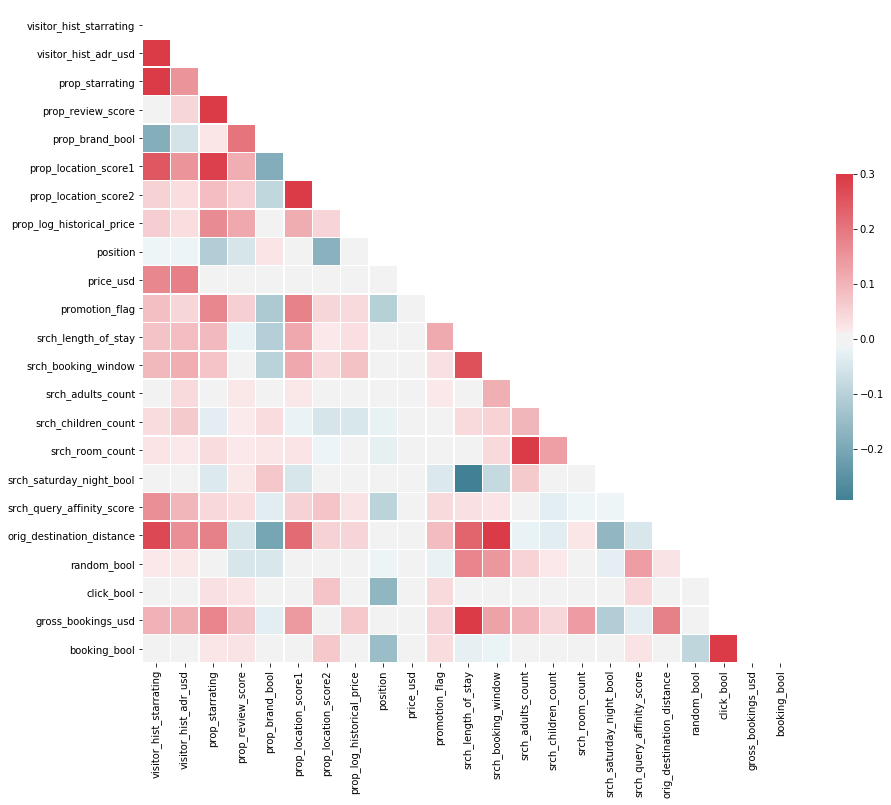

In [7]:
numerical_data_of_interest = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','click_bool','gross_bookings_usd','booking_bool']
# Compute the correlation matrix
#corr = train.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id'], axis=1).corr()
corr = train[numerical_data_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Booked instances only

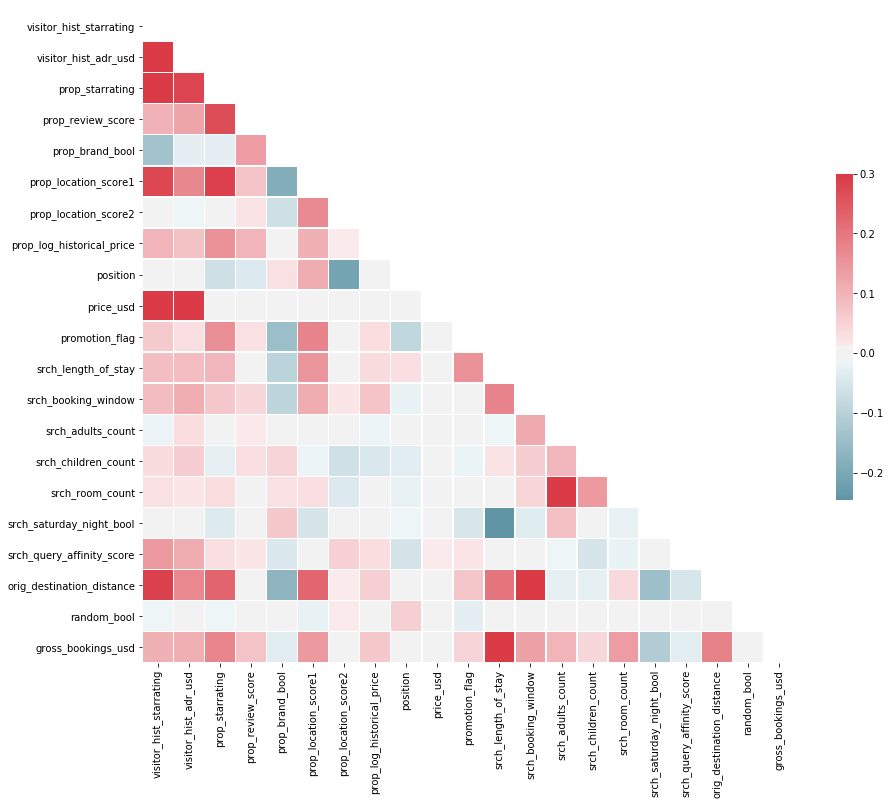

In [85]:
numerical_data_of_interest = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','gross_bookings_usd']
# Compute the correlation matrix
#corr = train.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id'], axis=1).corr()
corr = train[train.booking_bool==1][numerical_data_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Only instances without booking 

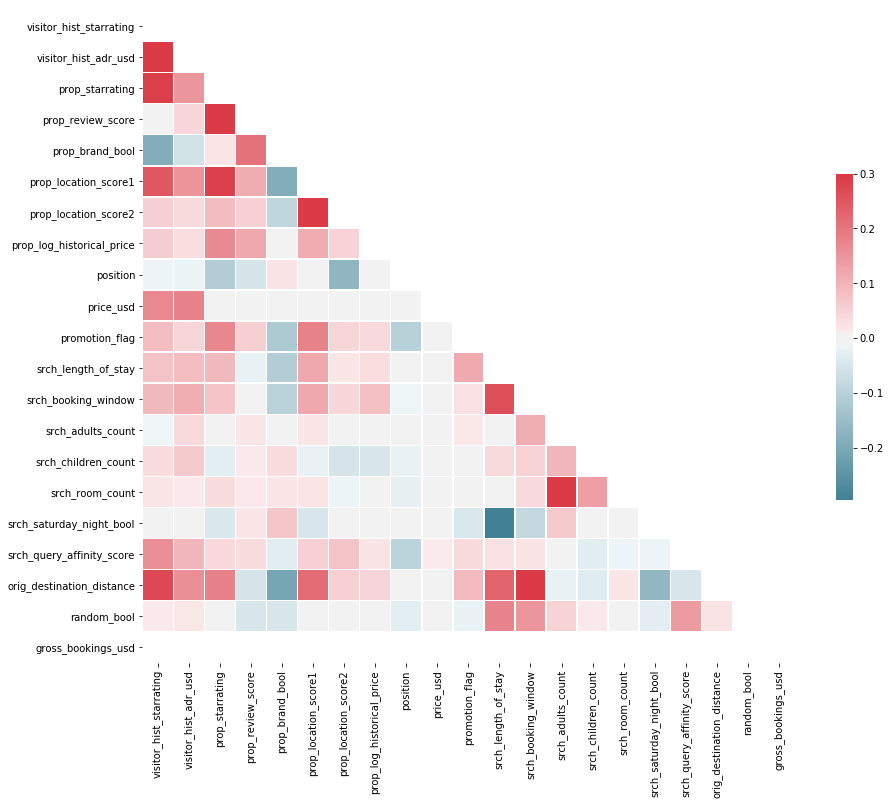

In [88]:
numerical_data_of_interest = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','gross_bookings_usd']
# Compute the correlation matrix
#corr = train.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id'], axis=1).corr()
corr = train[train.booking_bool==0][numerical_data_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Difference in correlations between booked and not booked 

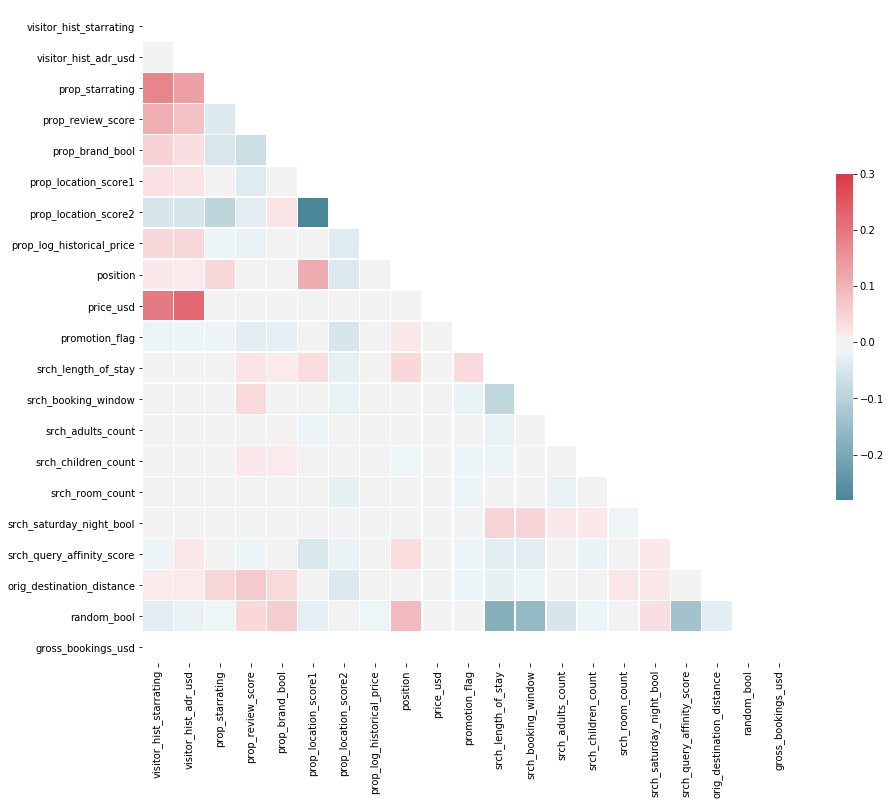

In [87]:
numerical_data_of_interest = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','gross_bookings_usd']
# Compute the correlation matrix
#corr = train.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id'], axis=1).corr()
corr1 = train[train.booking_bool==1][numerical_data_of_interest].corr()
corr2 = train[train.booking_bool==0][numerical_data_of_interest].corr()
corr = corr1-corr2

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [76]:
train[['promotion_flag','booking_bool']].groupby(['promotion_flag'], as_index=False).mean().sort_values(by='booking_bool',ascending=False)

,promotion_flag,booking_bool
1,1,0.039235
0,0,0.024797


In [77]:
train[['promotion_flag','click_bool']].groupby(['promotion_flag'], as_index=False).mean().sort_values(by='click_bool',ascending=False)

,promotion_flag,click_bool
1,1,0.060301
0,0,0.040473


In [5]:
train[['prop_brand_bool','booking_bool']].groupby(['prop_brand_bool'], as_index=False).mean().sort_values(by='booking_bool',ascending=False)

,prop_brand_bool,booking_bool
1,1,0.029159
0,0,0.025741


In [6]:
train[['prop_brand_bool','click_bool']].groupby(['prop_brand_bool'], as_index=False).mean().sort_values(by='click_bool',ascending=False)

,prop_brand_bool,click_bool
1,1,0.044884
0,0,0.044513


In [9]:
train[['booking_bool','click_bool','promotion_flag','prop_brand_bool']].corr()

,booking_bool,click_bool,promotion_flag,prop_brand_bool
booking_bool,1.000000,0.782889,0.036047,0.009991
click_bool,0.782889,1.000000,0.039440,0.000866
promotion_flag,0.036047,0.039440,1.000000,-0.118841
prop_brand_bool,0.009991,0.000866,-0.118841,1.000000


In [19]:
# what features might be used to model 'position'?
train[['position','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score2','promotion_flag','srch_query_affinity_score']].corr()

,position,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score2,promotion_flag,srch_query_affinity_score
position,1.000000,-0.107717,-0.053983,0.023419,-0.174955,-0.103621,-0.094887
prop_starrating,-0.107717,1.000000,0.306454,0.021329,0.086325,0.173732,0.041781
prop_review_score,-0.053983,0.306454,1.000000,0.203949,0.055063,0.057970,0.035633
prop_brand_bool,0.023419,0.021329,0.203949,1.000000,-0.085203,-0.118841,-0.034613
prop_location_score2,-0.174955,0.086325,0.055063,-0.085203,1.000000,0.045440,0.075046
promotion_flag,-0.103621,0.173732,0.057970,-0.118841,0.045440,1.000000,0.038488
srch_query_affinity_score,-0.094887,0.041781,0.035633,-0.034613,0.075046,0.038488,1.000000


In [84]:
train[train.booking_bool==1][['position','prop_location_score1']].corr()

,position,prop_location_score1
position,1.000000,0.114018
prop_location_score1,0.114018,1.000000


In [10]:
train[train.booking_bool==1][['position','prop_location_score2']].corr()

,position,prop_location_score2
position,1.000000,-0.209136
prop_location_score2,-0.209136,1.000000


In [6]:
train[['booking_bool','prop_id']].groupby(['prop_id'], as_index=False).mean().sort_values(by='booking_bool',ascending=False)

,prop_id,booking_bool
115035,125451,1.0
14783,16052,1.0
87447,95374,1.0
87440,95366,1.0
68591,74748,1.0
87362,95278,1.0
40191,43764,1.0
114802,125197,1.0
125888,137314,1.0
80521,87784,1.0


In [31]:
train[train['srch_destination_id']==3][['click_bool','prop_id']].groupby(['prop_id'], as_index=False).mean().sort_values(by='click_bool',ascending=False)

,prop_id,click_bool
0,1675,1
1,3080,0
2,23029,0
3,25247,0
4,39801,0
5,49779,0
6,67723,0
7,124081,0


In [7]:
train[['site_id','price_usd']].groupby(['site_id'], as_index=False).mean().sort_values(by='price_usd',ascending=False)

,site_id,price_usd
25,26,909.176225
14,15,420.221795
33,34,275.636706
4,5,269.044141
31,32,268.459679
11,12,263.577263
27,28,186.302246
22,23,185.730583
13,14,184.203234
3,4,179.449536


In [5]:
avg_price_per_site = train[['site_id','price_usd']][train.booking_bool==1].groupby(['site_id'], as_index=False).mean().sort_values(by='price_usd',ascending=False)

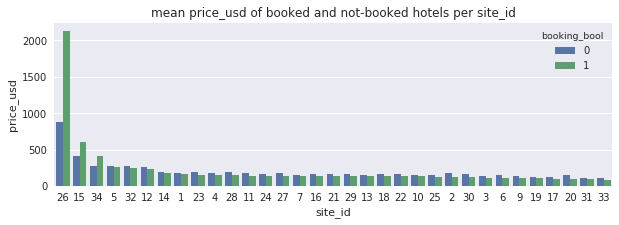

In [7]:
#avg_price_per_site.plot.bar(x='site_id',y='price_usd', figsize=(8,3), legend=None, grid='on')
sns.set()
#sns.set_style("whitegrid")
plt.figure(figsize=(10,3))
sns.barplot(x='site_id', y='price_usd', hue='booking_bool', order=avg_price_per_site.site_id, data=train[['site_id','price_usd','booking_bool']], ci=None)
plt.ylabel('price_usd')
plt.title('mean price_usd of booked and not-booked hotels per site_id')
plt.show()

In [13]:
avg_review_per_site = train[['site_id','prop_review_score']][train.booking_bool==1].groupby(['site_id'], as_index=False).mean().sort_values(by='prop_review_score',ascending=False)

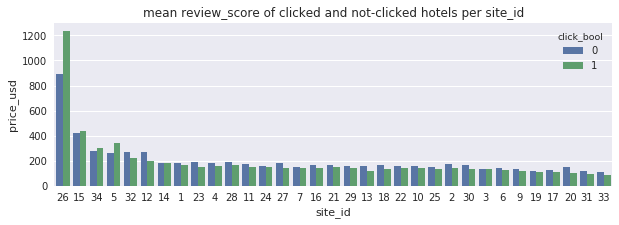

In [17]:
sns.set()
plt.figure(figsize=(10,3))
sns.barplot(x='site_id', y='price_usd', hue='click_bool', order=avg_price_per_site.site_id, data=train[['site_id','price_usd','click_bool','booking_bool']], ci=None)
plt.ylabel('price_usd')
plt.title('mean review_score of clicked and not-clicked hotels per site_id')
plt.show()

In [10]:
train['star_diff'] = np.abs(train.visitor_hist_starrating - train.prop_starrating)

/home/fiona/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


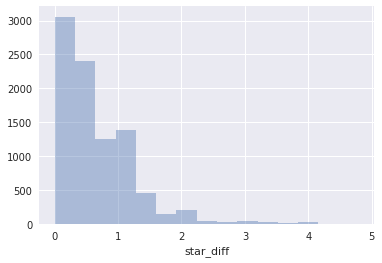

In [12]:
sns.set()
sns.distplot(train.star_diff[train.booking_bool == 1].dropna(), kde=False, bins=15)

In [13]:
train['price_diff'] = np.abs(train.visitor_hist_adr_usd - train.price_usd)

/home/fiona/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


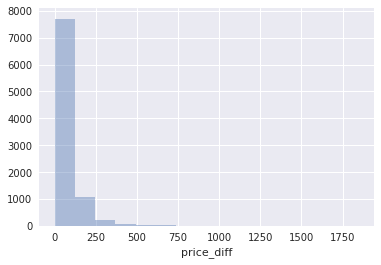

In [14]:
sns.set()
sns.distplot(train.price_diff[train.booking_bool == 1].dropna(), kde=False, bins=15)

In [92]:
train[['prop_starrating','booking_bool']].groupby(['prop_starrating'], as_index=False).mean().sort_values(by='prop_starrating',ascending=False)

,prop_starrating,booking_bool
5,5,0.025915
4,4,0.033223
3,3,0.028090
2,2,0.021844
1,1,0.013314
0,0,0.016506


In [68]:
train.visitor_location_country_id.value_counts()

219    2892489
100     495476
55      290461
216     217385
220     174296
129     123681
31       92636
99       67762
59       62066
92       45213
158      44505
103      35286
132      32740
117      25973
50       19623
39       18430
215      16361
181      12549
98       12024
13       11935
32       11836
15       11501
205      10736
81        9934
4         9428
33        9109
56        9070
23        8632
14        8239
73        8031
        ...   
122         56
27          56
168         55
116         55
46          55
188         55
87          52
139         48
193         47
121         46
183         39
174         33
210         33
166         33
228         33
67          32
94          32
217         31
64          31
3           31
54          31
58          30
198         30
101         28
66          27
226         25
190         24
146         15
83          13
150          8
Name: visitor_location_country_id, Length: 210, dtype: int64

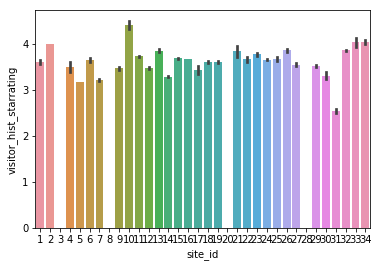

In [7]:
sns.barplot(x='site_id', y='visitor_hist_starrating', data=train[['site_id','visitor_hist_starrating','booking_bool']])

In [1]:
groups = train.groupby(['srch_destination_id','prop_id'])

NameError: name 'train' is not defined

In [14]:
groups.size().min()

5

In [15]:
groups.size()

srch_room_count  site_id
1                1             9350
                 2             5042
                 3             3045
                 4            11814
                 5          2834569
                 6             2108
                 7            29327
                 8               31
                 9            37279
                 10            8754
                 11           31301
                 12           66451
                 13            6610
                 14          442275
                 15          279652
                 16           79619
                 17            5121
                 18          113146
                 19           37197
                 20             157
                 21            3347
                 22           35786
                 23           10446
                 24          213366
                 25           10995
                 26           13714
                 27            4316
   

groups.apply(lambda x: x.visitor_hist_starrating.mean())

In [20]:
def normalize_feature(df, feature_name, normalize_wrt_feature):
    groups = df.groupby(normalize_wrt_feature)
    avg_feature_vals = groups.apply(lambda x: x[feature_name].mean())
    new_col = []
    for row in train.itertuples():
        new_col.append(getattr(row, feature_name) / avg_feature_vals[getattr(row, normalize_wrt_feature)])
    df[feature_name + '_norm_' + normalize_wrt_feature] = new_col

In [12]:
srch_id_groups = train.groupby('srch_id')
#for f in numerical_features:
avg_prop_starrating_per_srch_id = srch_id_groups.apply(lambda x: x.prop_starrating.mean())

In [ ]:
avg_prop_starrating_per_srch_id
new_col = []
for row in train.itertuples():
    new_col.append(row.prop_starrating / avg_prop_starrating_per_srch_id[row.srch_id]) # getattr(row, 'srch_id')

In [ ]:
train['prop_starrating_norm_srch_id'] = new_col
train.prop_starrating_norm_srch_id

In [1]:
sns.set()
sns.distplot(train.prop_starrating_norm_srch_id.dropna().apply(lambda x: x if x <=5 else 5))

NameError: name 'sns' is not defined

/home/fiona/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


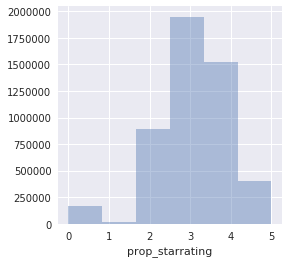

In [10]:
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(train.prop_starrating.dropna(), bins=6, kde=False)

In [11]:
#sns.set()
sns.set_style("whitegrid")
sns.distplot(train.prop_starrating_norm_srch_id[train.booking_bool==1].dropna().apply(lambda x: x if x <=5 else 5), label='booked')
sns.distplot(train.prop_starrating_norm_srch_id[train.booking_bool==0].dropna().apply(lambda x: x if x <=5 else 5), label='not booked')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'prop_starrating_norm_srch_id'

In [ ]:
normalize_feature(train, 'prop_starrating', 'srch_destination_id')